In [1]:
# -*- coding: utf-8 -*-

# Feature Optimization with TON_IoT dataset

#### Purpose : Select relevant features aligned with the inherent characteristics of IoT devices to detect attack instances

_Binary classification, variables_

In [1]:
import random
import numpy as Numpy
import pandas as Pandas
import matplotlib.pyplot as PyPlot
import seaborn as Seaborn

random.seed(42)
Numpy.random.seed(42)
%matplotlib inline
Seaborn.set()
PyPlot.style.use('seaborn-whitegrid')

In [2]:
tonIoT = Pandas.read_csv('./Presets/Train_Test_datasets/Train_Test_Network/Train_Test_Network.csv')

In [3]:
trainDataset = Pandas.read_parquet('./Presets/GNN/train_dataset_gnn_20.parquet')
testDataset = Pandas.read_parquet('./Presets/GNN/test_dataset_gnn_20.parquet')

### 1. Understand the data

_Description_

In [5]:
featuresDescription = Pandas.read_csv('./Presets/NUSW-NB15_features.csv', encoding='ISO-8859-1')
Pandas.set_option('display.max_colwidth', 200)
display(featuresDescription)

No.              Name      Type   \
0     1             srcip    nominal   
1     2             sport    integer   
2     3             dstip    nominal   
3     4            dsport    integer   
4     5             proto    nominal   
5     6             state    nominal   
6     7               dur      Float   
7     8            sbytes    Integer   
8     9            dbytes    Integer   
9    10              sttl    Integer   
10   11              dttl    Integer   
11   12             sloss    Integer   
12   13             dloss    Integer   
13   14           service    nominal   
14   15             Sload      Float   
15   16             Dload      Float   
16   17             Spkts    integer   
17   18             Dpkts    integer   
18   19              swin    integer   
19   20              dwin    integer   
20   21             stcpb    integer   
21   22             dtcpb    integer   
22   23           smeansz    integer   
23   24           dmeansz    integer   
24   25       trans_depth    integer   
25   26       res_bdy_len    integer   
26   27              Sjit      Float   
27   28              Djit      Float   
28   29             Stime  Timestamp   
29   30             Ltime  Timestamp   
30   31           Sintpkt      Float   
31   32           Dintpkt      Float   
32   33            tcprtt      Float   
33   34            synack      Float   
34   35            ackdat      Float   
35   36   is_sm_ips_ports     Binary   
36   37      ct_state_ttl    Integer   
37   38  ct_flw_http_mthd    Integer   
38   39      is_ftp_login     Binary   
39   40        ct_ftp_cmd    integer   
40   41        ct_srv_src    integer   
41   42        ct_srv_dst    integer   
42   43        ct_dst_ltm    integer   
43   44       ct_src_ ltm    integer   
44   45  ct_src_dport_ltm    integer   
45   46  ct_dst_sport_ltm    integer   
46   47    ct_dst_src_ltm    integer   
47   48        attack_cat    nominal   
48   49             Label     binary   

                                                                                                                                                           Description  
0                                                                                                                                                    Source IP address  
1                                                                                                                                                   Source port number  
2                                                                                                                                               Destination IP address  
3                                                                                                                                              Destination port number  
4                                                                                                                                                 Transaction protocol  
5       Indicates to the state and its dependent protocol, e.g. ACC, CLO, CON, ECO, ECR, FIN, INT, MAS, PAR, REQ, RST, TST, TXD, URH, URN, and (-) (if not used state)  
6                                                                                                                                                Record total duration  
7                                                                                                                             Source to destination transaction bytes   
8                                                                                                                              Destination to source transaction bytes  
9                                                                                                                            Source to destination time to live value   
10                                                                                                                            Destination to sou

_Dataset_

In [6]:
tonIoT.head()

ts         src_ip  src_port         dst_ip  dst_port proto service  \
0  1554198358    3.122.49.24      1883  192.168.1.152     52976   tcp       -   
1  1554198358   192.168.1.79     47260  192.168.1.255     15600   udp       -   
2  1554198359  192.168.1.152      1880  192.168.1.152     51782   tcp       -   
3  1554198359  192.168.1.152     34296  192.168.1.152     10502   tcp       -   
4  1554198362  192.168.1.152     46608  192.168.1.190        53   udp     dns   

       duration  src_bytes  dst_bytes  ... http_response_body_len  \
0  80549.530260    1762852   41933215  ...                      0   
1      0.000000          0          0  ...                      0   
2      0.000000          0          0  ...                      0   
3      0.000000          0          0  ...                      0   
4      0.000549          0        298  ...                      0   

   http_status_code  http_user_agent  http_orig_mime_types  \
0                 0                -                     -   
1                 0                -                     -   
2                 0                -                     -   
3                 0                -                     -   
4                 0                -                     -   

   http_resp_mime_types        weird_name weird_addl  weird_notice  label  \
0                     -  bad_TCP_checksum          -             F      0   
1                     -                 -          -             -      0   
2                     -  bad_TCP_checksum          -             F      0   
3                     -                 -          -             -      0   
4                     -  bad_UDP_checksum          -             F      0   

     type  
0  normal  
1  normal  
2  normal  
3  normal  
4  normal  

[5 rows x 45 columns]

In [29]:
tonIoT.shape

(461043, 45)

In [7]:
trainDataset.head()

col_1     col_2     col_3     col_4     col_5     col_6     col_7  \
0  2.580445  3.741327  2.502391 -0.110889 -2.440501  1.838297  3.363182   
1  2.666048  3.856805  2.596441 -0.138221 -2.434661  1.927418  3.360787   
2  2.571125  3.688373  2.396434 -0.141494 -2.450897  1.833206  3.313041   
3  2.555672  3.526245  2.502546 -0.162838 -2.417103  1.830886  3.332315   
4  2.683452  3.747609  2.462708 -0.185051 -2.332582  1.853686  3.285338   

      col_8     col_9    col_10  ...     col_33    col_34    col_35    col_36  \
0  2.892230  0.996090  2.461950  ...  22.122162 -6.862062  3.748323  3.722735   
1  2.827708  0.937935  2.482158  ...  14.064364 -3.939075  1.656156  2.261821   
2  2.758566  1.025946  2.365392  ...  24.386221 -7.017444  4.435885  3.801099   
3  2.855706  1.031671  2.445279  ...  25.888872 -6.906883  2.843761  4.705781   
4  2.879538  1.065759  2.515851  ...   5.916648 -1.178859  1.493276  0.275784   

     col_37    col_38     col_39    col_40  attack_cat  label  
0 -1.657124 -0.609208  22.122993 -0.171945        None      0  
1 -0.059050 -0.335271  14.479704  0.530095        None      0  
2 -2.660067 -1.197403  21.366985 -1.236316        None      0  
3 -0.971977 -2.026062  25.574623 -0.598081        None      0  
4 -0.342646 -0.384286   5.899018  0.567382        None      0  

[5 rows x 42 columns]

In [8]:
display(tonIoT.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461043 entries, 0 to 461042
Data columns (total 45 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ts                      461043 non-null  int64  
 1   src_ip                  461043 non-null  object 
 2   src_port                461043 non-null  int64  
 3   dst_ip                  461043 non-null  object 
 4   dst_port                461043 non-null  int64  
 5   proto                   461043 non-null  object 
 6   service                 461043 non-null  object 
 7   duration                461043 non-null  float64
 8   src_bytes               461043 non-null  int64  
 9   dst_bytes               461043 non-null  int64  
 10  conn_state              461043 non-null  object 
 11  missed_bytes            461043 non-null  int64  
 12  src_pkts                461043 non-null  int64  
 13  src_ip_bytes            461043 non-null  int64  
 14  dst_pkts            

None

In [31]:
trainDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343000 entries, 0 to 342999
Data columns (total 42 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   col_1       343000 non-null  float32
 1   col_2       343000 non-null  float32
 2   col_3       343000 non-null  float32
 3   col_4       343000 non-null  float32
 4   col_5       343000 non-null  float32
 5   col_6       343000 non-null  float32
 6   col_7       343000 non-null  float32
 7   col_8       343000 non-null  float32
 8   col_9       343000 non-null  float32
 9   col_10      343000 non-null  float32
 10  col_11      343000 non-null  float32
 11  col_12      343000 non-null  float32
 12  col_13      343000 non-null  float32
 13  col_14      343000 non-null  float32
 14  col_15      343000 non-null  float32
 15  col_16      343000 non-null  float32
 16  col_17      343000 non-null  float32
 17  col_18      343000 non-null  float32
 18  col_19      343000 non-null  float32
 19  co

_Class balancing_

In [5]:
attackBalance = trainDataset['label'].value_counts(normalize=True)
attackBalance2 = trainDataset['label'].value_counts()
imbalanceDataFrame = Pandas.DataFrame(attackBalance)
imbalanceDataFrame2 = Pandas.DataFrame(attackBalance2)
display(imbalanceDataFrame)
display(imbalanceDataFrame2)

label
0  0.968466
1  0.031534

label
0  332184
1   10816

In [10]:
imbalanceDataFrame.shape

(2, 1)

<AxesSubplot:>

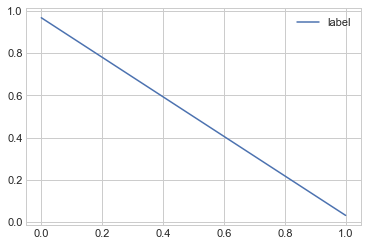

In [11]:
imbalanceDataFrame.plot()

In [48]:
tonIoT.shape

(461043, 45)

In [49]:
trainDataset.shape

(343000, 42)

In [12]:
colors = Seaborn.color_palette('pastel')[0:2]

imbalanceDataFrame.plot.pie(y='label', figsize=(8, 9), autopct='%1.1f%%', colors=colors)

PyPlot.legend(labels=imbalanceDataFrame.index, loc='upper right')
PyPlot.ylabel('Occurence')
PyPlot.xlabel('Inputs')
PyPlot.title('Binary Classification of attacks')
PyPlot.xticks(rotation=90)
PyPlot.show()

In [13]:
attackBalance = testDataset['label'].value_counts(normalize=True)
imbalanceDataFrame = Pandas.DataFrame(attackBalance)
display(imbalanceDataFrame)

label
0  0.968354
1  0.031646

In [14]:
imbalanceDataFrame.shape

(2, 1)

<AxesSubplot:>

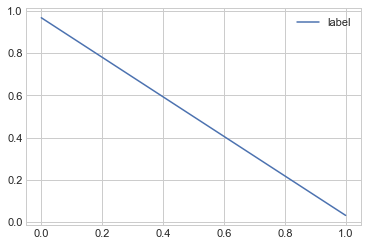

In [15]:
imbalanceDataFrame.plot()

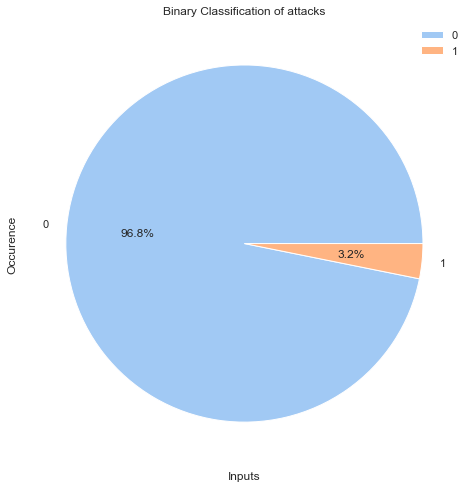

In [16]:
colors = Seaborn.color_palette('pastel')[0:2]

imbalanceDataFrame.plot.pie(y='label', figsize=(8, 9), autopct='%1.1f%%', colors=colors)

PyPlot.legend(labels=imbalanceDataFrame.index, loc='upper right')
PyPlot.ylabel('Occurence')
PyPlot.xlabel('Inputs')
PyPlot.title('Binary Classification of attacks')
PyPlot.xticks(rotation=90)
PyPlot.show()

In [17]:
figure, axes = PyPlot.subplots(figsize=(20, 15))

Seaborn.heatmap(trainDataset.corr(), vmax=1, vmin=-1, center=0, annot=True)
PyPlot.show()

In [ ]:
# Seaborn.pairplot(trainDataset, kind="reg", diag_kind="kde")

### 2. Feature selection

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as TrainTestSplit, cross_validate as CV, StratifiedKFold as SKF
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn import tree

from sklearn.metrics import accuracy_score as AccScore, f1_score as F1, roc_auc_score as ROC, roc_curve as ROCurve, auc as AUC, recall_score as Recall, confusion_matrix as ConfMatrix

from sklearn.linear_model import LassoCV
from scipy.stats import pearsonr as PearsonR
from sklearn.feature_selection import SelectKBest, chi2 as Chi2, f_classif as ANOVA, mutual_info_classif as IG, RFE, SelectFromModel as SFM
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from genetic_selection import GeneticSelectionCV

from memory_profiler import profile, memory_usage

In [5]:
X_train, y_train = trainDataset.drop(['label', 'attack_cat'], axis=1), trainDataset['label']
X_test, y_test = testDataset.drop(['label', 'attack_cat'], axis=1), testDataset['label']

In [6]:
X_train_curr, y_train_curr = X_train, y_train

In [7]:
X = Pandas.concat([X_train, X_test], axis=0)
X = X.reset_index(drop=True)

y = Pandas.concat([y_train, y_test], axis=0)
y = y.reset_index(drop=True)

In [8]:
shape = X_train.shape

_Helpers_

In [9]:
def evaluate_performance(y_test, y_predicted):
	f1 = F1(y_test, y_predicted)
	accuracy = AccScore(y_test, y_predicted)
	roc_auc = ROC(y_test, y_predicted)

	return Pandas.DataFrame({'Metric': ['Accuracy', 'F1-score', 'ROC_AUC'], 'Score': [accuracy, f1, roc_auc]})


def plot_roc_curve(title, y_test, y_predict1, y_predict2 = None):
	fpr1, tpr1, thresholds1 = ROCurve(y_test, y_predict1)
	roc_auc1 = AUC(fpr1, tpr1)

	if y_predict2 is not None:
		PyPlot.subplots(1, 2, figsize=(10, 5))
		PyPlot.subplot(1, 2, 1)

	# PyPlot.figure()
	PyPlot.plot(fpr1, tpr1, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc1)
	PyPlot.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
	PyPlot.xlim([0.0, 1.0])
	PyPlot.ylim([0.0, 1.05])
	PyPlot.xlabel('False Positive Rate')
	PyPlot.ylabel('True Positive Rate')
	PyPlot.title(f'ROC curve {title} 1')
	PyPlot.legend(loc='lower right')

	if y_predict2 is not None:
		fpr2, tpr2, thresholds2 = ROCurve(y_test, y_predict2)
		roc_auc2 = AUC(fpr2, tpr2)

		PyPlot.subplot(1, 2, 2)
		# PyPlot.figure()
		PyPlot.plot(fpr2, tpr2, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc2)
		PyPlot.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
		PyPlot.xlim([0.0, 1.0])
		PyPlot.ylim([0.0, 1.05])
		PyPlot.xlabel('False Positive Rate')
		PyPlot.ylabel('True Positive Rate')
		PyPlot.title(f'ROC curve {title} 2')
		PyPlot.legend(loc='lower right')

		PyPlot.suptitle(f'ROC curves {title}')
	PyPlot.show()


def plot_cv(title: str, scores: list, k: list = None):
	k_title, index = title, 0
	for score in scores:
		score_df = Pandas.DataFrame(score)
		score_df['fold'] = score_df.index

		score_df_melt = Pandas.melt(score_df, id_vars=['fold'], value_vars=['train_accuracy', 'test_accuracy', 'train_f1', 'test_f1', 'train_roc_auc', 'test_roc_auc'], var_name='metric', value_name='score')

		g = Seaborn.catplot(x='metric', y='score', hue='fold', data=score_df_melt, kind='bar', sharey=False)
		
		g.set_xticklabels(rotation=90)
		if k is not None:
			k_title = f'{title} k={k[index]}'
			index += 1

		PyPlot.title(f'{k_title} CV Training and Testing Scores')
		PyPlot.show()


def display_selected_features(features_mask, get=False):
	selected_features = X.columns[features_mask]
	print('Selected Features:', selected_features.tolist())

	if get:
		return selected_features.tolist()
	

def plot_feature_importances(title: str, coefficients, index, xlabel: str='Feature Importances'):
	coefs = Pandas.DataFrame(
		coefficients,
		columns=['Importances'],
		index=index
	)

	coefs.plot.barh(figsize=(9, 7))
	PyPlot.title(title)
	PyPlot.axvline(x=0, color=".5")
	PyPlot.xlabel(xlabel)
	PyPlot.subplots_adjust(left=0.3)


@profile
def train_model():
	rf = RF(random_state=42, n_jobs=-1, max_depth=20)
	
	rf.fit(X_train_curr, y_train_curr)

	return rf


def profile_model():
	%load_ext memory_profiler
	%mprun -f train_model train_model()


def fitness1(detection_rate, far, selected_feature_proportion):
	return (detection_rate * Wd) + ((1 - far) * Wf) + ((1 - selected_feature_proportion) * Wn)


def fitness2():
	pass


def get_objective(var_name: str = 'y_pred', start: int = 1, end: int = 7):
	objectives = []
	fprAll = []
	f1All = []

	for i in range(start, end):
		name = f'{var_name}{i}'
		value = globals()[name]

		CM = ConfMatrix(y_test, value)
		tn, fp, fn, tp = CM.ravel()
		fpr = fp / (fp + tn)
		fprAll.append(fpr)

		f1 = F1(y_test, value)
		f1All.append(f1)
		k = globals()[f'k{i}']
		
		objectives.append(fitness1(f1, fpr, k/shape[1]))

	print('Objectives')
	display(objectives)
	print('\nF1')
	display(f1All)
	print('\nFPR')
	display(fprAll)


def get_cv_performance(X, y, numpy=False):
	strat_cross_validation = SKF(n_splits=3, shuffle=True, random_state=0)
	fpr_list = []
	f1_list = []
	roc_list = []
	rfc = RF(random_state=42, n_jobs=-1, max_depth=20)
	
	for i, (train_index, test_index) in enumerate(strat_cross_validation.split(X, y)):
		if not numpy:
			X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
			y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
		else:
			X_train_fold, X_test_fold = X[train_index], X[test_index]
			y_train_fold, y_test_fold = y[train_index], y[test_index]
		
		rfc.fit(X_train_fold, y_train_fold)
		y_pred_fold = rfc.predict(X_test_fold)
		
		# Calculate the False Positive Rate (FPR) and True Positive Rate (TPR) for ROC curve
		CM = ConfMatrix(y_test_fold, y_pred_fold)
		tn, fp, fn, tp = CM.ravel()
		fpr = fp / (fp + tn)
		fpr_list.append(fpr)

		roc_auc = ROC(y_test_fold, y_pred_fold)
		roc_list.append(roc_auc)

		# F1
		f1 = F1(y_test_fold, y_pred_fold)
		f1_list.append(f1)

	# Calculate the average FPR
	average_fpr = Numpy.mean(fpr_list)
	average_f1 = Numpy.mean(f1_list)
	average_roc = Numpy.mean(roc_list)

	display({"Average FPR:" "{:.3f}".format(average_fpr), "Average F1:" "{:.3f}".format(average_f1), "Average ROC:" "{:.3f}".format(average_roc)})
	# print("Average FPR: {:.3f}".format(average_fpr))
	
	return [average_f1, average_fpr, average_roc]


def plot_mean_scores(
	title, meanScores, x_axis, 
	metrics = ['F1-Score', 'FPR', 'ROC'],
	bar_width = 1.0
):
	# Create a list of colors for the bars
	colors = ['tab:blue', 'tab:orange', 'tab:green']

	# Create the bar plot
	fig, ax = PyPlot.subplots(figsize=(10, 6))
	for i, mean_scores in enumerate(meanScores):
		x = [k - bar_width for k in x_axis]
		for j, score in enumerate(mean_scores):
			ax.bar(x, score, bar_width, color=colors[j])
			x = [k + bar_width for k in x]
			
	# Add labels, title, and legend
	ax.set_xlabel('k')
	ax.set_ylabel('Mean Scores')
	ax.set_title(f'{title} Performance Comparison for different k values')
	ax.set_xticks(x_axis)
	ax.set_xticklabels(x_axis)
	ax.legend(metrics)

	# Show the plot
	PyPlot.tight_layout()
	PyPlot.show()


def plot_mean_scores2(
	title: str, df, x_axis, k_title = 'k',
	metrics = ['F1-Score', 'FPR', 'ROC'], bar_width = 1.0
):
	# Set the colors for the bars
	colors = ['tab:blue', 'tab:orange', 'tab:green']

	# Create the bar plot
	fig, ax = PyPlot.subplots(figsize=(10, 6))

	for i, metric in enumerate(metrics):
		ax.bar(df[f'{k_title}'] + (i - 1) * bar_width, df[metric], bar_width, color=colors[i], label=metric)

	# Add labels, title, and legend
	ax.set_xlabel(f'{k_title}')
	ax.set_ylabel('Mean Scores')
	ax.set_title(f'{title} Performance Comparison for different {k_title} values')
	ax.set_xticks(x_axis)
	ax.set_xticklabels(x_axis)
	ax.legend()

	# Show the plot
	PyPlot.tight_layout()
	PyPlot.show()


k1, k2, k3, k4, k5, k6 = 35, 30, 25, 20, 15, 10
Wd, Wf, Wn = 0.75, 0.2, 0.05
# k1, k2 = 20, 15
cv = 3
cv_scoring = ['accuracy', 'f1', 'roc_auc']
objectives = []

_With ALL_

In [10]:
rfAll = RF(random_state=42, n_jobs=-1, max_depth=20)

rfAll.fit(X_train, y_train)
# rfAll = train_model()
# y_pred_all = rfAll.predict(X_test)

RandomForestClassifier(max_depth=20, n_jobs=-1, random_state=42)

In [11]:
CM = ConfMatrix(y_test, y_pred_all)
tn, fp, fn, tp = CM.ravel()
fprAll = fp / (fp + tn)

In [12]:
objectiveAll = fitness1(F1(y_test, y_pred_all), fprAll, 1)
objectives.append(objectiveAll)
display(objectives)

[0.7024631193543428]

In [14]:
rfAll = RF(random_state=42, n_jobs=-1, max_depth=20)
scores_all = CV(rfAll, X=X, y=y, cv=cv, scoring=cv_scoring, return_train_score=True, n_jobs=-1)

In [37]:
meanAllScores = get_cv_performance(X, y)

{'Average F1:0.759', 'Average FPR:0.006', 'Average ROC:0.855'}

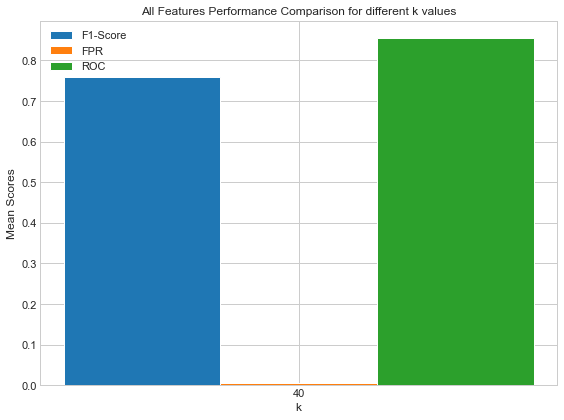

In [55]:
meanScoresPca = [
    [0.759, 0.006, 0.855]
]
x_axis = [40]

# plot_mean_scores('PCA', meanScores=meanScoresPca, x_axis=x_axis)

# Create a DataFrame with the given structure
data = {
    'k': x_axis,
    'F1-Score': [0.759],
    'FPR': [0.006],
    'ROC': [0.855]
}
df = Pandas.DataFrame(data)

plot_mean_scores2('All Features', df=df, x_axis=x_axis)

In [38]:
# FITNESS 1
fitness1All = fitness1(meanAllScores[0], meanAllScores[1], 1)
display(fitness1All)

0.7684709901396716

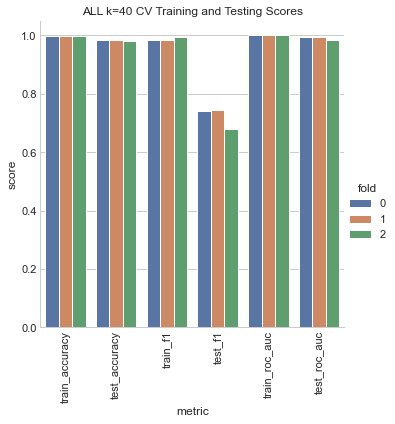

In [13]:
plot_cv('ALL', [scores_all], [40])

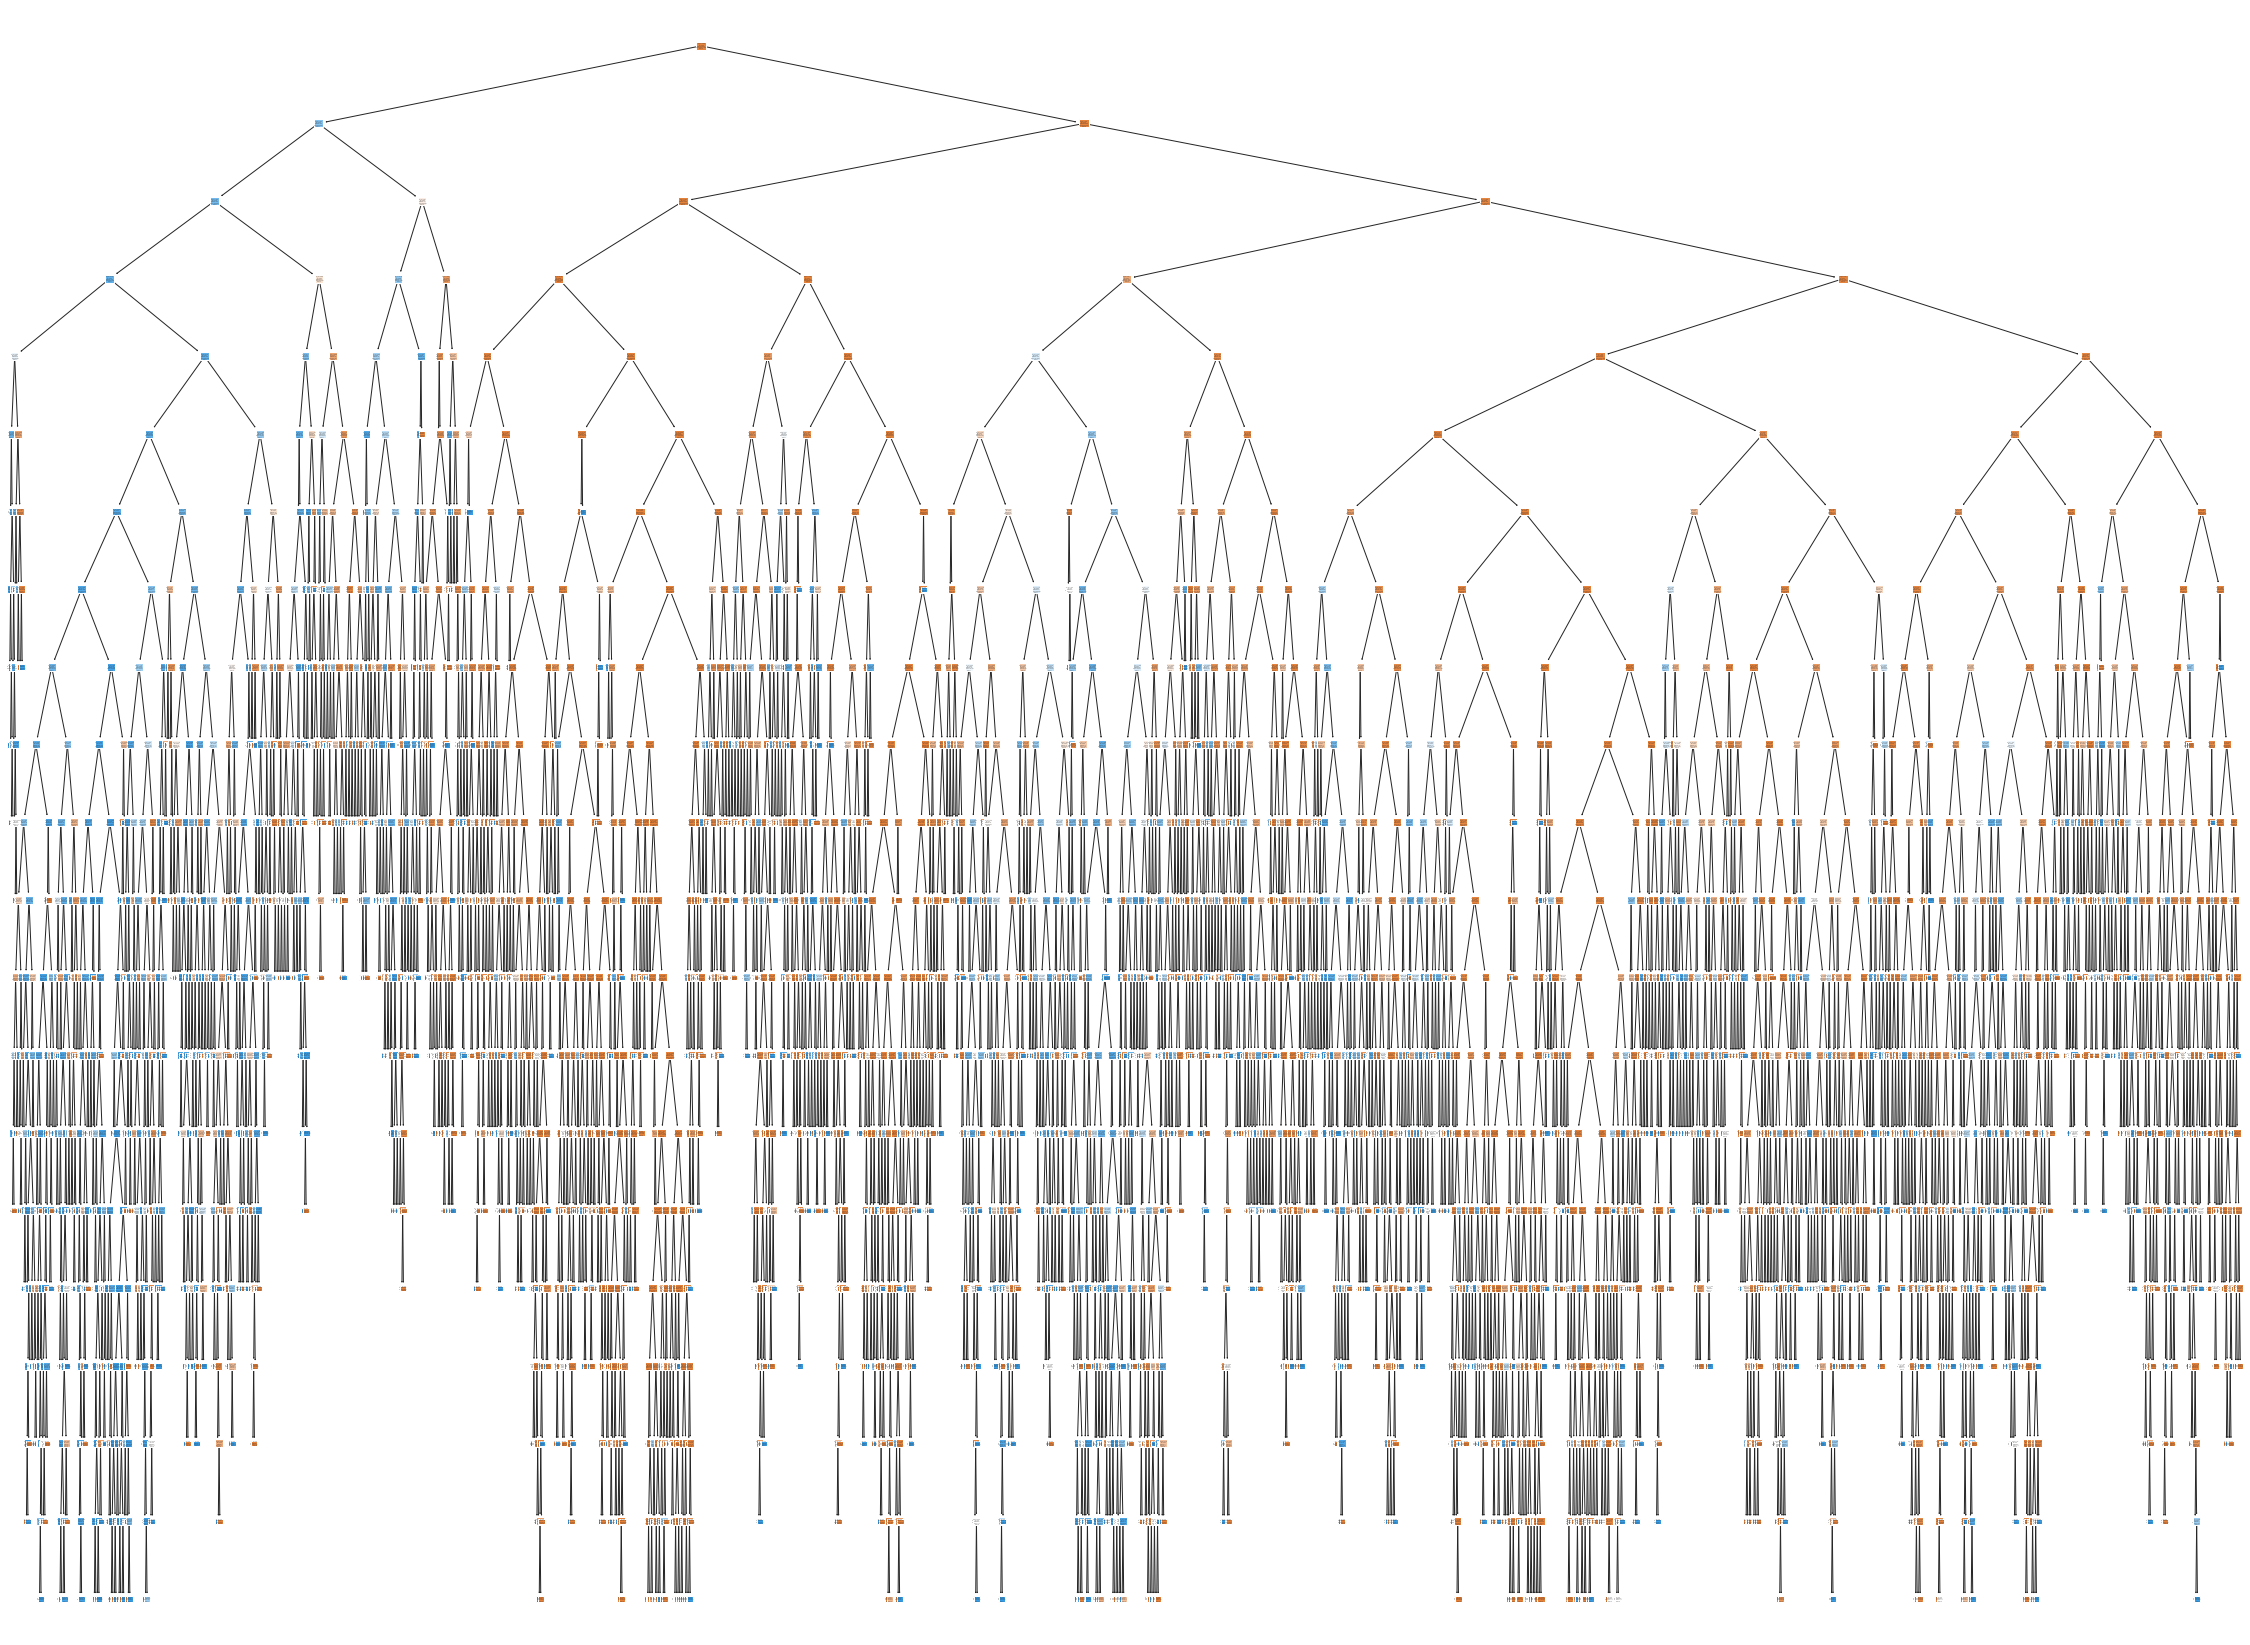

In [34]:
# Visualize a single tree from the forest
tree_idx = 0  # Index of the tree to visualize
fig = PyPlot.figure(figsize=(40, 30))
tree.plot_tree(rfAll.estimators_[tree_idx], feature_names=X_train.columns.tolist(), class_names=['0', '1'], filled=True)

fig.savefig('40_feat_tree_image.png', dpi=600)  # Specify the desired resolution (dpi) for a clearer image

# PyPlot.show()

Metric     Score
0  Accuracy  0.981170
1  F1-score  0.671727
2   ROC_AUC  0.801055

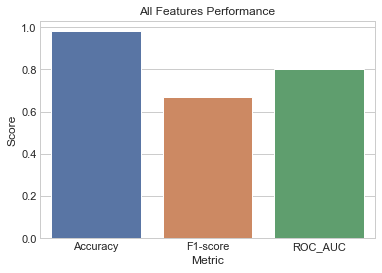

In [20]:
metrics_all = [evaluate_performance(y_test, y_pred_all), ]

for metric in metrics_all:
    display(metric)
    Seaborn.barplot(data=metric, x='Metric', y='Score')
    PyPlot.title('All Features Performance')
    PyPlot.show()

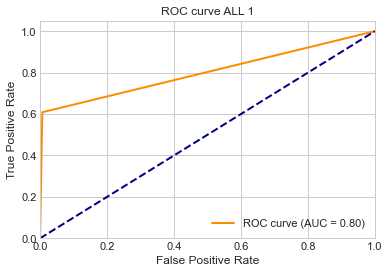

In [21]:
plot_roc_curve(title='ALL', y_test=y_test, y_predict1=y_pred_all)

_Plotting feature importances_

In [22]:
coefsAll = Pandas.DataFrame(
    rfAll.feature_importances_,
    columns=['Importances'],
    index=rfAll.feature_names_in_
)

In [23]:
coefsAll.plot.barh(figsize=(9, 7))
PyPlot.title('Without Feature Selection')
PyPlot.axvline(x=0, color=".5")
PyPlot.xlabel('Random Forest Feature Importances')
PyPlot.subplots_adjust(left=0.3)

In [30]:
profile_model()

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
ERROR: Could not find file C:\Users\IA\AppData\Local\Temp\ipykernel_20536\1508910316.py



Filename: d:\ProgramFiles\Python\Conda\lib\site-packages\memory_profiler.py

Line #    Mem usage    Increment  Occurences   Line Contents
  1140    749.1 MiB    749.1 MiB           1               def wrapper(*args, **kwargs):
  1141    749.1 MiB      0.0 MiB           1                   prof = get_prof()
  1142    788.8 MiB     39.7 MiB           1                   val = prof(func)(*args, **kwargs)
  1143    788.8 MiB      0.0 MiB           1                   show_results_bound(prof)
  1144    788.8 MiB      0.0 MiB           1                   return val

In [9]:
resultAll = memory_usage((train_model, (), {}))

ERROR: Could not find file C:\Users\IA\AppData\Local\Temp\ipykernel_11960\2684231453.py


In [16]:
result_specs_all = resultAll[len(resultAll) - 1] - resultAll[0]
display(result_specs_all)

40.44140625

#### _Pearson's r_

#### _ANOVA_

In [10]:
anovaFilter1 = SelectKBest(ANOVA, k=k1)
anovaFilter2 = SelectKBest(ANOVA, k=k2)
anovaFilter3 = SelectKBest(ANOVA, k=k3)
anovaFilter4 = SelectKBest(ANOVA, k=k4)
anovaFilter5 = SelectKBest(ANOVA, k=k5)
anovaFilter6 = SelectKBest(ANOVA, k=k6)

X_train_anova1 = anovaFilter1.fit_transform(X_train, y_train)
X_test_anova1 = anovaFilter1.transform(X_test)
X_train_anova2 = anovaFilter2.fit_transform(X_train, y_train)
X_test_anova2 = anovaFilter2.transform(X_test)

X_train_anova3 = anovaFilter3.fit_transform(X_train, y_train)
X_test_anova3 = anovaFilter3.transform(X_test)
X_train_anova4 = anovaFilter4.fit_transform(X_train, y_train)
X_test_anova4 = anovaFilter4.transform(X_test)

X_train_anova5 = anovaFilter5.fit_transform(X_train, y_train)
X_test_anova5 = anovaFilter5.transform(X_test)
X_train_anova6 = anovaFilter6.fit_transform(X_train, y_train)
X_test_anova6 = anovaFilter6.transform(X_test)

In [18]:
selected_anova = display_selected_features(anovaFilter2.get_support(), True)

Selected Features: ['col_6', 'col_7', 'col_9', 'col_10', 'col_12', 'col_13', 'col_14', 'col_15', 'col_16', 'col_17', 'col_20', 'col_22', 'col_23', 'col_24', 'col_25', 'col_26', 'col_27', 'col_28', 'col_29', 'col_30', 'col_31', 'col_32', 'col_33', 'col_34', 'col_35', 'col_36', 'col_37', 'col_38', 'col_39', 'col_40']


In [33]:
scaler = MinMaxScaler()
anovaImportances = scaler.fit_transform(anovaFilter2.scores_.reshape(-1,1)).flatten()

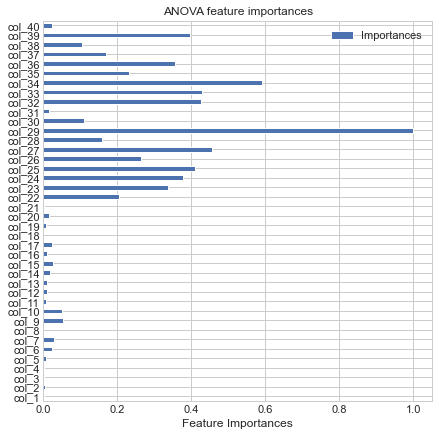

In [34]:
plot_feature_importances(title='ANOVA feature importances', coefficients=anovaImportances, index=X_train.columns)

plot_feature_importances(title='ANOVA selected feature importances', coefficients=anovaImportances[anovaFilter2.get_support(indices=True)], index=selected_anova)

_RF_

In [ ]:
random_forest = RF(
    n_estimators=100,
    random_state=42,
    n_jobs=-1,
    max_depth=20
)

In [14]:
rfAnova1 = RF(random_state=42, n_jobs=-1, max_depth=20)

rfAnova1.fit(X_train_anova1, y_train)
y_pred_anova1 = rfAnova1.predict(X_test_anova1)

In [15]:
rfAnova2 = RF(random_state=42, n_jobs=-1, max_depth=20)

rfAnova2.fit(X_train_anova2, y_train)
y_pred_anova2 = rfAnova2.predict(X_test_anova2)

In [15]:
rfAnova3 = RF(random_state=42, n_jobs=-1, max_depth=20)

rfAnova3.fit(X_train_anova3, y_train)
y_pred_anova3 = rfAnova3.predict(X_test_anova3)

In [16]:
rfAnova4 = RF(random_state=42, n_jobs=-1, max_depth=20)

rfAnova4.fit(X_train_anova4, y_train)
y_pred_anova4 = rfAnova4.predict(X_test_anova4)

In [17]:
rfAnova5 = RF(random_state=42, n_jobs=-1, max_depth=20)

rfAnova5.fit(X_train_anova5, y_train)
y_pred_anova5 = rfAnova5.predict(X_test_anova5)

In [18]:
rfAnova6 = RF(random_state=42, n_jobs=-1, max_depth=20)

rfAnova6.fit(X_train_anova6, y_train)
y_pred_anova6 = rfAnova6.predict(X_test_anova6)

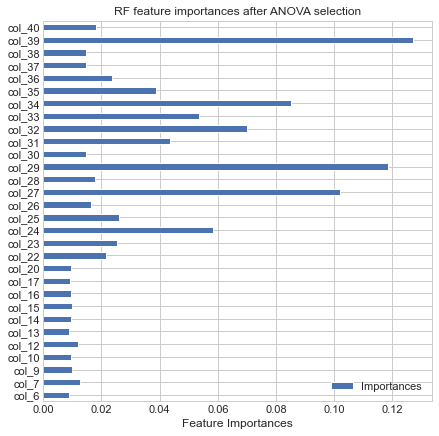

In [22]:
plot_feature_importances(title='RF feature importances after ANOVA selection', coefficients=rfAnova2.feature_importances_, index=selected_anova)

_DT_

In [34]:
dtAnova1 = DT(random_state=42)

dtAnova1.fit(X_train_anova1, y_train)
y_pred_anova1 = dtAnova1.predict(X_test_anova1)

In [35]:
dtAnova2 = DT(random_state=42)

dtAnova2.fit(X_train_anova2, y_train)
y_pred_anova2 = dtAnova2.predict(X_test_anova2)

_CV_

In [40]:
rf_anova = RF(random_state=42, n_jobs=-1, max_depth=20)

In [30]:
X_anova1 = Numpy.concatenate((X_train_anova1, X_test_anova1), axis=0)
X_anova2 = Numpy.concatenate((X_train_anova2, X_test_anova2), axis=0)
X_anova3 = Numpy.concatenate((X_train_anova3, X_test_anova3), axis=0)
X_anova4 = Numpy.concatenate((X_train_anova4, X_test_anova4), axis=0)
X_anova5 = Numpy.concatenate((X_train_anova5, X_test_anova5), axis=0)
X_anova6 = Numpy.concatenate((X_train_anova6, X_test_anova6), axis=0)

In [42]:
scores_anova1 = CV(rf_anova, X=X_anova1, y=y, cv=cv, scoring=cv_scoring, return_train_score=True, n_jobs=-1)

scores_anova2 = CV(rf_anova, X=X_anova2, y=y, cv=cv, scoring=cv_scoring, return_train_score=True, n_jobs=-1)

scores_anova3 = CV(rf_anova, X=X_anova3, y=y, cv=cv, scoring=cv_scoring, return_train_score=True, n_jobs=-1)

scores_anova4 = CV(rf_anova, X=X_anova4, y=y, cv=cv, scoring=cv_scoring, return_train_score=True, n_jobs=-1)

scores_anova5 = CV(rf_anova, X=X_anova5, y=y, cv=cv, scoring=cv_scoring, return_train_score=True, n_jobs=-1)

scores_anova6 = CV(rf_anova, X=X_anova6, y=y, cv=cv, scoring=cv_scoring, return_train_score=True, n_jobs=-1)

In [13]:
scores_anova_df = Pandas.DataFrame(scores_anova2)
scores_anova_df['fold'] = scores_anova_df.index

In [14]:
# scores_anova_df_melt = Pandas.melt(scores_anova_df, id_vars=['fold'], value_vars=['test_accuracy', 'test_f1', 'test_r2', 'test_roc_auc'], var_name='metric', value_name='score')
scores_anova_df_melt = Pandas.melt(scores_anova_df, id_vars=['fold'], value_vars=['train_accuracy', 'test_accuracy', 'train_f1', 'test_f1', 'train_r2', 'test_r2', 'train_roc_auc', 'test_roc_auc'], var_name='metric', value_name='score')

g = Seaborn.catplot(x='metric', y='score', hue='fold', data=scores_anova_df_melt, kind='bar', sharey=False)
g.set_xticklabels(rotation=90)
PyPlot.title('ANOVA CV Testing Scores')
PyPlot.show()

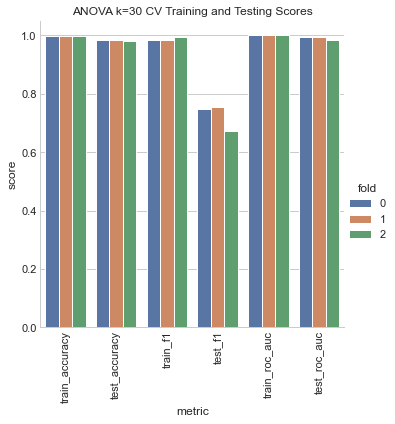

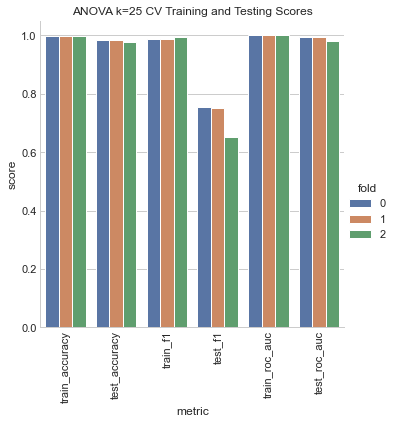

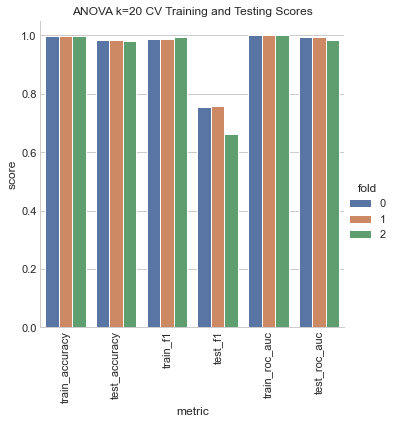

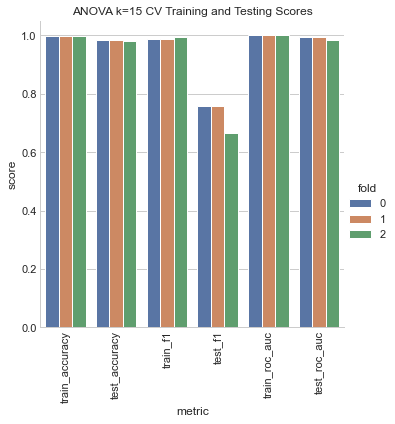

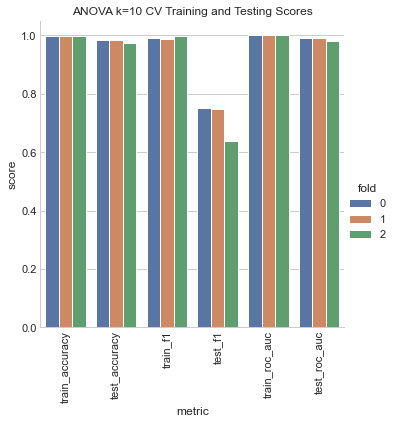

In [44]:
plot_cv('ANOVA', [scores_anova1, scores_anova2, scores_anova3, scores_anova4, scores_anova5, scores_anova6], [k1, k2, k3, k4, k5, k6])

In [39]:
meanScoresAnova1 = get_cv_performance(X_anova1, y, True)
meanScoresAnova2 = get_cv_performance(X_anova2, y, True)
meanScoresAnova3 = get_cv_performance(X_anova3, y, True)
meanScoresAnova4 = get_cv_performance(X_anova4, y, True)
meanScoresAnova5 = get_cv_performance(X_anova5, y, True)
meanScoresAnova6 = get_cv_performance(X_anova6, y, True)

{'Average F1:0.760', 'Average FPR:0.005', 'Average ROC:0.855'}

{'Average F1:0.766', 'Average FPR:0.006', 'Average ROC:0.861'}

{'Average F1:0.767', 'Average FPR:0.005', 'Average ROC:0.861'}

{'Average F1:0.768', 'Average FPR:0.006', 'Average ROC:0.862'}

{'Average F1:0.767', 'Average FPR:0.006', 'Average ROC:0.862'}

{'Average F1:0.758', 'Average FPR:0.006', 'Average ROC:0.860'}

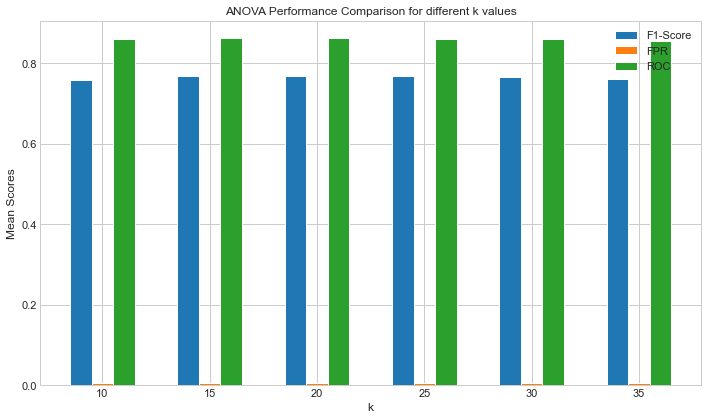

In [61]:
meanScoresAnova = [
    [0.760, 0.005, 0.855], [0.766, 0.006, 0.861], [0.767, 0.005, 0.861],
    [0.768, 0.006, 0.862], [0.767, 0.006, 0.862], [0.758, 0.006, 0.860]
]
x_axis = [k1, k2, k3, k4, k5, k6]

# plot_mean_scores('PCA', meanScores=meanScoresPca, x_axis=x_axis)

# Create a DataFrame with the given structure
data = {
    'k': x_axis,
    'F1-Score': [0.760, 0.766, 0.767, 0.768, 0.767, 0.758],
    'FPR': [0.005, 0.006, 0.005, 0.006, 0.006, 0.006],
    'ROC': [0.855, 0.861, 0.861, 0.862, 0.862, 0.860]
}
df = Pandas.DataFrame(data)

plot_mean_scores2('ANOVA', df=df, x_axis=x_axis)

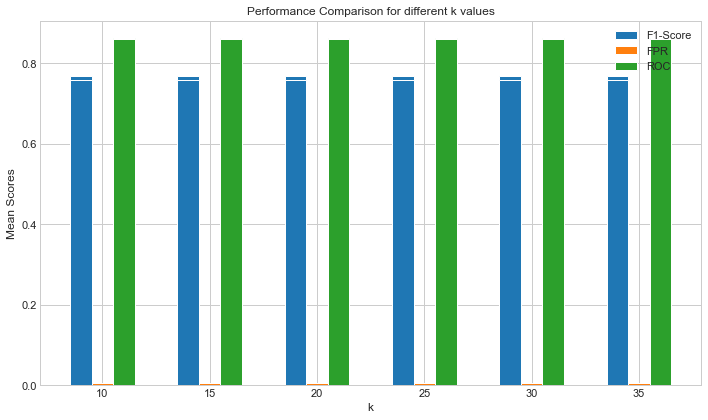

In [55]:
# Define the performance metrics
metrics = ['F1-Score', 'FPR', 'ROC']
meanScoresAnova = [
    meanScoresAnova1, meanScoresAnova2, meanScoresAnova3,
    meanScoresAnova4, meanScoresAnova5,meanScoresAnova6
]
# Define the x-axis values for each meanScoresAnova
x_values = [k1, k2, k3, k4, k5, k6]

# Create a list of colors for the bars
colors = ['tab:blue', 'tab:orange', 'tab:green']

# Set the width of the bars
bar_width = 1

# Create the bar plot
fig, ax = PyPlot.subplots(figsize=(10, 6))
for i, mean_scores in enumerate(meanScoresAnova):
    x = [k - bar_width for k in x_values]
    for j, score in enumerate(mean_scores):
        ax.bar(x, score, bar_width, color=colors[j])
        x = [k + bar_width for k in x]
        
# Add labels, title, and legend
ax.set_xlabel('k')
ax.set_ylabel('Mean Scores')
ax.set_title('Performance Comparison for different k values')
ax.set_xticks(x_values)
ax.set_xticklabels(x_values)
ax.legend(metrics)

# Show the plot
PyPlot.tight_layout()
PyPlot.show()

_Performance_

In [35]:
# FITNESS 1
fitness1Anova1 = fitness1(meanScoresAnova1[0], meanScoresAnova1[1], k1/shape[1])
fitness1Anova2 = fitness1(meanScoresAnova2[0], meanScoresAnova2[1], k2/shape[1])
fitness1Anova3 = fitness1(meanScoresAnova3[0], meanScoresAnova3[1], k3/shape[1])
fitness1Anova4 = fitness1(meanScoresAnova4[0], meanScoresAnova4[1], k4/shape[1])
fitness1Anova5 = fitness1(meanScoresAnova5[0], meanScoresAnova5[1], k5/shape[1])
fitness1Anova6 = fitness1(meanScoresAnova6[0], meanScoresAnova6[1], k6/shape[1])
display([fitness1Anova1, fitness1Anova2, fitness1Anova3, fitness1Anova4, fitness1Anova5, fitness1Anova6])

[0.7750408371957024,
 0.7859751595239238,
 0.7929495571376053,
 0.7997004300581391,
 0.8055278206347563,
 0.8049063672372719]

In [20]:
fprAno = []
objectivesAno = []

for i in range(1, 7):
    var_name = f'y_pred_anova{i}'
    value = globals()[var_name]

    CM = ConfMatrix(y_test, value)
    tn, fp, fn, tp = CM.ravel()
    fprAno1 = fp / (fp + tn)
    fprAno.append(fprAno1)

    f1Ano = F1(y_test, value)
    k = globals()[f'k{i}']
    
    objectivesAno.append(fitness1(f1Ano, fprAno1, k/shape[1]))

display(objectivesAno)
display(fprAno)

[0.7063578644288243,
 0.7096674897686742,
 0.696169828651785,
 0.7096244219361777,
 0.7220586420000884,
 0.6998059249028924]

[0.006603534998735493,
 0.006722960631691348,
 0.009315199370556663,
 0.00882344676426785,
 0.010242504285272711,
 0.015693933177845842]

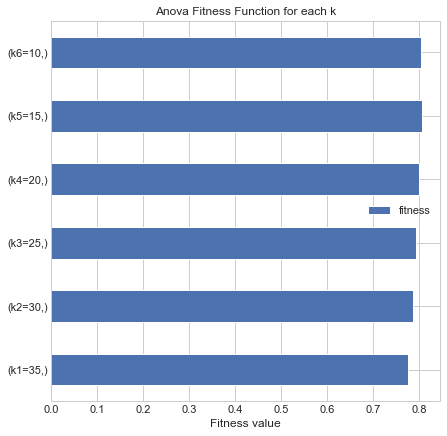

In [40]:
objectivesAno = [
    fitness1Anova1, fitness1Anova2, 
    fitness1Anova3, fitness1Anova4, 
    fitness1Anova5, fitness1Anova6
]
index = [
    'k1=35', 'k2=30', 'k3=25',
    'k4=20', 'k5=15', 'k6=10',
]

coefsObjectiveAnova = Pandas.DataFrame(
    objectivesAno,
    columns=['fitness'],
    index=[index]
)
coefsObjectiveAnova.plot.barh(figsize=(9, 7))
PyPlot.title('Anova Fitness Function for each k')
PyPlot.axvline(x=0, color=".5")
PyPlot.xlabel('Fitness value')
PyPlot.subplots_adjust(left=0.3)

Metric     Score
0  Accuracy  0.980585
1  F1-score  0.658857
2   ROC_AUC  0.792852

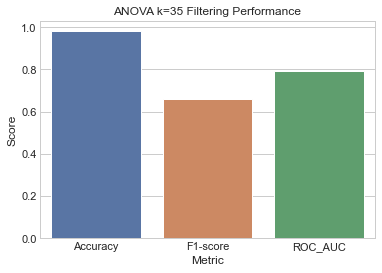

Metric     Score
0  Accuracy  0.980755
1  F1-score  0.660832
2   ROC_AUC  0.792940

Metric     Score
0  Accuracy  0.978884
1  F1-score  0.642890
2   ROC_AUC  0.795924

Metric     Score
0  Accuracy  0.979415
1  F1-score  0.652902
2   ROC_AUC  0.801605

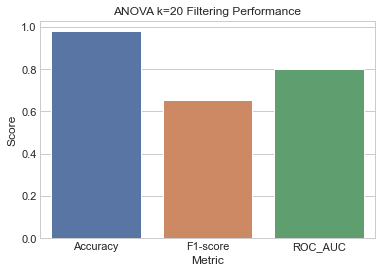

Metric     Score
0  Accuracy  0.978612
1  F1-score  0.648086
2   ROC_AUC  0.806285

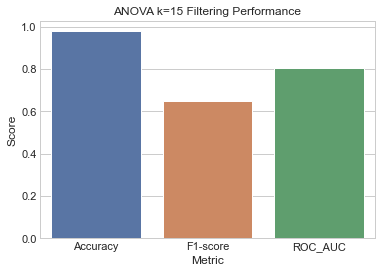

Metric     Score
0  Accuracy  0.974034
1  F1-score  0.617573
2   ROC_AUC  0.823363

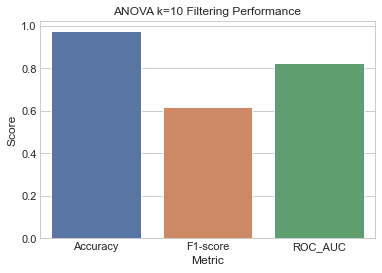

In [19]:
metrics_anova = [
    evaluate_performance(y_test, y_pred_anova1), evaluate_performance(y_test, y_pred_anova2), evaluate_performance(y_test, y_pred_anova3), evaluate_performance(y_test, y_pred_anova4), evaluate_performance(y_test, y_pred_anova5), evaluate_performance(y_test, y_pred_anova6)
]

k = 35
for metric in metrics_anova:    
    display(metric)
    Seaborn.barplot(data=metric, x='Metric', y='Score')
    PyPlot.title(f'ANOVA k={k} Filtering Performance')
    PyPlot.show()

    k -= 5

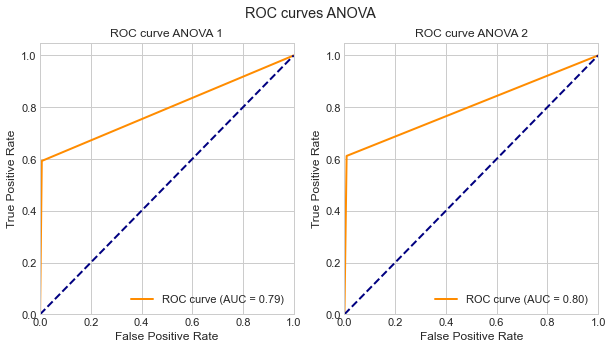

In [12]:
plot_roc_curve(title='ANOVA', y_test=y_test, y_predict1=y_pred_anova1, y_predict2=y_pred_anova2)

In [41]:
X_train_curr = X_train_anova2
profile_model()

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
ERROR: Could not find file C:\Users\IA\AppData\Local\Temp\ipykernel_20536\2684231453.py



Filename: d:\ProgramFiles\Python\Conda\lib\site-packages\memory_profiler.py

Line #    Mem usage    Increment  Occurences   Line Contents
  1140    667.7 MiB    667.7 MiB           1               def wrapper(*args, **kwargs):
  1141    667.7 MiB      0.0 MiB           1                   prof = get_prof()
  1142    709.1 MiB     41.5 MiB           1                   val = prof(func)(*args, **kwargs)
  1143    709.1 MiB      0.0 MiB           1                   show_results_bound(prof)
  1144    709.1 MiB      0.0 MiB           1                   return val

In [14]:
X_train_curr = X_train_anova2
resultAll = memory_usage((train_model, (), {}))

ERROR: Could not find file C:\Users\IA\AppData\Local\Temp\ipykernel_11960\2684231453.py


In [15]:
result_specs_anova = resultAll[len(resultAll) - 1] - resultAll[0]
display(result_specs_anova)

40.44140625

In [15]:
X_train_curr = X_train_anova6
resultAll = memory_usage((train_model, (), {}))

result_specs_anova1 = resultAll[len(resultAll) - 1] - resultAll[0]
display(result_specs_anova1)

ERROR: Could not find file C:\Users\IA\AppData\Local\Temp\ipykernel_1980\1981354134.py


44.515625

In [13]:
X_train_curr = X_train_anova4
resultAll = memory_usage((train_model, (), {}))

result_specs_anova1 = resultAll[len(resultAll) - 1] - resultAll[0]
display(result_specs_anova1)

ERROR: Could not find file C:\Users\IA\AppData\Local\Temp\ipykernel_1980\1981354134.py


41.32421875

#### _IG_

In [29]:
igFilter1 = SelectKBest(score_func=IG, k=k1)
igFilter2 = SelectKBest(score_func=IG, k=k2)
igFilter3 = SelectKBest(score_func=IG, k=k3)
igFilter4 = SelectKBest(score_func=IG, k=k4)
igFilter5 = SelectKBest(score_func=IG, k=k5)
igFilter6 = SelectKBest(score_func=IG, k=k6)

X_train_ig1 = igFilter1.fit_transform(X_train, y_train)
X_test_ig1 = igFilter1.transform(X_test)
X_train_ig2 = igFilter2.fit_transform(X_train, y_train)
X_test_ig2 = igFilter2.transform(X_test)

X_train_ig3 = igFilter3.fit_transform(X_train, y_train)
X_test_ig3 = igFilter3.transform(X_test)
X_train_ig4 = igFilter4.fit_transform(X_train, y_train)
X_test_ig4 = igFilter4.transform(X_test)

X_train_ig5 = igFilter5.fit_transform(X_train, y_train)
X_test_ig5 = igFilter5.transform(X_test)
X_train_ig6 = igFilter6.fit_transform(X_train, y_train)
X_test_ig6 = igFilter6.transform(X_test)

In [25]:
selected_ig = display_selected_features(igFilter1.get_support(), True)

Selected Features: ['col_2', 'col_3', 'col_5', 'col_6', 'col_7', 'col_9', 'col_10', 'col_12', 'col_13', 'col_14', 'col_15', 'col_16', 'col_17', 'col_19', 'col_20', 'col_21', 'col_22', 'col_23', 'col_24', 'col_25', 'col_26', 'col_27', 'col_28', 'col_29', 'col_30', 'col_31', 'col_32', 'col_33', 'col_34', 'col_35', 'col_36', 'col_37', 'col_38', 'col_39', 'col_40']


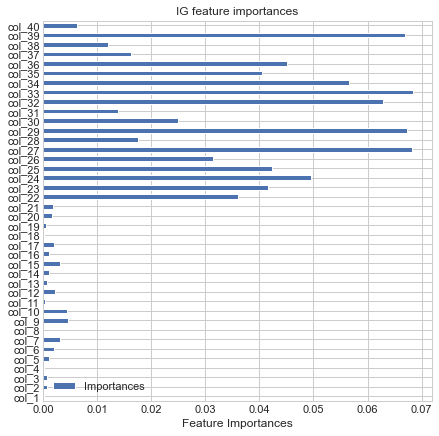

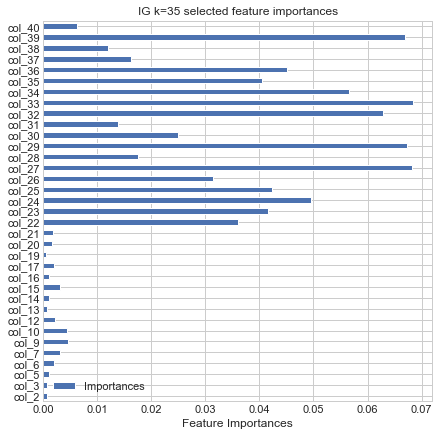

In [26]:
plot_feature_importances(title='IG feature importances', coefficients=igFilter1.scores_, index=X_train.columns)

plot_feature_importances(title=f'IG k={k1} selected feature importances', coefficients=igFilter1.scores_[igFilter1.get_support(indices=True)], index=selected_ig)

_DT_

In [ ]:
# X_train_filtered1 = X_train[selected1]
# X_test_filtered1 = X_test[selected1]

dt_ig1 = DT(random_state=42)
dt_ig1.fit(X_train_ig1, y_train)
y_pred_ig1 = dt_ig1.predict(X_test_ig1)

In [42]:
# X_train_filtered2 = X_train[selected2]
# X_test_filtered2 = X_test[selected2]

dt_ig2 = DT(random_state=42)
dt_ig2.fit(X_train_ig2, y_train)
y_pred_ig2 = dt_ig2.predict(X_test_ig2)

_RF_

In [23]:
rf_ig1 = RF(random_state=42, n_jobs=-1, max_depth=20)

rf_ig1.fit(X_train_ig1, y_train)
y_pred_ig1 = rf_ig1.predict(X_test_ig1)

In [24]:
rf_ig2 = RF(random_state=42, n_jobs=-1, max_depth=20)

rf_ig2.fit(X_train_ig2, y_train)
y_pred_ig2 = rf_ig2.predict(X_test_ig2)

In [25]:
rf_ig3 = RF(random_state=42, n_jobs=-1, max_depth=20)

rf_ig3.fit(X_train_ig3, y_train)
y_pred_ig3 = rf_ig3.predict(X_test_ig3)

In [26]:
rf_ig4 = RF(random_state=42, n_jobs=-1, max_depth=20)

rf_ig4.fit(X_train_ig4, y_train)
y_pred_ig4 = rf_ig4.predict(X_test_ig4)

In [27]:
rf_ig5 = RF(random_state=42, n_jobs=-1, max_depth=20)

rf_ig5.fit(X_train_ig5, y_train)
y_pred_ig5 = rf_ig5.predict(X_test_ig5)

In [28]:
rf_ig6 = RF(random_state=42, n_jobs=-1, max_depth=20)

rf_ig6.fit(X_train_ig6, y_train)
y_pred_ig6 = rf_ig6.predict(X_test_ig6)

In [28]:
plot_feature_importances(title=f'RF feature importances after IG k={k1} selection', coefficients=rf_ig1.feature_importances_, index=selected_ig)

_CV_

In [30]:
rf_ig = RF(random_state=42, n_jobs=-1, max_depth=20)

In [31]:
X_ig1 = Numpy.concatenate((X_train_ig1, X_test_ig1), axis=0)
X_ig2 = Numpy.concatenate((X_train_ig2, X_test_ig2), axis=0)
X_ig3 = Numpy.concatenate((X_train_ig3, X_test_ig3), axis=0)
X_ig4 = Numpy.concatenate((X_train_ig4, X_test_ig4), axis=0)
X_ig5 = Numpy.concatenate((X_train_ig5, X_test_ig5), axis=0)
X_ig6 = Numpy.concatenate((X_train_ig6, X_test_ig6), axis=0)

In [38]:
scores_ig1 = CV(rf_ig, X=X_ig1, y=y, cv=cv, scoring=cv_scoring, return_train_score=True, n_jobs=-1)

scores_ig2 = CV(rf_ig, X=X_ig2, y=y, cv=cv, scoring=cv_scoring, return_train_score=True, n_jobs=-1)

scores_ig3 = CV(rf_ig, X=X_ig3, y=y, cv=cv, scoring=cv_scoring, return_train_score=True, n_jobs=-1)

scores_ig4 = CV(rf_ig, X=X_ig4, y=y, cv=cv, scoring=cv_scoring, return_train_score=True, n_jobs=-1)

scores_ig5 = CV(rf_ig, X=X_ig5, y=y, cv=cv, scoring=cv_scoring, return_train_score=True, n_jobs=-1)

scores_ig6 = CV(rf_ig, X=X_ig6, y=y, cv=cv, scoring=cv_scoring, return_train_score=True, n_jobs=-1)

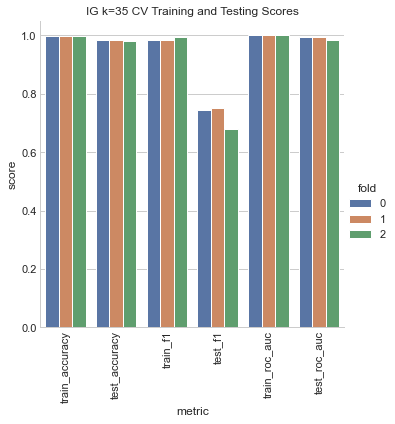

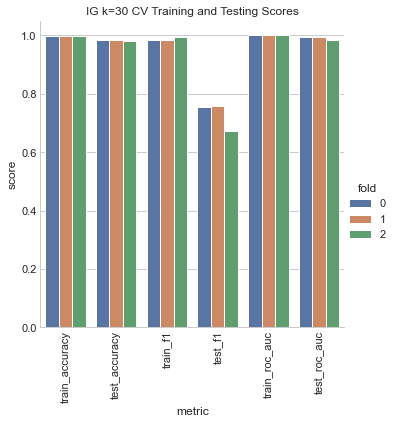

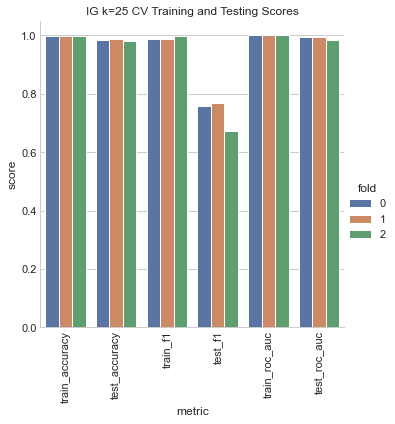

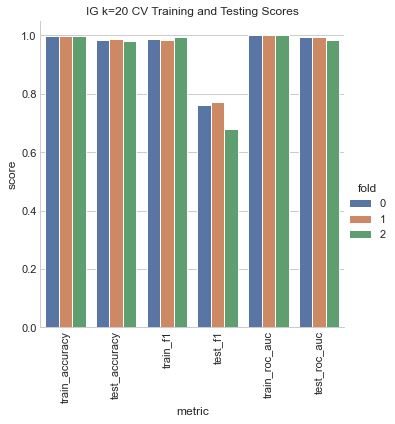

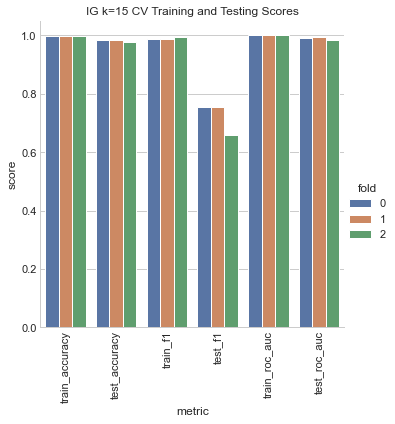

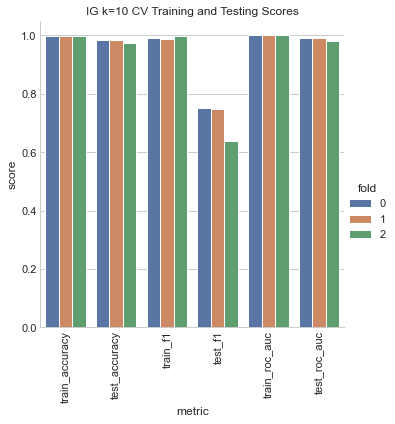

In [39]:
plot_cv('IG', [scores_ig1, scores_ig2, scores_ig3, scores_ig4, scores_ig5, scores_ig6], [k1, k2, k3, k4, k5, k6])

In [57]:
meanScoresIG1 = get_cv_performance(X_ig1, y, True)
meanScoresIG2 = get_cv_performance(X_ig2, y, True)
meanScoresIG3 = get_cv_performance(X_ig3, y, True)
meanScoresIG4 = get_cv_performance(X_ig4, y, True)
meanScoresIG5 = get_cv_performance(X_ig5, y, True)
meanScoresIG6 = get_cv_performance(X_ig6, y, True)

{'Average F1:0.761', 'Average FPR:0.006', 'Average ROC:0.856'}

{'Average F1:0.764', 'Average FPR:0.006', 'Average ROC:0.860'}

{'Average F1:0.772', 'Average FPR:0.006', 'Average ROC:0.867'}

{'Average F1:0.776', 'Average FPR:0.006', 'Average ROC:0.871'}

{'Average F1:0.765', 'Average FPR:0.006', 'Average ROC:0.861'}

{'Average F1:0.758', 'Average FPR:0.006', 'Average ROC:0.860'}

In [32]:
meanScoresIG1 = get_cv_performance(X_ig1, y, True)
meanScoresIG2 = get_cv_performance(X_ig2, y, True)
meanScoresIG3 = get_cv_performance(X_ig3, y, True)
meanScoresIG4 = get_cv_performance(X_ig4, y, True)
meanScoresIG5 = get_cv_performance(X_ig5, y, True)
meanScoresIG6 = get_cv_performance(X_ig6, y, True)

{'Average F1:0.761', 'Average FPR:0.006', 'Average ROC:0.856'}

{'Average F1:0.764', 'Average FPR:0.006', 'Average ROC:0.860'}

{'Average F1:0.772', 'Average FPR:0.006', 'Average ROC:0.867'}

{'Average F1:0.776', 'Average FPR:0.006', 'Average ROC:0.871'}

{'Average F1:0.765', 'Average FPR:0.006', 'Average ROC:0.861'}

{'Average F1:0.758', 'Average FPR:0.006', 'Average ROC:0.860'}

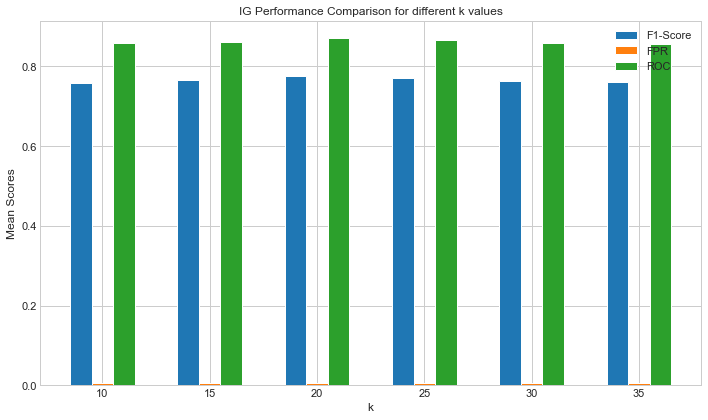

In [62]:
meanScoresIG = [
    [0.761, 0.006, 0.856], [0.764, 0.006, 0.860], [0.772, 0.006, 0.867],
    [0.776, 0.006, 0.871], [0.765, 0.006, 0.861], [0.758, 0.006, 0.860]
]
x_axis = [k1, k2, k3, k4, k5, k6]

# plot_mean_scores('PCA', meanScores=meanScoresPca, x_axis=x_axis)

# Create a DataFrame with the given structure
data = {
    'k': x_axis,
    'F1-Score': [0.761, 0.764, 0.772, 0.776, 0.765, 0.758],
    'FPR': [0.006, 0.006, 0.006, 0.006, 0.006, 0.006],
    'ROC': [0.856, 0.860, 0.867, 0.871, 0.861, 0.860]
}
df = Pandas.DataFrame(data)

plot_mean_scores2('IG', df=df, x_axis=x_axis)

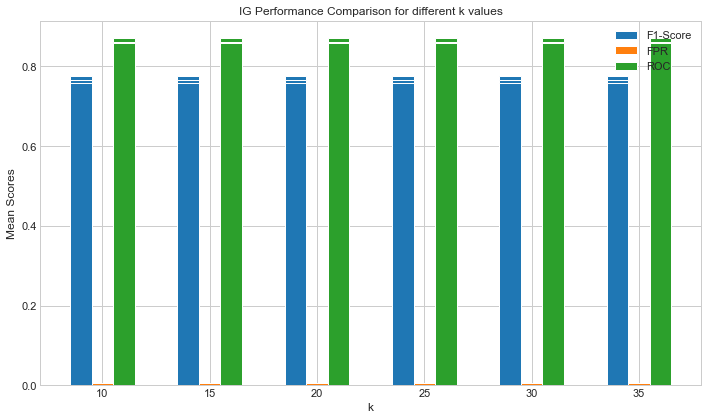

In [12]:
meanScoresIG = [
    [0.761, 0.006, 0.856], [0.764, 0.006, 0.860], [0.772, 0.006, 0.867],
    [0.776, 0.006, 0.871], [0.765, 0.006, 0.861], [0.758, 0.006, 0.860]
]
x_axis = [k1, k2, k3, k4, k5, k6]

plot_mean_scores('IG', meanScores=meanScoresIG, x_axis=x_axis)

_Performance_

In [33]:
fitness1IG1 = fitness1(meanScoresIG1[0], meanScoresIG1[1], k1/shape[1])
fitness1IG2 = fitness1(meanScoresIG2[0], meanScoresIG2[1], k2/shape[1])
fitness1IG3 = fitness1(meanScoresIG3[0], meanScoresIG3[1], k3/shape[1])
fitness1IG4 = fitness1(meanScoresIG4[0], meanScoresIG4[1], k4/shape[1])
fitness1IG5 = fitness1(meanScoresIG5[0], meanScoresIG5[1], k5/shape[1])
fitness1IG6 = fitness1(meanScoresIG6[0], meanScoresIG6[1], k6/shape[1])
display([fitness1IG1, fitness1IG2, fitness1IG3, fitness1IG4, fitness1IG5, fitness1IG6])

[0.7759007706501124,
 0.7845384425122133,
 0.7966928189700042,
 0.8061307564693968,
 0.8039222684081547,
 0.8049063672372719]

In [28]:
get_objective('y_pred_ig', 1, 7)

Objectives


[0.7039993093168483,
 0.7133092784105143,
 0.7131766666139114,
 0.7221897695047554,
 0.7190663188990176,
 0.6998059249028924]


F1


[0.6653892215568862,
 0.6694560669456066,
 0.6611725924181776,
 0.6649616368286445,
 0.6531868131868132,
 0.6205929487179488]


FPR


[0.006463034254081547,
 0.006413858993452665,
 0.0072638884986090425,
 0.0076572905836400935,
 0.010368954955461264,
 0.015693933177845842]

Metric     Score
0  Accuracy  0.981395
1  F1-score  0.670522
2   ROC_AUC  0.796077

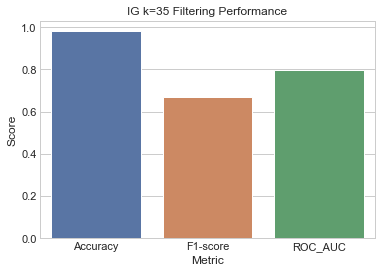

Metric     Score
0  Accuracy  0.980959
1  F1-score  0.665311
2   ROC_AUC  0.795748

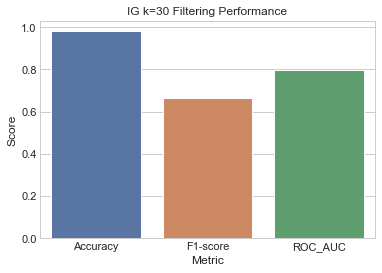

Metric     Score
0  Accuracy  0.980612
1  F1-score  0.662961
2   ROC_AUC  0.797752

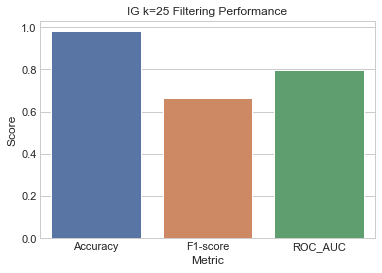

Metric     Score
0  Accuracy  0.980415
1  F1-score  0.666744
2   ROC_AUC  0.805656

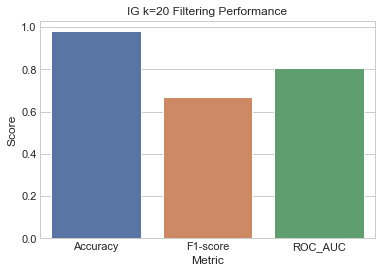

Metric     Score
0  Accuracy  0.978728
1  F1-score  0.652517
2   ROC_AUC  0.810607

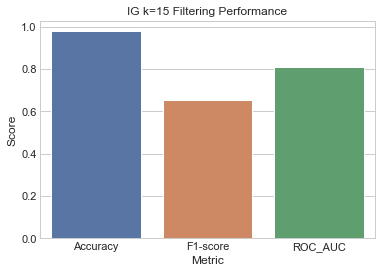

Metric     Score
0  Accuracy  0.974034
1  F1-score  0.617573
2   ROC_AUC  0.823363

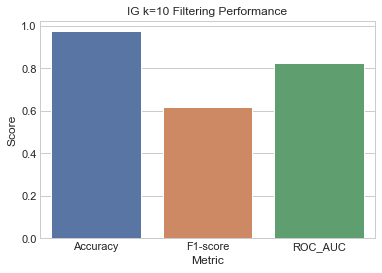

In [27]:
metrics_ig = [
    evaluate_performance(y_test, y_pred_ig1), evaluate_performance(y_test, y_pred_ig2),
    evaluate_performance(y_test, y_pred_ig3), evaluate_performance(y_test, y_pred_ig4),
    evaluate_performance(y_test, y_pred_ig5), evaluate_performance(y_test, y_pred_ig6),
]

k = 35
for metric in metrics_ig:
    display(metric)
    Seaborn.barplot(data=metric, x='Metric', y='Score')
    PyPlot.title(f'IG k={k} Filtering Performance')
    PyPlot.show()

    k -= 5

In [14]:
plot_roc_curve(title='IG', y_test=y_test, y_predict1=y_pred_ig1, y_predict2=y_pred_ig2)

In [43]:
X_train_curr = X_train_ig1
profile_model()

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
ERROR: Could not find file C:\Users\IA\AppData\Local\Temp\ipykernel_20536\2684231453.py



Filename: d:\ProgramFiles\Python\Conda\lib\site-packages\memory_profiler.py

Line #    Mem usage    Increment  Occurences   Line Contents
  1140    530.0 MiB    530.0 MiB           1               def wrapper(*args, **kwargs):
  1141    530.0 MiB      0.0 MiB           1                   prof = get_prof()
  1142    540.8 MiB     10.8 MiB           1                   val = prof(func)(*args, **kwargs)
  1143    540.8 MiB      0.0 MiB           1                   show_results_bound(prof)
  1144    540.8 MiB      0.0 MiB           1                   return val

In [18]:
X_train_curr = X_train_ig1

resultAll = memory_usage((train_model, (), {}))
result_specs_ig = resultAll[len(resultAll) - 1] - resultAll[0]
display(result_specs_ig)

ERROR: Could not find file C:\Users\IA\AppData\Local\Temp\ipykernel_11960\2684231453.py


42.08203125

In [20]:
X_train_curr = X_train_ig4

resultAll = memory_usage((train_model, (), {}))
result_specs_ig = resultAll[len(resultAll) - 1] - resultAll[0]
display(result_specs_ig)

ERROR: Could not find file C:\Users\IA\AppData\Local\Temp\ipykernel_1980\1981354134.py


42.2421875

In [21]:
X_train_curr = X_train_ig6

resultAll = memory_usage((train_model, (), {}))
result_specs_ig = resultAll[len(resultAll) - 1] - resultAll[0]
display(result_specs_ig)

ERROR: Could not find file C:\Users\IA\AppData\Local\Temp\ipykernel_1980\1981354134.py


45.78515625

#### _Chi<sup>2</sup>_

In [17]:
chiFilter1 = SelectKBest(score_func=Chi2, k=k1)
chiFilter2 = SelectKBest(score_func=Chi2, k=k2)

X_train_chi1 = chiFilter1.fit_transform(X_train, y_train)
X_test_chi1 = chiFilter1.transform(X_test)
X_train_chi2 = chiFilter2.fit_transform(X_train, y_train)
X_test_chi2 = chiFilter2.transform(X_test)

ValueError: Input X must be non-negative.

#### _PCA_

In [19]:
# Apply PCA
Pca = PCA()
Pca.fit(X_train)

# Plot explained variance ratio
PyPlot.plot(Numpy.cumsum(Pca.explained_variance_ratio_))
PyPlot.xlabel('Number of components')
PyPlot.ylabel('Cumulative explained variance')
PyPlot.show()

# Choose the number of components that explain at least 95% of the variance
cumSumVariance = Numpy.cumsum(Pca.explained_variance_ratio_)
n_components1 = Numpy.argmax(cumSumVariance >= 0.95) + 1
n_components2 = Numpy.argmax(cumSumVariance >= 0.98) + 1
n_components3 = Numpy.argmax(cumSumVariance >= 0.999) + 1
display(n_components3)

20

In [21]:
Pca1 = PCA(n_components=n_components1)
X_train_pca1 = Pca1.fit_transform(X_train)
X_test_pca1 = Pca1.transform(X_test)

Pca2 = PCA(n_components=n_components2)
X_train_pca2 = Pca2.fit_transform(X_train)
X_test_pca2 = Pca2.transform(X_test)

Pca3 = PCA(n_components=n_components3)
X_train_pca3 = Pca3.fit_transform(X_train)
X_test_pca3 = Pca3.transform(X_test)

In [52]:
# Get the component loadings or eigenvectors
component_loadings = Pca1.components_

# Create a DataFrame to display the selected features
selected_features = Pandas.DataFrame(component_loadings.T, columns=['PC1', 'PC2'], index=X_train.columns)

# Display the selected features
print(selected_features)

             PC1       PC2
col_1   0.000820 -0.000518
col_2   0.003371 -0.000896
col_3  -0.001260  0.000733
col_4   0.000069 -0.000053
col_5  -0.000342 -0.000569
col_6   0.001150  0.000258
col_7  -0.002705  0.000635
col_8  -0.001034  0.000584
col_9  -0.001040 -0.000808
col_10  0.001361  0.000435
col_11  0.000165 -0.000563
col_12  0.002207 -0.000866
col_13 -0.001579 -0.000004
col_14 -0.000701 -0.000095
col_15  0.000946 -0.000006
col_16 -0.001344 -0.000086
col_17  0.000930  0.000122
col_18 -0.000200  0.000332
col_19  0.000895 -0.000161
col_20  0.001281  0.000157
col_21 -0.002735  0.244576
col_22 -0.109604  0.257022
col_23  0.122041  0.103467
col_24  0.112894 -0.085535
col_25 -0.068590 -0.116407
col_26 -0.026777  0.158380
col_27 -0.341405 -0.177060
col_28 -0.089037  0.086044
col_29 -0.047666  0.086539
col_30 -0.046486  0.272265
col_31  0.001066 -0.258316
col_32  0.282974 -0.256252
col_33 -0.602058 -0.253451
col_34  0.188144  0.481857
col_35 -0.075831  0.034890
col_36 -0.112882 -0.109915
c

In [15]:
explained_variance_ratio = Pca2.explained_variance_ratio_
display(explained_variance_ratio)
# Create a DataFrame to display the selected features
selected_features = Pandas.DataFrame({'Explained Variance Ratio': explained_variance_ratio}, index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])

# Display the selected features
print(selected_features)

array([0.94429608, 0.01522295, 0.00601126, 0.00397434, 0.00330649,
       0.00284162, 0.0024888 , 0.00237982])

     Explained Variance Ratio
PC1                  0.944296
PC2                  0.015223
PC3                  0.006011
PC4                  0.003974
PC5                  0.003306
PC6                  0.002842
PC7                  0.002489
PC8                  0.002380


In [14]:
explained_variance_ratio = Pca3.explained_variance_ratio_
display(explained_variance_ratio)

array([0.94429608])

_DT_

In [23]:
dt_pca1 = DT(random_state=42)
dt_pca1.fit(X_train_pca1, y_train)
y_pred_pca1 = dt_pca1.predict(X_test_pca1)

In [24]:
dt_pca2 = DT(random_state=42)
dt_pca2.fit(X_train_pca2, y_train)
y_pred_pca2 = dt_pca2.predict(X_test_pca2)

_RF_

In [31]:
rf_pca1 = RF(random_state=42, n_jobs=-1, max_depth=20)

rf_pca1.fit(X_train_pca1, y_train)
y_pred_pca1 = rf_pca1.predict(X_test_pca1)

In [32]:
rf_pca2 = RF(random_state=42, n_jobs=-1, max_depth=20)

rf_pca2.fit(X_train_pca2, y_train)
y_pred_pca2 = rf_pca2.predict(X_test_pca2)

_CV_

In [22]:
rf_pca = RF(random_state=42, n_jobs=-1, max_depth=20)

In [23]:
X_pca1 = Numpy.concatenate((X_train_pca1, X_test_pca1), axis=0)
X_pca2 = Numpy.concatenate((X_train_pca2, X_test_pca2), axis=0)
X_pca3 = Numpy.concatenate((X_train_pca3, X_test_pca3), axis=0)

In [14]:
scores_pca1 = CV(rf_pca, X=X_pca1, y=y, cv=cv, scoring=cv_scoring, return_train_score=True, n_jobs=-1)

scores_pca2 = CV(rf_pca, X=X_pca2, y=y, cv=cv, scoring=cv_scoring, return_train_score=True, n_jobs=-1)

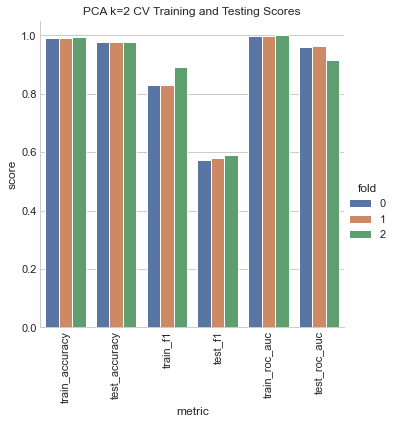

In [15]:
plot_cv('PCA', [scores_pca1, scores_pca2], [2, 8])

In [24]:
meanScoresPca1 = get_cv_performance(X_pca1, y, True)
meanScoresPca2 = get_cv_performance(X_pca2, y, True)
meanScoresPca3 = get_cv_performance(X_pca3, y, True)

{'Average F1:0.589', 'Average FPR:0.007', 'Average ROC:0.752'}

{'Average F1:0.715', 'Average FPR:0.006', 'Average ROC:0.828'}

{'Average F1:0.743', 'Average FPR:0.004', 'Average ROC:0.834'}

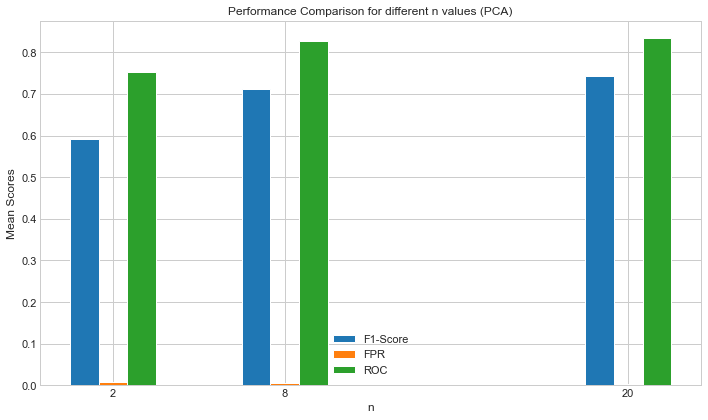

In [26]:
meanScoresPca = [
    [0.591, 0.007, 0.753], [0.712, 0.006, 0.827], [0.743, 0.004, 0.834]
]
x_axis = [2, 8, 20]

# plot_mean_scores('PCA', meanScores=meanScoresPca, x_axis=x_axis)

# Create a DataFrame with the given structure
data = {
    'n': x_axis,
    'F1-Score': [0.591, 0.712, 0.743],
    'FPR': [0.007, 0.006, 0.004],
    'ROC': [0.753, 0.827, 0.834]
}
df = Pandas.DataFrame(data)

# Set the colors for the bars
colors = ['tab:blue', 'tab:orange', 'tab:green']

# Create the bar plot
fig, ax = PyPlot.subplots(figsize=(10, 6))
bar_width = 1

for i, metric in enumerate(['F1-Score', 'FPR', 'ROC']):
    ax.bar(df['n'] + (i - 1) * bar_width, df[metric], bar_width, color=colors[i], label=metric)

# Add labels, title, and legend
ax.set_xlabel('n')
ax.set_ylabel('Mean Scores')
ax.set_title('Performance Comparison for different n values (PCA)')
ax.set_xticks(x_axis)
ax.set_xticklabels(x_axis)
ax.legend()

# Show the plot
PyPlot.tight_layout()
PyPlot.show()

_Performance_

In [31]:
fitness1Pca1 = fitness1(meanScoresPca1[0], meanScoresPca1[1], 2/shape[1])
fitness1Pca2 = fitness1(meanScoresPca2[0], meanScoresPca2[1], 8/shape[1])
fitness1Pca3 = fitness1(meanScoresPca3[0], meanScoresPca3[1], 20/shape[1])
display([fitness1Pca1, fitness1Pca2, fitness1Pca3])

[0.688061294432442, 0.774804381065836, 0.7815148939998274]

In [33]:
get_objective('y_pred_pca', 1, 3)

Objectives


[0.6521439303880193, 0.6922682631746672]


F1


[0.5973315087239138, 0.6414313534566699]


FPR


[0.010523505774580605, 0.006526259589175822]

In [28]:
metrics_pca = [evaluate_performance(y_test, y_pred_pca1), evaluate_performance(y_test, y_pred_pca2)]

for metric in metrics_pca:
    display(metric)
    Seaborn.barplot(data=metric, x='Metric', y='Score')
    PyPlot.title('PCA Filtering Performance')
    PyPlot.show()

Metric     Score
0  Accuracy  0.973823
1  F1-score  0.569286
2   ROC_AUC  0.767215

Metric     Score
0  Accuracy  0.980054
1  F1-score  0.642700
2   ROC_AUC  0.780206

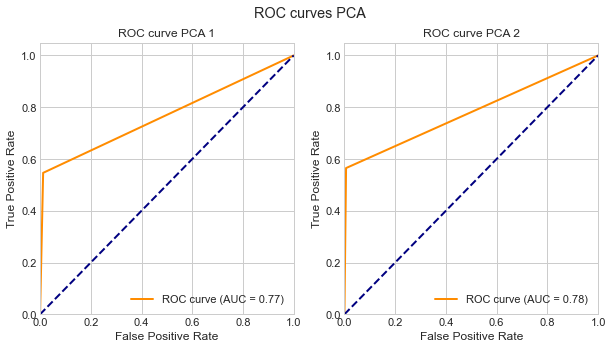

In [22]:
plot_roc_curve(title='PCA', y_test=y_test, y_predict1=y_pred_pca1, y_predict2=y_pred_pca2)

In [46]:
X_train_curr = X_train_pca2
profile_model()

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
ERROR: Could not find file C:\Users\IA\AppData\Local\Temp\ipykernel_20536\2684231453.py



Filename: d:\ProgramFiles\Python\Conda\lib\site-packages\memory_profiler.py

Line #    Mem usage    Increment  Occurences   Line Contents
  1140    525.2 MiB    525.2 MiB           1               def wrapper(*args, **kwargs):
  1141    525.2 MiB      0.0 MiB           1                   prof = get_prof()
  1142    578.8 MiB     53.6 MiB           1                   val = prof(func)(*args, **kwargs)
  1143    578.8 MiB      0.0 MiB           1                   show_results_bound(prof)
  1144    578.8 MiB      0.0 MiB           1                   return val

In [25]:
X_train_curr = X_train_pca2

resultAll = memory_usage((train_model, (), {}))
result_specs_pca = resultAll[len(resultAll) - 1] - resultAll[0]
display(result_specs_pca)

ERROR: Could not find file C:\Users\IA\AppData\Local\Temp\ipykernel_11960\2684231453.py


52.78515625

#### _LDA_

In [69]:
Lda1 = LDA(n_components=1)

X_train_lda1 = Lda1.fit_transform(X_train, y_train)
X_test_lda1 = Lda1.transform(X_test)

_DT_

In [60]:
dt_lda1 = DT(random_state=42)
dt_lda1.fit(X_train_lda1, y_train)
y_pred_lda1 = dt_lda1.predict(X_test_lda1)

_RF_

In [35]:
rf_lda1 = RF(random_state=42)

rf_lda1.fit(X_train_lda1, y_train)
y_pred_lda1 = rf_lda1.predict(X_test_lda1)

In [14]:
rf_lda = RF(random_state=42, n_jobs=-1, max_depth=20)

X_lda1 = Numpy.concatenate((X_train_lda1, X_test_lda1), axis=0)

In [15]:
scores_lda1 = CV(rf_lda, X=X_lda1, y=y, cv=cv, scoring=cv_scoring, return_train_score=True, n_jobs=-1)

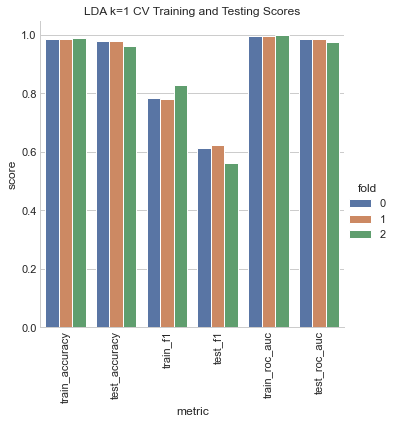

In [16]:
plot_cv('LDA', [scores_lda1], [1])

In [17]:
meanScoresLda1 = get_cv_performance(X_lda1, y, True)

{'Average F1:0.624', 'Average FPR:0.014', 'Average ROC:0.816'}

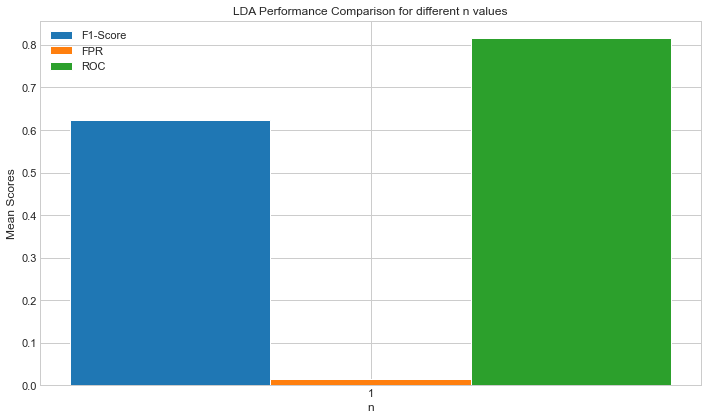

In [27]:
meanScoresIG = [
    [0.624, 0.014, 0.816]
]
x_axis = [1]

# plot_mean_scores('PCA', meanScores=meanScoresPca, x_axis=x_axis)

# Create a DataFrame with the given structure
data = {
    'n': x_axis,
    'F1-Score': [0.624],
    'FPR': [0.014],
    'ROC': [0.816]
}
df = Pandas.DataFrame(data)

plot_mean_scores2('LDA', df=df, x_axis=x_axis, k_title='n')

_Performance_

In [21]:
# FITNESS 1
fitness1Lda1 = fitness1(meanScoresLda1[0], meanScoresLda1[1], 1/shape[1])
display(fitness1Lda1)

0.713874713863514

In [36]:
get_objective('y_pred_pca', 1, 2)

Objectives


[0.6521439303880193]


F1


[0.5973315087239138]


FPR


[0.010523505774580605]

Metric     Score
0  Accuracy  0.947068
1  F1-score  0.422989
2   ROC_AUC  0.785526

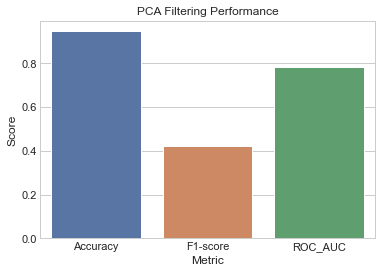

In [31]:
metrics_lda = [evaluate_performance(y_test, y_pred_lda1),]

for metric in metrics_lda:
    display(metric)
    Seaborn.barplot(data=metric, x='Metric', y='Score')
    PyPlot.title('PCA Filtering Performance')
    PyPlot.show()

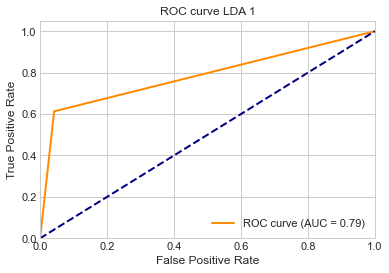

In [26]:
plot_roc_curve(title='LDA', y_test=y_test, y_predict1=y_pred_lda1)

In [70]:
X_train_curr = X_train_lda1

resultAll = memory_usage((train_model, (), {}))
result_specs_lda = resultAll[len(resultAll) - 1] - resultAll[0]
display(result_specs_lda)

ERROR: Could not find file C:\Users\IA\AppData\Local\Temp\ipykernel_25780\1981354134.py


42.203125

#### _CNN_

In [14]:
import tensorflow as TensorFlow
from tensorflow import keras as Keras

In [15]:
y_train_cnn = Keras.utils.to_categorical(y_train)
y_test_cnn = Keras.utils.to_categorical(y_test)
y_cnn = Pandas.concat([y_train, y_test], axis=0)
y_cnn = y_cnn.reset_index(drop=True)
y_cnn = Keras.utils.to_categorical(y_cnn)

# Reshaping
X_train_cnn = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

In [16]:
cnnModel1 = Keras.models.Sequential([
    Keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    Keras.layers.MaxPooling1D(pool_size=2),
    Keras.layers.Flatten(),
    Keras.layers.Dense(64, activation='relu'),
    Keras.layers.Dense(y_cnn.shape[1], activation='softmax')
])
cnnModel2 = Keras.models.Sequential([
    Keras.layers.Conv1D(filters=30, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    Keras.layers.MaxPooling1D(pool_size=2),
    Keras.layers.Flatten(),
    Keras.layers.Dense(64, activation='relu'),
    Keras.layers.Dense(y_cnn.shape[1], activation='softmax')
])

cnnModel1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['Accuracy', 'F1Score', 'AUC'])
cnnModel2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['Accuracy', 'F1Score', 'AUC'])

cnnModel1.summary()
cnnModel2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 38, 32)            128       
                                                                 
 max_pooling1d (MaxPooling1  (None, 19, 32)            0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 608)               0         
                                                                 
 dense (Dense)               (None, 64)                38976     
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 39234 (153.26 KB)
Trainable params: 39234 (153.26 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [17]:
cnnModel1.fit(X_train_cnn, y_train_cnn, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
10719/10719 [==============================] - 91s 8ms/step - loss: 0.0421 - Accuracy: 0.9827 - f1_score: 0.8515 - auc: 0.9988
Epoch 2/10
10719/10719 [==============================] - 83s 8ms/step - loss: 0.0339 - Accuracy: 0.9851 - f1_score: 0.8778 - auc: 0.9992
Epoch 3/10
10719/10719 [==============================] - 80s 7ms/step - loss: 0.0317 - Accuracy: 0.9861 - f1_score: 0.8875 - auc: 0.9993
Epoch 4/10
10719/10719 [==============================] - 85s 8ms/step - loss: 0.0309 - Accuracy: 0.9866 - f1_score: 0.8932 - auc: 0.9993
Epoch 5/10
10719/10719 [==============================] - 81s 8ms/step - loss: 0.0301 - Accuracy: 0.9867 - f1_score: 0.8946 - auc: 0.9993
Epoch 6/10
10719/10719 [==============================] - 66s 6ms/step - loss: 0.0297 - Accuracy: 0.9871 - f1_score: 0.8971 - auc: 0.9993
Epoch 7/10
10719/10719 [==============================] - 76s 7ms/step - loss: 0.0292 - Accuracy: 0.9873 - f1_score: 0.8978 - auc: 0.9994
Epoch 8/10
10719/10719 [==========

In [18]:
cnnModel2.fit(X_train_cnn, y_train_cnn, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
10719/10719 [==============================] - 87s 8ms/step - loss: 0.0417 - Accuracy: 0.9825 - f1_score: 0.8507 - auc: 0.9988
Epoch 2/10
10719/10719 [==============================] - 83s 8ms/step - loss: 0.0335 - Accuracy: 0.9854 - f1_score: 0.8818 - auc: 0.9992
Epoch 3/10
10719/10719 [==============================] - 82s 8ms/step - loss: 0.0317 - Accuracy: 0.9860 - f1_score: 0.8886 - auc: 0.9993
Epoch 4/10
10719/10719 [==============================] - 82s 8ms/step - loss: 0.0307 - Accuracy: 0.9865 - f1_score: 0.8928 - auc: 0.9993
Epoch 5/10
10719/10719 [==============================] - 76s 7ms/step - loss: 0.0303 - Accuracy: 0.9868 - f1_score: 0.8948 - auc: 0.9993
Epoch 6/10
10719/10719 [==============================] - 81s 8ms/step - loss: 0.0297 - Accuracy: 0.9870 - f1_score: 0.8954 - auc: 0.9993
Epoch 7/10
10719/10719 [==============================] - 78s 7ms/step - loss: 0.0292 - Accuracy: 0.9872 - f1_score: 0.8976 - auc: 0.9994
Epoch 8/10
10719/10719 [==========

In [19]:
loss, accuracy, f1, auc = cnnModel1.evaluate(X_test_cnn, y_test_cnn, verbose=1)

4594/4594 [==============================] - 26s 5ms/step - loss: 0.0361 - Accuracy: 0.9823 - f1_score: 0.8341 - auc: 0.9991


In [20]:
loss, accuracy, f1, auc = cnnModel2.evaluate(X_test_cnn, y_test_cnn, verbose=1)

4594/4594 [==============================] - 24s 5ms/step - loss: 0.0527 - Accuracy: 0.9756 - f1_score: 0.8011 - auc: 0.9985


In [23]:
metrics_cnn = [accuracy, (f1[0]+f1[1])/2, auc]
display(metrics_cnn)

[0.9755986332893372, 0.8010784983634949, 0.9984769225120544]

#### _RFE_

In [10]:
RandomForest = RF(
    n_estimators=100, max_depth=20,
    random_state=42, n_jobs=-1
)

In [23]:
Rfe = RFE(estimator=RandomForest, n_features_to_select=k1)
Rfe1 = Rfe.fit(X_train, y_train)

Rfe = RFE(estimator=RandomForest, n_features_to_select=k2)
Rfe2 = Rfe.fit(X_train, y_train)

Rfe = RFE(estimator=RandomForest, n_features_to_select=k3)
Rfe3 = Rfe.fit(X_train, y_train)

Rfe = RFE(estimator=RandomForest, n_features_to_select=k4)
Rfe4 = Rfe.fit(X_train, y_train)

Rfe = RFE(estimator=RandomForest, n_features_to_select=k5)
Rfe5 = Rfe.fit(X_train, y_train)

Rfe = RFE(estimator=RandomForest, n_features_to_select=k6)
Rfe6 = Rfe.fit(X_train, y_train)

In [11]:
Rfe = RFE(estimator=RandomForest, n_features_to_select=k4)
Rfe4 = Rfe.fit(X_train, y_train)

In [49]:
selected_rfe = display_selected_features(Rfe4.get_support(), True)

Selected Features: ['col_2', 'col_21', 'col_22', 'col_23', 'col_24', 'col_25', 'col_26', 'col_27', 'col_28', 'col_29', 'col_31', 'col_32', 'col_33', 'col_34', 'col_35', 'col_36', 'col_37', 'col_38', 'col_39', 'col_40']


In [12]:
# X_train_rfe1 = Rfe1.transform(X_train)
# X_test_rfe1 = Rfe1.transform(X_test)

# X_train_rfe2 = Rfe2.transform(X_train)
# X_test_rfe2 = Rfe2.transform(X_test)

# X_train_rfe3 = Rfe3.transform(X_train)
# X_test_rfe3 = Rfe3.transform(X_test)

X_train_rfe4 = Rfe4.transform(X_train)
X_test_rfe4 = Rfe4.transform(X_test)

# X_train_rfe5 = Rfe5.transform(X_train)
# X_test_rfe5 = Rfe5.transform(X_test)

# X_train_rfe6 = Rfe6.transform(X_train)
# X_test_rfe6 = Rfe6.transform(X_test)

In [ ]:
Numpy.save('./Output/RFE/X_train_rfe4', X_train_rfe4)
Numpy.save('./Output/RFE/X_test_rfe4', X_test_rfe4)

In [35]:
# RandomForest.fit(X_train_rfe1, y_train)

RandomForestClassifier(max_depth=20, n_jobs=-1, random_state=42)

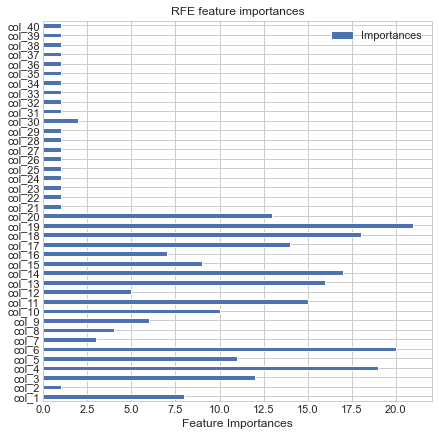

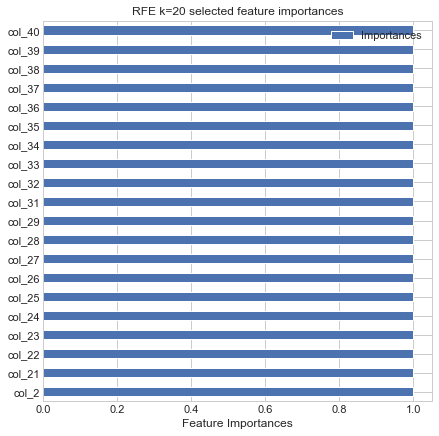

In [52]:
plot_feature_importances(title='RFE feature importances', coefficients=Rfe4.ranking_, index=X_train.columns)

plot_feature_importances(title=f'RFE k={k4} selected feature importances', coefficients=Rfe4.ranking_[Rfe4.get_support(indices=True)], index=selected_rfe)

_RF_

In [42]:
RandomForest = RF(
    n_estimators=100, max_depth=20,
    random_state=42, n_jobs=-1
)

In [43]:
RandomForest.fit(X_train_rfe1, y_train)
y_pred_rfe1 = RandomForest.predict(X_test_rfe1)

RandomForest.fit(X_train_rfe2, y_train)
y_pred_rfe2 = RandomForest.predict(X_test_rfe2)

RandomForest.fit(X_train_rfe3, y_train)
y_pred_rfe3 = RandomForest.predict(X_test_rfe3)

RandomForest.fit(X_train_rfe4, y_train)
y_pred_rfe4 = RandomForest.predict(X_test_rfe4)

RandomForest.fit(X_train_rfe5, y_train)
y_pred_rfe5 = RandomForest.predict(X_test_rfe5)

RandomForest.fit(X_train_rfe6, y_train)
y_pred_rfe6 = RandomForest.predict(X_test_rfe6)

_Feature Importance_

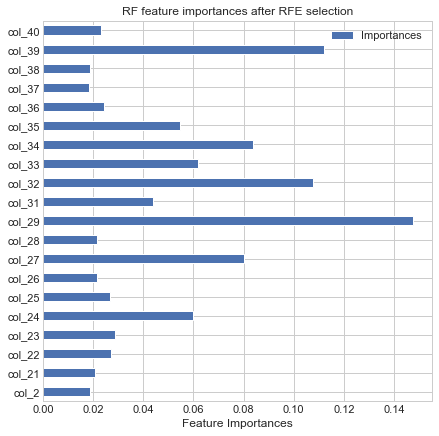

In [58]:
plot_feature_importances(title='RF feature importances after RFE selection', coefficients=RandomForest.feature_importances_, index=selected_rfe)

_CV_

In [27]:
rf_rfe = RF(random_state=42, n_jobs=-1, max_depth=20)

In [28]:
X_rfe1 = Numpy.concatenate((X_train_rfe1, X_test_rfe1), axis=0)
X_rfe2 = Numpy.concatenate((X_train_rfe2, X_test_rfe2), axis=0)
X_rfe3 = Numpy.concatenate((X_train_rfe3, X_test_rfe3), axis=0)
X_rfe4 = Numpy.concatenate((X_train_rfe4, X_test_rfe4), axis=0)
X_rfe5 = Numpy.concatenate((X_train_rfe5, X_test_rfe5), axis=0)
X_rfe6 = Numpy.concatenate((X_train_rfe6, X_test_rfe6), axis=0)

In [29]:
scores_rfe1 = CV(rf_rfe, X=X_rfe1, y=y, cv=cv, scoring=cv_scoring, return_train_score=True, n_jobs=-1, verbose=True)

scores_rfe2 = CV(rf_rfe, X=X_rfe2, y=y, cv=cv, scoring=cv_scoring, return_train_score=True, n_jobs=-1, verbose=True)

scores_rfe3 = CV(rf_rfe, X=X_rfe3, y=y, cv=cv, scoring=cv_scoring, return_train_score=True, n_jobs=-1, verbose=True)

scores_rfe4 = CV(rf_rfe, X=X_rfe4, y=y, cv=cv, scoring=cv_scoring, return_train_score=True, n_jobs=-1, verbose=True)

scores_rfe5 = CV(rf_rfe, X=X_rfe5, y=y, cv=cv, scoring=cv_scoring, return_train_score=True, n_jobs=-1, verbose=True)

scores_rfe6 = CV(rf_rfe, X=X_rfe6, y=y, cv=cv, scoring=cv_scoring, return_train_score=True, n_jobs=-1, verbose=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  7.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  7.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  6.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  5.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  4.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  3.8min finished


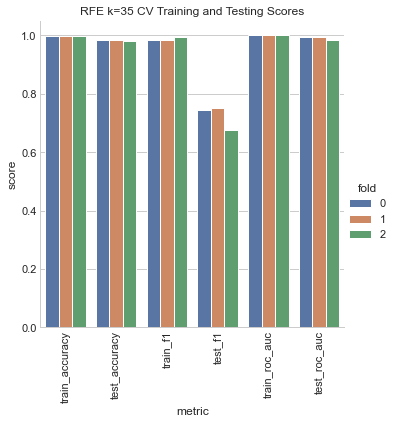

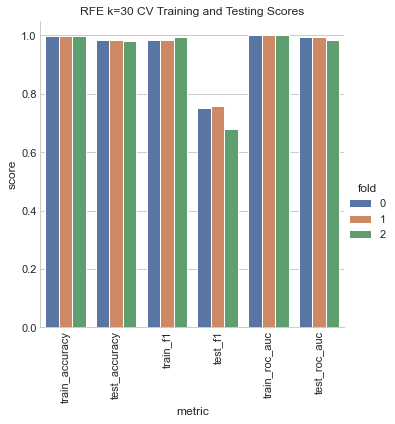

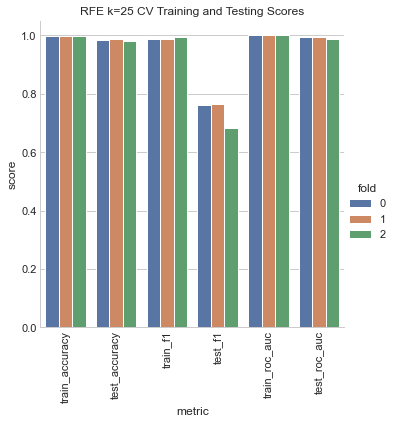

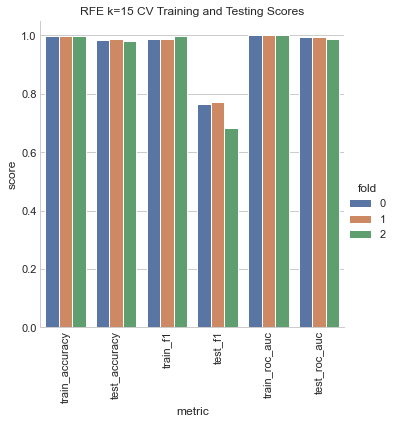

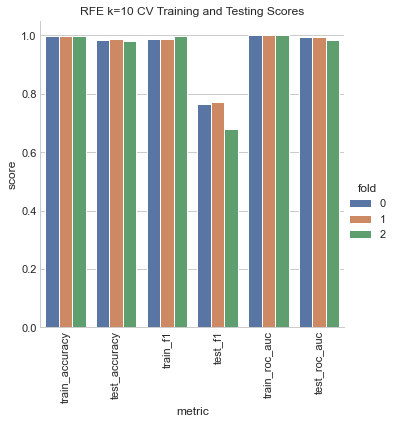

In [30]:
plot_cv('RFE', [scores_rfe1, scores_rfe2, scores_rfe3, scores_rfe4, scores_rfe5, scores_rfe6], [k1, k2, k3, k4, k5, k6])

In [31]:
meanScoresRfe1 = get_cv_performance(X_rfe1, y, True)
meanScoresRfe2 = get_cv_performance(X_rfe2, y, True)
meanScoresRfe3 = get_cv_performance(X_rfe3, y, True)
meanScoresRfe4 = get_cv_performance(X_rfe4, y, True)
meanScoresRfe5 = get_cv_performance(X_rfe5, y, True)
meanScoresRfe6 = get_cv_performance(X_rfe6, y, True)

{'Average F1:0.760', 'Average FPR:0.006', 'Average ROC:0.856'}

{'Average F1:0.768', 'Average FPR:0.006', 'Average ROC:0.862'}

{'Average F1:0.774', 'Average FPR:0.006', 'Average ROC:0.869'}

{'Average F1:0.777', 'Average FPR:0.006', 'Average ROC:0.871'}

{'Average F1:0.773', 'Average FPR:0.006', 'Average ROC:0.870'}

{'Average F1:0.772', 'Average FPR:0.006', 'Average ROC:0.872'}

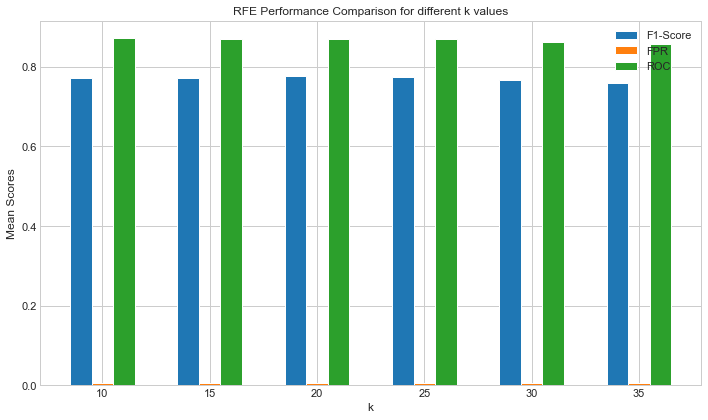

In [63]:
meanScoresRFE = [
    [0.760, 0.006, 0.856], [0.768, 0.006, 0.862], [0.774, 0.006, 0.869],
    [0.777, 0.006, 0.871], [0.773, 0.006, 0.870], [0.772, 0.006, 0.872]
]
x_axis = [k1, k2, k3, k4, k5, k6]

# plot_mean_scores('PCA', meanScores=meanScoresPca, x_axis=x_axis)

# Create a DataFrame with the given structure
data = {
    'k': x_axis,
    'F1-Score': [0.760, 0.768, 0.774, 0.777, 0.773, 0.772],
    'FPR': [0.006, 0.006, 0.006, 0.006, 0.006, 0.006],
    'ROC': [0.856, 0.862, 0.869, 0.871, 0.870, 0.872]
}
df = Pandas.DataFrame(data)

plot_mean_scores2('RFE', df=df, x_axis=x_axis)

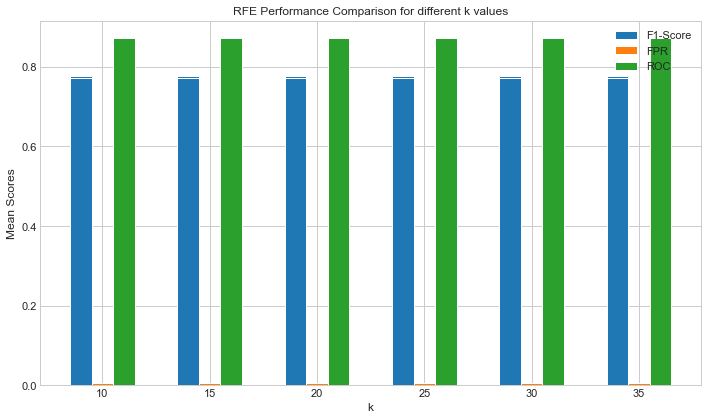

In [13]:
meanScoresRFE = [
    [0.760, 0.006, 0.856], [0.768, 0.006, 0.862], [0.774, 0.006, 0.869],
    [0.777, 0.006, 0.871], [0.773, 0.006, 0.870], [0.772, 0.006, 0.872]
]
x_axis = [k1, k2, k3, k4, k5, k6]

plot_mean_scores('RFE', meanScores=meanScoresRFE, x_axis=x_axis)

_Performance_

In [33]:
# FITNESS 1
fitness1Rfe1 = fitness1(meanScoresRfe1[0], meanScoresRfe1[1], k1/shape[1])
fitness1Rfe2 = fitness1(meanScoresRfe2[0], meanScoresRfe2[1], k2/shape[1])
fitness1Rfe3 = fitness1(meanScoresRfe3[0], meanScoresRfe3[1], k3/shape[1])
fitness1Rfe4 = fitness1(meanScoresRfe4[0], meanScoresRfe4[1], k4/shape[1])
fitness1Rfe5 = fitness1(meanScoresRfe5[0], meanScoresRfe5[1], k5/shape[1])
fitness1Rfe6 = fitness1(meanScoresRfe6[0], meanScoresRfe6[1], k6/shape[1])
display([fitness1Rfe1, fitness1Rfe2, fitness1Rfe3, fitness1Rfe4, fitness1Rfe5, fitness1Rfe6])

[0.7751660619400081,
 0.7874229034087751,
 0.798473519496872,
 0.8067657633435723,
 0.8099931337215459,
 0.8151666619165994]

In [44]:
get_objective('y_pred_rfe', 1, 7)

Objectives


[0.7033037888141506,
 0.7143089334103558,
 0.7199904054582291,
 0.7317667530082997,
 0.7377933907751874,
 0.7383136708282234]


F1


[0.6644206473348574,
 0.6709144542772861,
 0.6702538308574103,
 0.6776878612716764,
 0.6775005722133212,
 0.6700576466598847]


FPR


[0.006308483434962205,
 0.006884536488043386,
 0.007249838424143648,
 0.007495714727288055,
 0.007910191924017197,
 0.008647820833450417]

Metric     Score
0  Accuracy  0.981027
1  F1-score  0.664421
2   ROC_AUC  0.793600

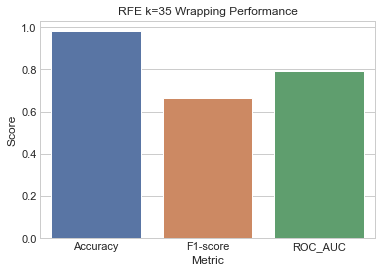

Metric     Score
0  Accuracy  0.981027
1  F1-score  0.670914
2   ROC_AUC  0.802125

Metric     Score
0  Accuracy  0.980823
1  F1-score  0.670254
2   ROC_AUC  0.804307

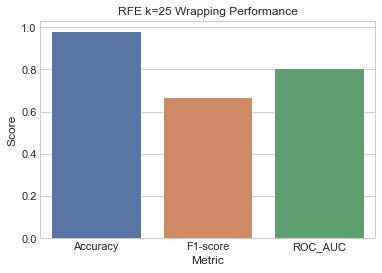

Metric     Score
0  Accuracy  0.981034
1  F1-score  0.677688
2   ROC_AUC  0.811278

Metric     Score
0  Accuracy  0.980830
1  F1-score  0.677501
2   ROC_AUC  0.814188

Metric     Score
0  Accuracy  0.980143
1  F1-score  0.670058
2   ROC_AUC  0.814249

In [13]:
metrics_rfe = [
    evaluate_performance(y_test, y_pred_rfe1), evaluate_performance(y_test, y_pred_rfe2), 
    evaluate_performance(y_test, y_pred_rfe3), evaluate_performance(y_test, y_pred_rfe4), 
    evaluate_performance(y_test, y_pred_rfe5), evaluate_performance(y_test, y_pred_rfe6)
]

k = 35
for metric in metrics_rfe:
    display(metric)
    Seaborn.barplot(data=metric, x='Metric', y='Score')
    PyPlot.title(f'RFE k={k} Wrapping Performance')
    PyPlot.show()

    k -= 5

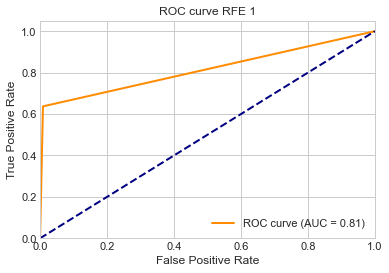

In [20]:
plot_roc_curve(title='RFE', y_test=y_test, y_predict1=y_pred_rfe1)

In [52]:
X_train_curr = X_train_rfe4
profile_model()

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
ERROR: Could not find file C:\Users\IA\AppData\Local\Temp\ipykernel_20536\2684231453.py



Filename: d:\ProgramFiles\Python\Conda\lib\site-packages\memory_profiler.py

Line #    Mem usage    Increment  Occurences   Line Contents
  1140    246.1 MiB    246.1 MiB           1               def wrapper(*args, **kwargs):
  1141    246.1 MiB      0.0 MiB           1                   prof = get_prof()
  1142    293.2 MiB     47.0 MiB           1                   val = prof(func)(*args, **kwargs)
  1143    293.2 MiB      0.0 MiB           1                   show_results_bound(prof)
  1144    293.2 MiB      0.0 MiB           1                   return val

In [22]:
X_train_curr = X_train_rfe4

resultAll = memory_usage((train_model, (), {}))
result_specs_rfe = resultAll[len(resultAll) - 1] - resultAll[0]
display(result_specs_rfe)

ERROR: Could not find file C:\Users\IA\AppData\Local\Temp\ipykernel_11960\2684231453.py


44.34765625

#### _SFS_

In [8]:
RandomForest = RF(
    n_estimators=100, max_depth=20,
    random_state=42, n_jobs=-1
)

In [9]:
Sfs = SFS(estimator=RandomForest, k_features=k1, forward=True, cv=2, verbose=1, n_jobs=-1)
Sfs1 = Sfs.fit(X_train, y_train)

Sfs = SFS(estimator=RandomForest, k_features=k2, forward=True, cv=2, verbose=1, n_jobs=-1)
Sfs2 = Sfs.fit(X_train, y_train)

Sfs = SFS(estimator=RandomForest, k_features=k3, forward=True, cv=2, verbose=1, n_jobs=-1)
Sfs3 = Sfs.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 20.0min finished
Features: 1/35[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed: 15.9min finished
Features: 2/35[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed: 16.4min finished
Features: 3/35[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed: 20.4min finished
Features: 4/35[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 21.0min finished
Features: 5/35[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed: 21.4min finished
Features: 6/35[Parallel(n_jobs=-1)]: Using backe

In [ ]:
Sfs = SFS(estimator=RandomForest, k_features=k4, forward=True, cv=2, verbose=1, n_jobs=-1)
Sfs4 = Sfs.fit(X_train, y_train)

Sfs = SFS(estimator=RandomForest, k_features=k5, forward=True, cv=2, verbose=1, n_jobs=-1)
Sfs5 = Sfs.fit(X_train, y_train)

Sfs = SFS(estimator=RandomForest, k_features=k6, forward=True, cv=2, verbose=1, n_jobs=-1)
Sfs6 = Sfs.fit(X_train, y_train)

In [28]:
# selected_sfs = display_selected_features(Sfs1.feature_names, True)
Sfs1.subsets_

{1: {'feature_idx': (38,),
  'cv_scores': array([0.97549271, 0.97626239]),
  'avg_score': 0.9758775510204082,
  'feature_names': ('col_39',)},
 2: {'feature_idx': (23, 38),
  'cv_scores': array([0.97938192, 0.9795277 ]),
  'avg_score': 0.9794548104956269,
  'feature_names': ('col_24', 'col_39')},
 3: {'feature_idx': (23, 33, 38),
  'cv_scores': array([0.98134694, 0.98218076]),
  'avg_score': 0.9817638483965014,
  'feature_names': ('col_24', 'col_34', 'col_39')},
 4: {'feature_idx': (23, 28, 33, 38),
  'cv_scores': array([0.98404082, 0.98410496]),
  'avg_score': 0.9840728862973761,
  'feature_names': ('col_24', 'col_29', 'col_34', 'col_39')},
 5: {'feature_idx': (22, 23, 28, 33, 38),
  'cv_scores': array([0.98512536, 0.98548688]),
  'avg_score': 0.9853061224489796,
  'feature_names': ('col_23', 'col_24', 'col_29', 'col_34', 'col_39')},
 6: {'feature_idx': (22, 23, 28, 33, 36, 38),
  'cv_scores': array([0.98585423, 0.98573761]),
  'avg_score': 0.985795918367347,
  'feature_names': ('col_

In [35]:
sfs1_feature_importances = [[Sfs1.subsets_[clf]['feature_names'], Sfs1.subsets_[clf]['avg_score']] for clf in Sfs1.subsets_]

In [41]:
# sfs1_feature_importances

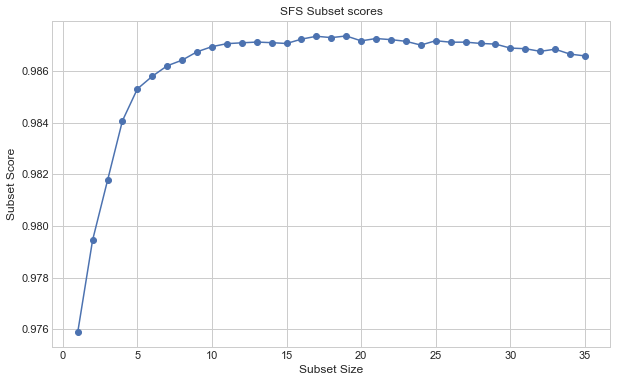

In [43]:
subset_sizes = [len(subset[0]) for subset in sfs1_feature_importances]
subset_scores = [subset[1] for subset in sfs1_feature_importances]

PyPlot.figure(figsize=(10, 6))
PyPlot.plot(subset_sizes, subset_scores, marker='o', linestyle='-', color='b')
PyPlot.xlabel('Subset Size')
PyPlot.ylabel('Subset Score')
PyPlot.title('SFS Subset scores')
PyPlot.grid(True)
PyPlot.show()

In [14]:
X_train_sfs1 = Sfs1.transform(X_train)
X_test_sfs1 = Sfs1.transform(X_test)

# X_train_sfs2 = Sfs2.transform(X_train)
# X_test_sfs2 = Sfs2.transform(X_test)

# X_train_sfs3 = Sfs3.transform(X_train)
# X_test_sfs3 = Sfs3.transform(X_test)

# X_train_sfs4 = Sfs4.transform(X_train)
# X_test_sfs4 = Sfs4.transform(X_test)

# X_train_sfs5 = Sfs5.transform(X_train)
# X_test_sfs5 = Sfs5.transform(X_test)

# X_train_sfs6 = Sfs6.transform(X_train)
# X_test_sfs6 = Sfs6.transform(X_test)

In [16]:
RandomForest = RF(
    n_estimators=100, max_depth=20,
    random_state=42, n_jobs=-1
)

In [17]:
RandomForest.fit(X_train_sfs1, y_train)
y_pred_sfs1 = RandomForest.predict(X_test_sfs1)

# RandomForest.fit(X_train_sfs2, y_train)
# y_pred_sfs2 = RandomForest.predict(X_test_sfs2)

# RandomForest.fit(X_train_sfs3, y_train)
# y_pred_sfs3 = RandomForest.predict(X_test_sfs3)

# RandomForest.fit(X_train_sfs4, y_train)
# y_pred_sfs4 = RandomForest.predict(X_test_sfs4)

# RandomForest.fit(X_train_sfs5, y_train)
# y_pred_sfs5 = RandomForest.predict(X_test_sfs5)

# RandomForest.fit(X_train_sfs6, y_train)
# y_pred_sfs6 = RandomForest.predict(X_test_sfs6)

Metric     Score
0  Accuracy  0.980966
1  F1-score  0.665151
2   ROC_AUC  0.795440

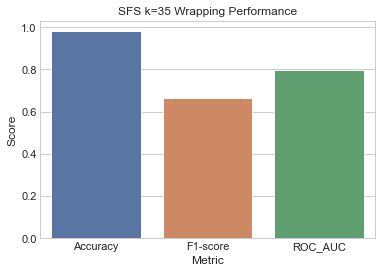

In [18]:
metrics_sfs = [
    evaluate_performance(y_test, y_pred_sfs1), 
    # evaluate_performance(y_test, y_pred_sfs2),
    # evaluate_performance(y_test, y_pred_sfs3), evaluate_performance(y_test, y_pred_sfs4),
    # evaluate_performance(y_test, y_pred_sfs5), evaluate_performance(y_test, y_pred_sfs6)
]

k = 35
for metric in metrics_sfs:
    display(metric)
    Seaborn.barplot(data=metric, x='Metric', y='Score')
    PyPlot.title(f'SFS k={k} Wrapping Performance')
    PyPlot.show()

    k -= 5


# plot_roc_curve(title='SFS', y_test=y_test, y_predict1=y_pred_sfs1)

#### _GA_

In [8]:
RandomForest = RF(
    n_estimators=100, max_depth=20,
    random_state=42, n_jobs=-1
)

In [11]:
Ga1 = GA(estimator=RandomForest, threshold=-Numpy.inf)
Ga1.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(max_depth=20, n_jobs=-1,
                                                 random_state=42),
                threshold=-inf)

In [16]:
selected_indices = Ga1.get_support(indices=True)

selected_features = X_train[:, selected_indices]

InvalidIndexError: (slice(None, None, None), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39], dtype=int64))

In [12]:
X_train_ga1 = Ga1.transform(X_train)
X_test_ga1 = Ga1.transform(X_test)

In [14]:
rf_ga1 = RF()
rf_ga1.fit(X_train_ga1, y_train)

RandomForestClassifier()

In [17]:
y_pred_ga1 = rf_ga1.predict(X_test_ga1)

metrics_ga = [evaluate_performance(y_test, y_pred_ga1)]
for metric in metrics_ga:
    display(metric)
    Seaborn.barplot(data=metric, x='Metric', y='Score')
    PyPlot.title('GA Wrapping Performance')
    PyPlot.show()


plot_roc_curve(title='GA', y_test=y_test, y_predict1=y_pred_ga1)

Metric     Score
0  Accuracy  0.981095
1  F1-score  0.667066
2   ROC_AUC  0.796026

#### _GA-2_

In [10]:
RandomForest = RF(
    n_estimators=100, max_depth=20,
    random_state=42, n_jobs=-1
)

In [11]:
params = {
    'cv': 2,
    'scoring': 'f1',
    'n_population': 20,
    'n_generations': 5,
    'tournament_size': 3,
    'n_gen_no_change': 3,
    'caching': False,
    'n_jobs': -1,
    'verbose': 1
}

In [76]:
GAS = GeneticSelectionCV(RandomForest, max_features=k3, **params)

In [12]:
GAS = GeneticSelectionCV(RandomForest, max_features=k3, **params)
Gas3 = GAS.fit(X_train, y_train)

Selecting features with genetic algorithm.
gen	nevals	avg                               	std                            	min          	max                               
0  	20    	[  0.524638  11.1        0.001667]	[ 0.254534  8.745856  0.001768]	[ 0.  1.  0.]	[  0.783382  25.         0.007483]
1  	9     	[  0.714194  18.35       0.001392]	[ 0.047889  6.158531  0.001042]	[ 0.596638  4.        0.000135]	[  0.783382  25.         0.004003]
2  	13    	[-499.286026   21.6       500.001389]	[ 2179.613269     1.959592  2179.449153]	[-10000.           18.            0.000135]	[     0.783382     26.        10000.      ]
3  	15    	[  0.768476  21.75       0.001364]   	[ 0.019178  1.669581  0.000826]         	[  0.707345  19.         0.000135]         	[  0.783382  25.         0.003372]         


In [15]:
GAS = GeneticSelectionCV(RandomForest, max_features=k1, **params)
Gas1 = GAS.fit(X_train, y_train)

GAS = GeneticSelectionCV(RandomForest, max_features=k2, **params)
Gas2 = GAS.fit(X_train, y_train)

GAS = GeneticSelectionCV(RandomForest, max_features=k3, **params)
Gas3 = GAS.fit(X_train, y_train)

GAS = GeneticSelectionCV(RandomForest, max_features=k4, **params)
Gas4 = GAS.fit(X_train, y_train)

GAS = GeneticSelectionCV(RandomForest, max_features=k5, **params)
Gas5 = GAS.fit(X_train, y_train)

GAS = GeneticSelectionCV(RandomForest, max_features=k6, **params)
Gas6 = GAS.fit(X_train, y_train)

Selecting features with genetic algorithm.
gen	nevals	avg                               	std                            	min                            	max                               
0  	20    	[  0.632795  14.75       0.00235 ]	[ 0.164728  8.13557   0.001466]	[ 0.01553   1.        0.000204]	[  0.780715  30.         0.006302]
1  	9     	[  0.739382  20.7        0.001928]	[ 0.041732  7.603289  0.001642]	[ 0.662496  7.        0.000255]	[  0.780715  29.         0.007636]
2  	14    	[  0.76855   25.65       0.001717]	[ 0.019922  4.788267  0.000988]	[  0.712296  14.         0.000432]	[  0.782691  30.         0.003644]
3  	14    	[  0.779805  28.3        0.001237]	[ 0.006101  0.9       0.000526]	[  0.755504  26.         0.000538]	[  0.785507  29.         0.00261 ]
4  	10    	[-499.256228   27.7       500.001449]	[ 2179.620105     1.345362  2179.449139]	[-10000.           26.            0.000841]	[     0.785507     31.        10000.      ]
5  	10    	[  0.783364  26.45       0.001982]   

In [16]:
print(Gas1.support_)
print(Gas2.support_)
print(Gas3.support_)
print(Gas4.support_)
print(Gas5.support_)
print(Gas6.support_)

[False False False  True False False  True  True False  True  True False
  True  True False  True  True False  True  True  True  True  True  True
 False False False  True  True  True  True False  True  True  True False
 False  True  True  True]
[False False False  True  True False  True False  True False  True False
  True  True False False  True False  True  True  True False  True  True
  True  True  True  True  True False  True False  True  True  True  True
  True  True  True False]
[ True  True  True False False False  True  True False False  True False
 False False  True False False  True False  True False  True  True False
  True  True False  True  True  True  True  True  True  True  True False
  True  True  True  True]
[False  True False False  True False  True False  True False False  True
 False False False False False False  True False False  True  True False
  True False  True False  True False  True  True False  True False  True
 False  True  True False]
[False False False  

In [18]:
X_train_gas1 = Gas1.fit_transform(X_train, y_train)
X_test_gas1 = Gas1.transform(X_test)

X_train_gas2 = Gas2.fit_transform(X_train, y_train)
X_test_gas2 = Gas2.transform(X_test)

X_train_gas3 = Gas3.fit_transform(X_train, y_train)
X_test_gas3 = Gas3.transform(X_test)

X_train_gas4 = Gas4.fit_transform(X_train, y_train)
X_test_gas4 = Gas4.transform(X_test)

X_train_gas5 = Gas5.fit_transform(X_train, y_train)
X_test_gas5 = Gas5.transform(X_test)

X_train_gas6 = Gas6.fit_transform(X_train, y_train)
X_test_gas6 = Gas6.transform(X_test)

Selecting features with genetic algorithm.
gen	nevals	avg                               	std                            	min                            	max                               
0  	20    	[  0.586371  15.1        0.001548]	[ 0.227143  9.736016  0.001476]	[ 0.004211  2.        0.00016 ]	[  0.771861  34.         0.005336]
1  	9     	[  0.736506  23.65       0.001967]	[ 0.050291  7.976685  0.00167 ]	[ 0.583129  5.        0.000129]	[  0.775526  34.         0.005336]
2  	10    	[  0.764154  27.9        0.000949]	[ 0.013542  3.160696  0.000404]	[  0.733254  19.         0.000182]	[  0.775526  34.         0.001772]
3  	9     	[  0.77028   29.5        0.000999]	[ 0.00819   1.5       0.000734]	[  0.735808  28.         0.000058]	[  0.775526  34.         0.003611]
4  	16    	[  0.772656  29.75       0.000687]	[ 0.004351  2.141845  0.000383]	[  0.76085   25.         0.000196]	[  0.779476  34.         0.001622]
5  	10    	[  0.77618   29.4        0.000649]	[ 0.002622  1.280625  0.000436]	

d:\ProgramFiles\Python\Conda\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but GeneticSelectionCV was fitted without feature names
  warnings.warn(
d:\ProgramFiles\Python\Conda\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but GeneticSelectionCV was fitted without feature names
  warnings.warn(


Selecting features with genetic algorithm.
gen	nevals	avg                               	std                            	min                            	max                               
0  	20    	[  0.605599  14.75       0.002176]	[ 0.215891  8.055278  0.001885]	[ 0.000734  1.        0.000226]	[  0.774913  29.         0.00751 ]
1  	12    	[  0.741314  21.95       0.001418]	[ 0.031879  4.984727  0.001006]	[  0.636647  11.         0.000017]	[  0.774913  29.         0.003477]
2  	12    	[  0.764545  25.2        0.001383]	[ 0.015449  4.853864  0.00087 ]	[  0.731702  16.         0.000039]	[  0.774913  29.         0.003477]
3  	14    	[  0.774478  28.5        0.000878]	[ 0.0022    1.962142  0.000227]	[  0.76496   20.         0.000157]	[  0.77616   29.         0.000954]
4  	7     	[  0.774944  28.6        0.000748]	[ 0.00168   0.583095  0.000335]	[  0.768045  27.         0.000239]	[  0.77616   29.         0.001125]
5  	8     	[  0.775691  28.15       0.00036 ]	[ 0.001125  0.726292  0.00030

d:\ProgramFiles\Python\Conda\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but GeneticSelectionCV was fitted without feature names
  warnings.warn(
d:\ProgramFiles\Python\Conda\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but GeneticSelectionCV was fitted without feature names
  warnings.warn(


Selecting features with genetic algorithm.
gen	nevals	avg                               	std                            	min                            	max                               
0  	20    	[  0.626121  14.45       0.001431]	[ 0.213603  7.546357  0.001199]	[ 0.000362  1.        0.      ]	[  0.765557  24.         0.004346]
1  	15    	[  0.733502  19.9        0.001389]	[ 0.029973  4.437342  0.001368]	[  0.646431  10.         0.000026]	[  0.767936  24.         0.005503]
2  	11    	[-499.283101   22.75      500.001095]	[ 2179.61394      2.046338  2179.44922 ]	[-10000.           19.            0.000029]	[     0.77212     26.       10000.     ]
3  	13    	[-499.274778   22.75      500.001542]	[ 2179.615849     1.813146  2179.449118]	[-10000.           20.            0.000412]	[     0.772444     26.        10000.      ]
4  	11    	[-499.272563   22.8       500.001538]	[ 2179.616357     1.886796  2179.449119]	[-10000.           20.            0.000087]	[     0.772444     26.        10

d:\ProgramFiles\Python\Conda\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but GeneticSelectionCV was fitted without feature names
  warnings.warn(
d:\ProgramFiles\Python\Conda\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but GeneticSelectionCV was fitted without feature names
  warnings.warn(


Selecting features with genetic algorithm.
gen	nevals	avg                               	std                            	min                            	max                               
0  	20    	[  0.592614  10.85       0.001807]	[ 0.144559  5.659284  0.001837]	[ 0.202291  1.        0.000078]	[  0.747708  20.         0.006945]
1  	9     	[  0.712418  16.6        0.001671]	[ 0.04148   3.023243  0.002172]	[  0.616385  12.         0.000078]	[  0.753205  20.         0.006945]
2  	10    	[  0.739776  18.3        0.002118]	[ 0.021153  2.238303  0.001559]	[  0.682435  12.         0.000183]	[  0.754513  20.         0.006945]
3  	10    	[  0.750023  18.65       0.001799]	[ 0.006323  1.681517  0.001063]	[  0.726583  12.         0.000042]	[  0.754513  20.         0.002657]
4  	7     	[-499.285      19.05      500.002301]	[ 2179.613504     0.973396  2179.448944]	[-10000.           18.            0.000182]	[     0.754513     23.        10000.      ]
5  	15    	[-499.28593    18.9       500.0021

d:\ProgramFiles\Python\Conda\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but GeneticSelectionCV was fitted without feature names
  warnings.warn(
d:\ProgramFiles\Python\Conda\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but GeneticSelectionCV was fitted without feature names
  warnings.warn(


Selecting features with genetic algorithm.
gen	nevals	avg                            	std                            	min                            	max                               
0  	20    	[ 0.464679  8.1       0.001422]	[ 0.251101  4.334743  0.001776]	[ 0.000184  2.        0.      ]	[  0.738794  15.         0.007711]
1  	6     	[  0.655975  10.         0.001439]	[ 0.056008  2.645751  0.001104]	[ 0.557735  4.        0.000119]	[  0.738794  15.         0.00354 ]
2  	11    	[  0.708622  10.05       0.001597]	[ 0.036105  2.10891   0.001111]	[ 0.630584  7.        0.000246]	[  0.742374  15.         0.004626]
3  	16    	[  0.734803  10.3        0.002111]	[ 0.014393  1.584298  0.001095]	[ 0.692889  9.        0.000428]	[  0.746947  14.         0.004381]
4  	15    	[  0.740071  10.15       0.002106]	[ 0.016733  1.235921  0.001142]	[ 0.675342  9.        0.000428]	[  0.76515   14.         0.004371]
5  	15    	[  0.750077  10.8        0.002497]	[ 0.008643  1.469694  0.001251]	[ 0.737579  9. 

d:\ProgramFiles\Python\Conda\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but GeneticSelectionCV was fitted without feature names
  warnings.warn(
d:\ProgramFiles\Python\Conda\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but GeneticSelectionCV was fitted without feature names
  warnings.warn(


Selecting features with genetic algorithm.
gen	nevals	avg                            	std                            	min          	max                            
0  	20    	[ 0.404605  4.15      0.002217]	[ 0.24148   2.495496  0.002114]	[ 0.  1.  0.]	[ 0.699349  9.        0.006794]
1  	8     	[ 0.525184  5.5       0.003168]	[ 0.170107  2.519921  0.002037]	[ 0.03701   1.        0.000053]	[ 0.699349  9.        0.006788]
2  	13    	[-999.418896    7.25     1000.003485]	[ 3000.193702     2.363789  2999.998838]	[-10000.            3.            0.000102]	[     0.721215     11.        10000.      ]
3  	5     	[-999.371509    8.6      1000.003665]	[ 3000.209497     1.067708  2999.998778]	[-10000.            8.            0.001946]	[     0.721215     12.        10000.      ]
4  	10    	[-999.364983    8.65     1000.003819]	[ 3000.211672     1.107926  2999.998727]	[-10000.            8.            0.000841]	[     0.722096     12.        10000.      ]
5  	11    	[ 0.714689  8.7       0.002945]

d:\ProgramFiles\Python\Conda\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but GeneticSelectionCV was fitted without feature names
  warnings.warn(
d:\ProgramFiles\Python\Conda\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but GeneticSelectionCV was fitted without feature names
  warnings.warn(


In [26]:
Gas3 = GAS.fit(X, y)

Selecting features with genetic algorithm.
gen	nevals	avg                               	std                            	min                            	max                               
0  	20    	[  0.493851  11.1        0.01436 ]	[ 0.237227  8.745856  0.02266 ]	[ 0.000129  1.        0.000129]	[  0.730469  25.         0.104034]
1  	9     	[  0.663631  18.25       0.007768]	[ 0.049756  5.915023  0.006193]	[ 0.539912  6.        0.000864]	[  0.730469  25.         0.029951]
2  	13    	[-499.337775   21.8       500.006511]	[ 2179.601397     2.135416  2179.447978]	[-10000.           18.            0.000282]	[     0.730469     26.        10000.      ]
3  	15    	[  0.712541  21.75       0.009474]   	[ 0.017425  2.046338  0.003375]         	[  0.669971  17.         0.001951]         	[  0.730469  25.         0.014666]         


In [78]:
X_train_gas3 = Gas3.fit_transform(X_train, y_train)
X_test_gas3 = Gas3.transform(X_test)

Selecting features with genetic algorithm.
gen	nevals	avg                               	std                            	min                         	max                               
0  	20    	[  0.646576  12.9        0.002346]	[ 0.103456  7.408779  0.001398]	[ 0.3858   1.       0.00017]	[  0.763228  25.         0.005605]
1  	18    	[  0.716024  15.85       0.001603]	[ 0.050091  5.284648  0.001621]	[ 0.606585  5.        0.000017]	[  0.77809   25.         0.006082]
2  	9     	[  0.755715  17.8        0.001003]	[ 0.013586  4.34281   0.000714]	[  0.710996  11.         0.000068]	[  0.77809   25.         0.003601]
3  	14    	[-499.276101   19.95      500.001346]	[ 2179.615546     4.576844  2179.449163]	[-10000.           13.            0.000196]	[     0.778132     26.        10000.      ]
4  	14    	[-499.272491   22.5       500.001401]	[ 2179.616374     2.941088  2179.44915 ]	[-10000.          14.           0.00015]   	[     0.778132     26.        10000.      ]
5  	10    	[-499.26667  

d:\ProgramFiles\Python\Conda\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but GeneticSelectionCV was fitted without feature names
  warnings.warn(
d:\ProgramFiles\Python\Conda\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but GeneticSelectionCV was fitted without feature names
  warnings.warn(


In [13]:
X_train_gas3 = Gas3.transform(X_train)
X_test_gas3 = Gas3.transform(X_test)

d:\ProgramFiles\Python\Conda\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but GeneticSelectionCV was fitted without feature names
  warnings.warn(
d:\ProgramFiles\Python\Conda\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but GeneticSelectionCV was fitted without feature names
  warnings.warn(


In [ ]:
Numpy.save('./Output/GNN/X_train_gas3', X_train_gas3)
Numpy.save('./Output/GNN/X_test_gas3', X_test_gas3)

In [21]:
ga3Support = [ True,  True,  True, False, False, False,  True,  True, False, False,  True, False,
 False, False,  True, False, False,  True, False,  True, False,  True,  True, False,
  True,  True, False,  True,  True,  True,  True,  True,  True,  True,  True, False,
  True,  True,  True,  True]
selected_ga = display_selected_features(ga3Support, True)

Selected Features: ['col_1', 'col_2', 'col_3', 'col_7', 'col_8', 'col_11', 'col_15', 'col_18', 'col_20', 'col_22', 'col_23', 'col_25', 'col_26', 'col_28', 'col_29', 'col_30', 'col_31', 'col_32', 'col_33', 'col_34', 'col_35', 'col_37', 'col_38', 'col_39', 'col_40']


In [ ]:
gas3X = ['col_1', 'col_2', 'col_3', 'col_7', 'col_8', 'col_11', 'col_15', 'col_18', 'col_20', 'col_22', 'col_23', 'col_25', 'col_26', 'col_28', 'col_29', 'col_30', 'col_31', 'col_32', 'col_33', 'col_34', 'col_35', 'col_37', 'col_38', 'col_39', 'col_40']
X_train_ga3 = X_train

In [28]:
RandomForest.fit(X_train_gas3, y_train)

RandomForestClassifier(max_depth=20, n_jobs=-1, random_state=42)

_CV_

In [19]:
rf_ga = RF(random_state=42, n_jobs=-1, max_depth=20)

In [22]:
X_gas1 = Numpy.concatenate((X_train_gas1, X_test_gas1), axis=0)
X_gas2 = Numpy.concatenate((X_train_gas2, X_test_gas2), axis=0)
X_gas3 = Numpy.concatenate((X_train_gas3, X_test_gas3), axis=0)
X_gas4 = Numpy.concatenate((X_train_gas4, X_test_gas4), axis=0)
X_gas5 = Numpy.concatenate((X_train_gas5, X_test_gas5), axis=0)
X_gas6 = Numpy.concatenate((X_train_gas6, X_test_gas6), axis=0)

In [23]:
scores_gas1 = CV(rf_ga, X=X_gas1, y=y, cv=cv, scoring=cv_scoring, return_train_score=True, n_jobs=-1)

scores_gas2 = CV(rf_ga, X=X_gas2, y=y, cv=cv, scoring=cv_scoring, return_train_score=True, n_jobs=-1)

scores_gas3 = CV(rf_ga, X=X_gas3, y=y, cv=cv, scoring=cv_scoring, return_train_score=True, n_jobs=-1)

scores_gas4 = CV(rf_ga, X=X_gas4, y=y, cv=cv, scoring=cv_scoring, return_train_score=True, n_jobs=-1)

scores_gas5 = CV(rf_ga, X=X_gas5, y=y, cv=cv, scoring=cv_scoring, return_train_score=True, n_jobs=-1)

scores_gas6 = CV(rf_ga, X=X_gas6, y=y, cv=cv, scoring=cv_scoring, return_train_score=True, n_jobs=-1)

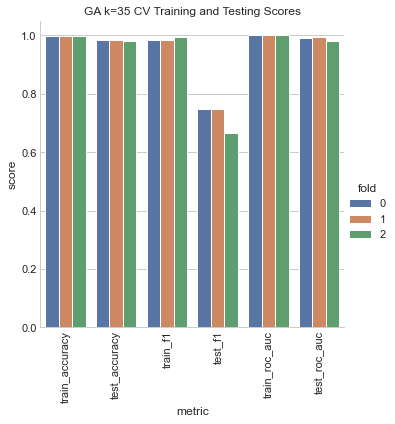

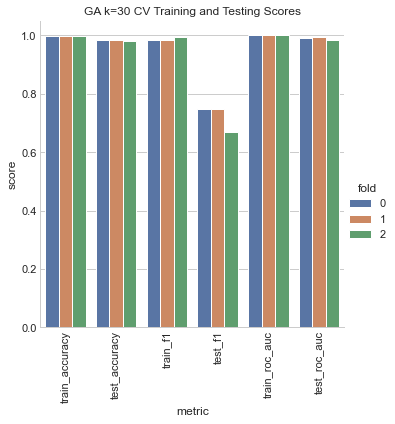

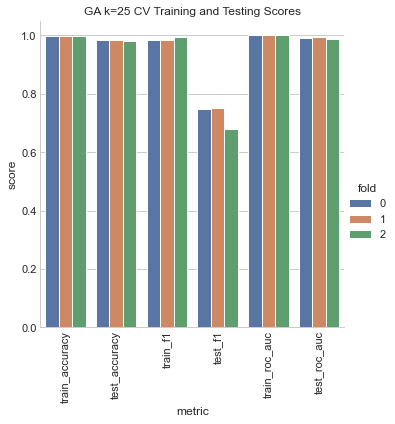

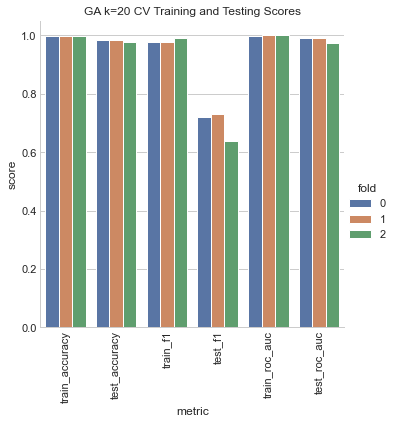

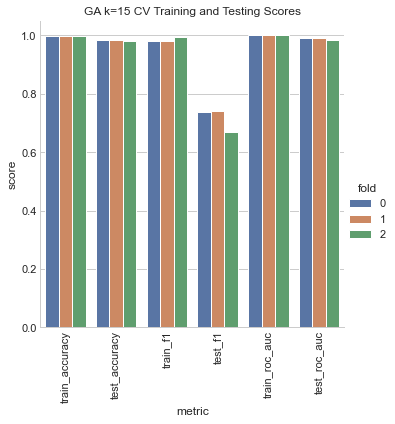

In [25]:
plot_cv('GA', [scores_gas1, scores_gas2, scores_gas3, scores_gas4, scores_gas5, scores_gas6], [k1, k2, k3, k4, k5, k6])

In [26]:
meanScoresGas1 = get_cv_performance(X_gas1, y, True)
meanScoresGas2 = get_cv_performance(X_gas2, y, True)
meanScoresGas3 = get_cv_performance(X_gas3, y, True)
meanScoresGas4 = get_cv_performance(X_gas4, y, True)
meanScoresGas5 = get_cv_performance(X_gas5, y, True)
meanScoresGas6 = get_cv_performance(X_gas6, y, True)

{'Average F1:0.759', 'Average FPR:0.006', 'Average ROC:0.855'}

{'Average F1:0.759', 'Average FPR:0.006', 'Average ROC:0.858'}

{'Average F1:0.762', 'Average FPR:0.006', 'Average ROC:0.860'}

{'Average F1:0.744', 'Average FPR:0.006', 'Average ROC:0.845'}

{'Average F1:0.751', 'Average FPR:0.007', 'Average ROC:0.858'}

{'Average F1:0.689', 'Average FPR:0.005', 'Average ROC:0.800'}

In [64]:
meanScoresGA = [
    [0.759, 0.006, 0.855], [0.759, 0.006, 0.858], [0.762, 0.006, 0.860],
    [0.744, 0.006, 0.845], [0.751, 0.007, 0.858], [0.689, 0.005, 0.800]
]
x_axis = [k1, k2, k3, k4, k5, k6]

# plot_mean_scores('PCA', meanScores=meanScoresPca, x_axis=x_axis)

# Create a DataFrame with the given structure
data = {
    'k': x_axis,
    'F1-Score': [0.759, 0.759, 0.762, 0.744, 0.751, 0.689],
    'FPR': [0.006, 0.006, 0.006, 0.006, 0.007, 0.005],
    'ROC': [0.855, 0.858, 0.860, 0.845, 0.858, 0.800]
}
df = Pandas.DataFrame(data)

plot_mean_scores2('GA', df=df, x_axis=x_axis)

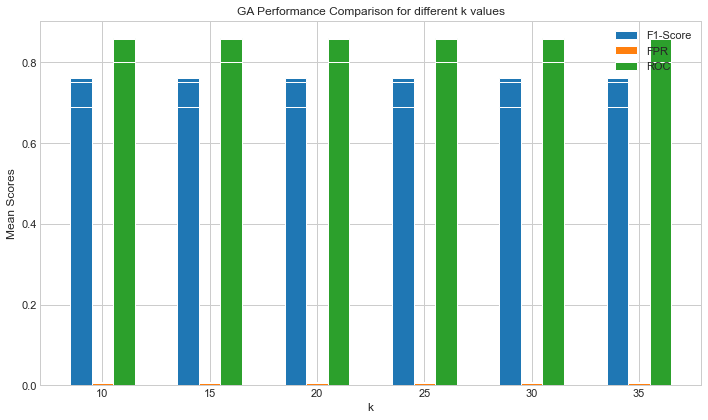

In [14]:
meanScoresIG = [
    [0.759, 0.006, 0.855], [0.759, 0.006, 0.858], [0.762, 0.006, 0.860],
    [0.744, 0.006, 0.845], [0.751, 0.007, 0.858], [0.689, 0.005, 0.800]
]
x_axis = [k1, k2, k3, k4, k5, k6]

plot_mean_scores('GA', meanScores=meanScoresIG, x_axis=x_axis)

_Performance_

In [27]:
fitness1Gas1 = fitness1(meanScoresGas1[0], meanScoresGas1[1], k1/shape[1])
fitness1Gas2 = fitness1(meanScoresGas2[0], meanScoresGas2[1], k2/shape[1])
fitness1Gas3 = fitness1(meanScoresGas3[0], meanScoresGas3[1], k3/shape[1])
fitness1Gas4 = fitness1(meanScoresGas4[0], meanScoresGas4[1], k4/shape[1])
fitness1Gas5 = fitness1(meanScoresGas5[0], meanScoresGas5[1], k5/shape[1])
fitness1Gas6 = fitness1(meanScoresGas6[0], meanScoresGas6[1], k6/shape[1])
display([fitness1Gas1, fitness1Gas2, fitness1Gas3, fitness1Gas4, fitness1Gas5, fitness1Gas6])

[0.7741407134113768,
 0.7803250206819552,
 0.7889700839923293,
 0.7819912567231476,
 0.792972395271663,
 0.7531179861205273]

In [80]:
X_train_curr = X_train_gas3

resultAll = memory_usage((train_model, (), {}))
result_specs_ga = resultAll[len(resultAll) - 1] - resultAll[0]
display(result_specs_ga)

ERROR: Could not find file C:\Users\IA\AppData\Local\Temp\ipykernel_25780\1981354134.py


42.34375

#### _LASSO_

In [71]:
lasso = Lasso(alpha=0.1)

NameError: name 'Lasso' is not defined

In [43]:
lasso1 = SFM(lasso, max_features=k1)

X_train_lasso1 = lasso1.fit_transform(X_train, y_train)
X_test_lasso1 = lasso1.transform(X_test)

In [45]:
selected_lasso = display_selected_features(lasso1.get_support(), True)

Selected Features: ['col_33']


In [ ]:
plot_feature_importances(title='LASSO feature importances', coefficients=lasso1., index=X_train.columns)

plot_feature_importances(title='ANOVA selected feature importances', coefficients=anovaImportances[anovaFilter2.get_support(indices=True)], index=selected_anova)

_RF_

In [46]:
rfLasso1 = RF(random_state=42, n_jobs=-1, max_depth=20)

rfLasso1.fit(X_train_lasso1, y_train)
y_pred_lasso1 = rfLasso1.predict(X_test_lasso1)

_Performance_

Metric     Score
0  Accuracy  0.974469
1  F1-score  0.575788
2   ROC_AUC  0.767965

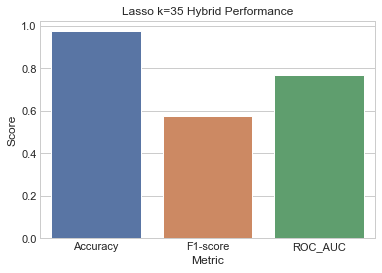

In [38]:
metrics_lasso = [
    evaluate_performance(y_test, y_pred_lasso1),
]

k = 35
for metric in metrics_lasso:    
    display(metric)
    Seaborn.barplot(data=metric, x='Metric', y='Score')
    PyPlot.title(f'Lasso k={k} Hybrid Performance')
    PyPlot.show()

    k -= 5

#### _LASSOCV_

In [72]:
lassoSkf = SKF(n_splits=3, shuffle=True, random_state=0)
lasso = LassoCV(cv=lassoSkf, random_state=42, n_jobs=-1, verbose=1).fit(X, y)
print('Selected Features:', list(X.columns[Numpy.where(lasso.coef_!=0)[0]]))
selectedLassoCV = list(X.columns[Numpy.where(lasso.coef_!=0)[0]])

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
............................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.0s finished


Selected Features: ['col_2', 'col_5', 'col_8', 'col_10', 'col_19', 'col_21', 'col_22', 'col_23', 'col_25', 'col_26', 'col_27', 'col_28', 'col_29', 'col_30', 'col_31', 'col_32', 'col_33', 'col_34', 'col_35', 'col_36', 'col_37', 'col_39', 'col_40']


In [27]:
display(selectedLassoCV)

['col_2',
 'col_5',
 'col_8',
 'col_10',
 'col_19',
 'col_21',
 'col_22',
 'col_23',
 'col_25',
 'col_26',
 'col_27',
 'col_28',
 'col_29',
 'col_30',
 'col_31',
 'col_32',
 'col_33',
 'col_34',
 'col_35',
 'col_36',
 'col_37',
 'col_39',
 'col_40']

In [73]:
X_lasso = X[selectedLassoCV]
X_train_lasso = X_train[selectedLassoCV]
X_test_lasso = X_test[selectedLassoCV]
X_lasso.shape

(490000, 23)

In [15]:
rf_lasso = RF(random_state=42, n_jobs=-1, max_depth=20)
rf_lasso.fit(X_train_lasso, y_train)

RandomForestClassifier(max_depth=20, n_jobs=-1, random_state=42)

Metric     Score
0  Accuracy  0.980129
1  F1-score  0.661490
2   ROC_AUC  0.802805

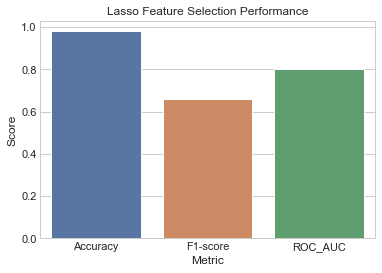

In [16]:
y_pred_lasso = rf_lasso.predict(X_test_lasso)

metrics_lasso = [evaluate_performance(y_test, y_pred_lasso), ]

for metric in metrics_lasso:
    display(metric)
    Seaborn.barplot(data=metric, x='Metric', y='Score')
    PyPlot.title('Lasso Feature Selection Performance')
    PyPlot.show()

_CV_

In [20]:
rf_lasso = RF(random_state=42, n_jobs=-1, max_depth=20)

In [29]:
scores_lasso1 = CV(rf_lasso, X=X_lasso, y=y, cv=cv, scoring=cv_scoring, return_train_score=True, n_jobs=-1)

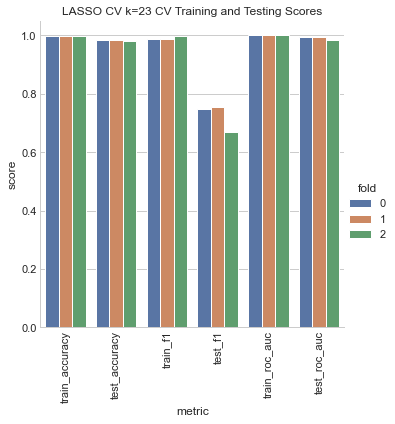

In [30]:
plot_cv('LASSO CV', [scores_lasso1], [len(selectedLassoCV)])

In [32]:
meanScoresLasso1 = get_cv_performance(X_lasso, y, False)

{'Average F1:0.765', 'Average FPR:0.006', 'Average ROC:0.866'}

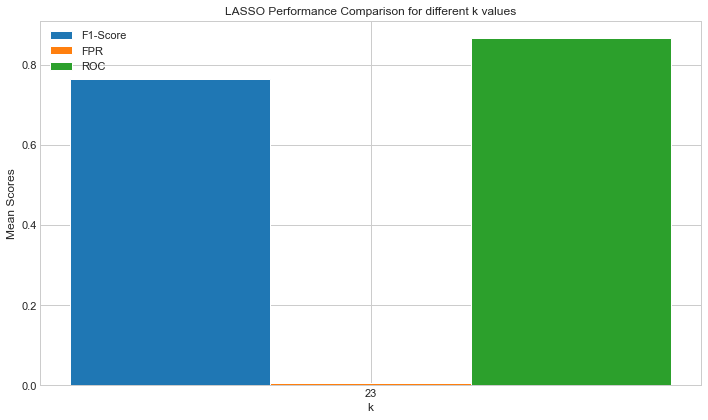

In [15]:
meanScoresLasso = [
    [0.765, 0.006, 0.866]
]
x_axis = [23]

plot_mean_scores('LASSO', meanScores=meanScoresLasso, x_axis=x_axis)

_Performance_

In [34]:
fitness1Lasso1 = fitness1(meanScoresLasso1[0], meanScoresLasso1[1], len(selectedLassoCV)/shape[1])
display(fitness1Lasso1)

0.793880937699944

In [36]:
X_train_curr = X_train[selectedLassoCV]
profile_model()

ERROR: Could not find file C:\Users\IA\AppData\Local\Temp\ipykernel_25344\1347154340.py



Filename: d:\ProgramFiles\Python\Conda\lib\site-packages\memory_profiler.py

Line #    Mem usage    Increment  Occurences   Line Contents
  1140    834.6 MiB    834.6 MiB           1               def wrapper(*args, **kwargs):
  1141    834.6 MiB      0.0 MiB           1                   prof = get_prof()
  1142    804.4 MiB    -30.2 MiB           1                   val = prof(func)(*args, **kwargs)
  1143    804.4 MiB      0.0 MiB           1                   show_results_bound(prof)
  1144    804.4 MiB      0.0 MiB           1                   return val

In [37]:
X_train_curr = X_train[selectedLassoCV]
resultLassoCV = memory_usage((train_model, (), {}))

ERROR: Could not find file C:\Users\IA\AppData\Local\Temp\ipykernel_25344\1347154340.py


In [39]:
X_train_curr = X_train[selectedLassoCV]
resultLassoCV = memory_usage((train_model, (), {}))

result_specs_lasso = resultLassoCV[len(resultLassoCV) - 1] - resultLassoCV[0]
display(result_specs_lasso)

44.90234375

#### _Tree-based Selection_

In [10]:
RandomForest = RF(random_state=42, n_jobs=-1, max_depth=20)
# RandomForest.fit(X_train, y_train)

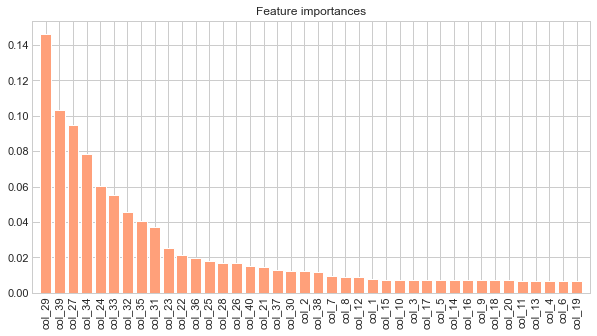

In [42]:
importances = RandomForest.feature_importances_
indices = Numpy.argsort(importances)[::-1]

PyPlot.figure(figsize=(10, 5))
PyPlot.title("Feature importances")
PyPlot.bar(
    range(X_train.shape[1]), importances[indices], color="lightsalmon", align="center"
)
PyPlot.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
PyPlot.xlim([-1, X_train.shape[1]])
PyPlot.show()

In [18]:
sfm1 = SFM(RandomForest, threshold=0.03).fit(X_train, y_train)

In [19]:
X_important_train1 = sfm1.transform(X_train)
X_important_test1 = sfm1.transform(X_test)

In [11]:
sfm1 = SFM(RandomForest, threshold=0.03).fit(X_train, y_train)
X_important_train1 = sfm1.fit_transform(X_train, y_train)
X_important_test1 = sfm1.transform(X_test)

sfm2 = SFM(RandomForest, threshold=0.04).fit(X_train, y_train)
X_important_train2 = sfm2.fit_transform(X_train, y_train)
X_important_test2 = sfm2.transform(X_test)

sfm3 = SFM(RandomForest, threshold=0.05).fit(X_train, y_train)
X_important_train3 = sfm3.fit_transform(X_train, y_train)
X_important_test3 = sfm3.transform(X_test)

sfm4 = SFM(RandomForest, threshold=0.06).fit(X_train, y_train)
X_important_train4 = sfm4.fit_transform(X_train, y_train)
X_important_test4 = sfm4.transform(X_test)
# rf = RandomForestClassifier(n_estimators = 100, class_weight='balanced', random_state=42)
# rf.fit(X_important_train, y_train)
# y_pred = rf.predict(X_important_test)
# print(classification_report(y_test, y_pred))

In [58]:
display(Numpy.size(X_important_train1, axis=1))

9

In [20]:
rf_smf1 = RF(random_state=42, n_jobs=-1, max_depth=20)
rf_smf1.fit(X_important_train1, y_train)

RandomForestClassifier(max_depth=20, n_jobs=-1, random_state=42)

_CV_

In [44]:
rf_tb = RF(random_state=42, n_jobs=-1, max_depth=20)

In [46]:
X_smf1 = Numpy.concatenate((X_important_train1, X_important_test1), axis=0)
X_smf2 = Numpy.concatenate((X_important_train2, X_important_test2), axis=0)
X_smf3 = Numpy.concatenate((X_important_train3, X_important_test3), axis=0)
X_smf4 = Numpy.concatenate((X_important_train4, X_important_test4), axis=0)

In [64]:
X_smf4.shape[1]

5

In [47]:
scores_smf1 = CV(rf_lasso, X=X_smf1, y=y, cv=cv, scoring=cv_scoring, return_train_score=True, n_jobs=-1)

scores_smf2 = CV(rf_lasso, X=X_smf2, y=y, cv=cv, scoring=cv_scoring, return_train_score=True, n_jobs=-1)

scores_smf3 = CV(rf_lasso, X=X_smf3, y=y, cv=cv, scoring=cv_scoring, return_train_score=True, n_jobs=-1)

scores_smf4 = CV(rf_lasso, X=X_smf4, y=y, cv=cv, scoring=cv_scoring, return_train_score=True, n_jobs=-1)

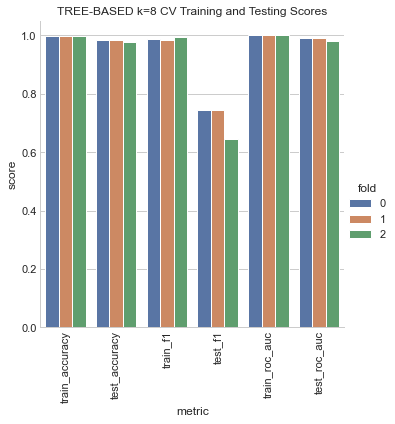

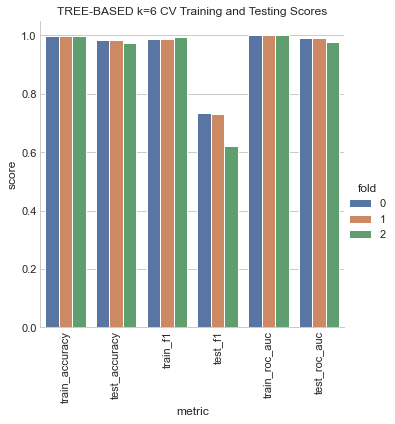

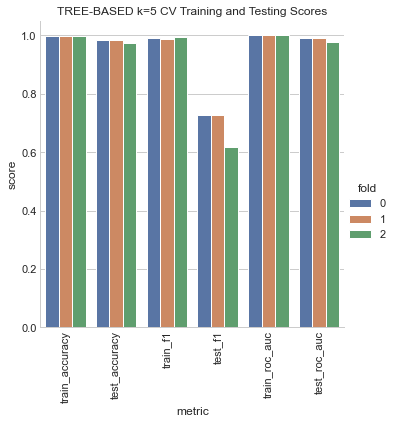

In [65]:
plot_cv('TREE-BASED', [scores_smf1, scores_smf2, scores_smf3, scores_smf4], [X_smf1.shape[1], X_smf2.shape[1], X_smf3.shape[1], X_smf4.shape[1]])

In [66]:
meanScoresTb1 = get_cv_performance(X_smf1, y, True)
meanScoresTb2 = get_cv_performance(X_smf2, y, True)
meanScoresTb3 = get_cv_performance(X_smf3, y, True)
meanScoresTb4 = get_cv_performance(X_smf4, y, True)

{'Average F1:0.764', 'Average FPR:0.007', 'Average ROC:0.869'}

{'Average F1:0.750', 'Average FPR:0.007', 'Average ROC:0.857'}

{'Average F1:0.742', 'Average FPR:0.007', 'Average ROC:0.853'}

{'Average F1:0.734', 'Average FPR:0.007', 'Average ROC:0.849'}

In [10]:
meanScoresGA = [
    [0.764, 0.007, 0.869], [0.750, 0.007, 0.857], [0.742, 0.007, 0.853], [0.734, 0.007, 0.849]
]
x_axis = [9, 8, 6, 5]

# plot_mean_scores('PCA', meanScores=meanScoresPca, x_axis=x_axis)

# Create a DataFrame with the given structure
data = {
    'k': x_axis,
    'F1-Score': [0.764, 0.750, 0.742, 0.734],
    'FPR': [0.007, 0.007, 0.007, 0.007],
    'ROC': [0.869, 0.857, 0.853, 0.849]
}
df = Pandas.DataFrame(data)

plot_mean_scores2('TREE-BASED', df=df, x_axis=x_axis, metrics=['F1-Score', 'FPR', 'ROC'], bar_width=0.15)

In [44]:
meanScoresLasso = [
    [0.764, 0.007, 0.869], [0.750, 0.007, 0.857], [0.742, 0.007, 0.853], [0.734, 0.007, 0.849]
]
x_axis = [9, 8, 6, 5]

plot_mean_scores('TREE-BASED', meanScores=meanScoresLasso, x_axis=x_axis, bar_width=0.15)

In [22]:
RandomForest.fit(X_important_train1, y_train)
y_pred_sfm1 = RandomForest.predict(X_important_test1)

RandomForest.fit(X_important_train2, y_train)
y_pred_sfm2 = RandomForest.predict(X_important_train2)

RandomForest.fit(X_important_train2, y_train)
y_pred_sfm3 = RandomForest.predict(X_important_test2)

RandomForest.fit(X_important_train4, y_train)
y_pred_sfm4 = RandomForest.predict(X_important_test4)

Metric     Score
0  Accuracy  0.979884
1  F1-score  0.668980
2   ROC_AUC  0.816611

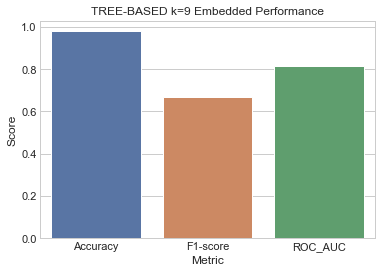

Metric     Score
0  Accuracy  0.977027
1  F1-score  0.638011
2   ROC_AUC  0.813888

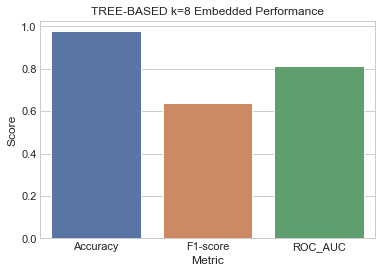

Metric     Score
0  Accuracy  0.973830
1  F1-score  0.611924
2   ROC_AUC  0.818163

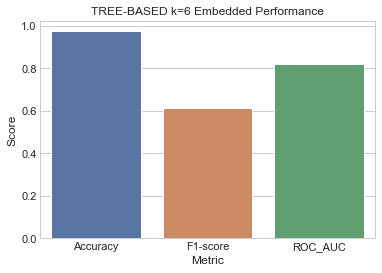

In [38]:
metrics_tb = [
    evaluate_performance(y_test, y_pred_sfm1), evaluate_performance(y_test, y_pred_sfm3), evaluate_performance(y_test, y_pred_sfm4)
]

k = 9
for metric in metrics_tb:
    display(metric)
    Seaborn.barplot(data=metric, x='Metric', y='Score')
    PyPlot.title(f'TREE-BASED k={k} Embedded Performance')
    PyPlot.show()

    k -= 1
    if 7 == k: k -= 1

_Performance_

In [67]:
fitness1Tb1 = fitness1(meanScoresTb1[0], meanScoresTb1[1], X_smf1.shape[1]/shape[1])
fitness1Tb2 = fitness1(meanScoresTb2[0], meanScoresTb2[1], X_smf2.shape[1]/shape[1])
fitness1Tb3 = fitness1(meanScoresTb3[0], meanScoresTb3[1], X_smf3.shape[1]/shape[1])
fitness1Tb4 = fitness1(meanScoresTb4[0], meanScoresTb4[1], X_smf4.shape[1]/shape[1])
display([fitness1Tb1, fitness1Tb2, fitness1Tb3, fitness1Tb4])

[0.8103372591041293, 0.8012419930112873, 0.797743203070933, 0.7932059446424073]

In [68]:
X_train_curr = X_important_train1
profile_model()

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
ERROR: Could not find file C:\Users\IA\AppData\Local\Temp\ipykernel_25344\1347154340.py



Filename: d:\ProgramFiles\Python\Conda\lib\site-packages\memory_profiler.py

Line #    Mem usage    Increment  Occurences   Line Contents
  1140    479.2 MiB    479.2 MiB           1               def wrapper(*args, **kwargs):
  1141    479.2 MiB      0.0 MiB           1                   prof = get_prof()
  1142    522.7 MiB     43.5 MiB           1                   val = prof(func)(*args, **kwargs)
  1143    522.7 MiB      0.0 MiB           1                   show_results_bound(prof)
  1144    522.7 MiB      0.0 MiB           1                   return val

In [69]:
X_train_curr = X_important_train1
resultAll = memory_usage((train_model, (), {}))

ERROR: Could not find file C:\Users\IA\AppData\Local\Temp\ipykernel_25344\1347154340.py


In [70]:
result_specs_tb = resultAll[len(resultAll) - 1] - resultAll[0]
display(result_specs_tb)

42.7265625

_Best subset 4ALL_

In [45]:
subset_intersection = [
    'col_22',
    'col_23',
    'col_24',
    'col_27',
    'col_28',
    'col_29',
    'col_32',
    'col_33',
    'col_34',
    'col_35',
    'col_36',
    'col_39'
]

In [46]:
X_train_subset = X_train[subset_intersection]
X_test_subset = X_test[subset_intersection]

In [47]:
rfSubset = RF(random_state=42, n_jobs=-1, max_depth=20)

rfSubset.fit(X_train_subset, y_train)
y_pred_subset1 = rfSubset.predict(X_test_subset)

In [48]:
get_objective('y_pred_subset', 1, 2)

Objectives


[0.6843289823953341]


F1


[0.6407376006782535]


FPR


[0.012371090566780004]

Metric     Score
0  Accuracy  0.978075
1  F1-score  0.653254
2   ROC_AUC  0.820667

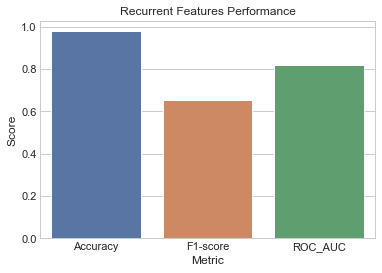

In [18]:
metrics_subset = [evaluate_performance(y_test, y_pred_subset), ]

for metric in metrics_subset:
    display(metric)
    Seaborn.barplot(data=metric, x='Metric', y='Score')
    PyPlot.title('Recurrent Features Performance')
    PyPlot.show()

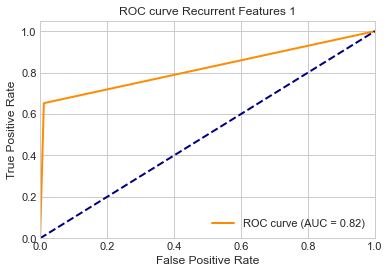

In [19]:
plot_roc_curve(title='Recurrent Features', y_test=y_test, y_predict1=y_pred_subset)

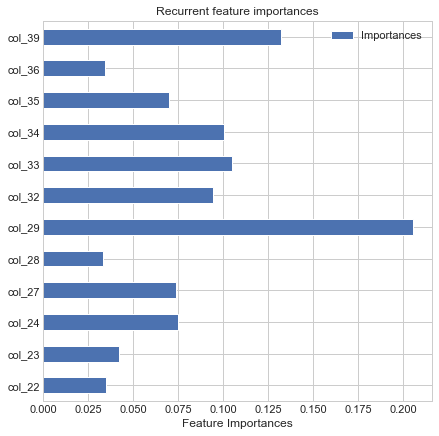

In [62]:
plot_feature_importances(title='Recurrent feature importances', coefficients=rfSubset.feature_importances_, index=subset_intersection)

In [55]:
X_train_curr = X_train_subset
profile_model()

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
ERROR: Could not find file C:\Users\IA\AppData\Local\Temp\ipykernel_20536\2684231453.py



Filename: d:\ProgramFiles\Python\Conda\lib\site-packages\memory_profiler.py

Line #    Mem usage    Increment  Occurences   Line Contents
  1140     69.8 MiB     69.8 MiB           1               def wrapper(*args, **kwargs):
  1141     69.9 MiB      0.0 MiB           1                   prof = get_prof()
  1142    134.4 MiB     64.6 MiB           1                   val = prof(func)(*args, **kwargs)
  1143    134.5 MiB      0.0 MiB           1                   show_results_bound(prof)
  1144    134.5 MiB      0.0 MiB           1                   return val

In [28]:
X_train_curr = X_train_subset

resultAll = memory_usage((train_model, (), {}))
result_specs_subset = resultAll[len(resultAll) - 1] - resultAll[0]
display(result_specs_subset)

ERROR: Could not find file C:\Users\IA\AppData\Local\Temp\ipykernel_11960\2684231453.py


46.62890625

_Performances graph_

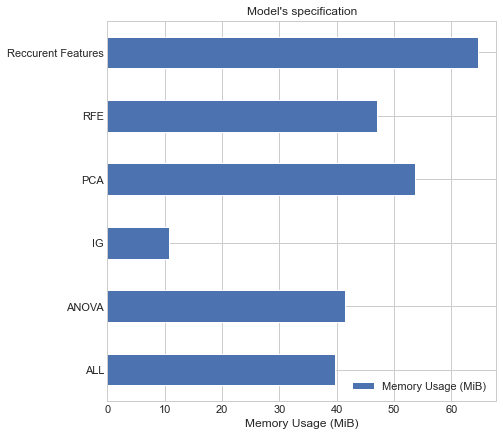

In [63]:
specification = [
    39.7, 
    41.5, 
    10.8, 
    53.6, 
    47.0,
    64.6
]
specs_index = ['ALL', 'ANOVA', 'IG', 'PCA', 'RFE', 'Reccurent Features']
specification_df = Pandas.DataFrame(specification, columns=['Memory Usage (MiB)'], index=specs_index)

specification_df.plot.barh(figsize=(9, 7))
PyPlot.title('Model\'s specification')
PyPlot.axvline(x=0, color=".5")
PyPlot.xlabel('Memory Usage (MiB)')
PyPlot.subplots_adjust(left=0.3)

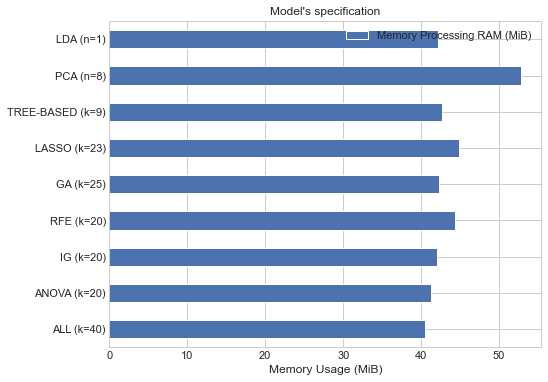

In [19]:
specification = [
    40.44140625,            # result_specs_all, 
    41.32421875,            # result_specs_anova, 
    42.08203125,            # result_specs_ig, 
    44.34765625,            # result_specs_rfe,
    42.34375,               # result_specs_ga, #look at it
    44.90234375,            # result_specs_lasso
    42.7265625,             # result_specs_tb
    52.78515625,            # result_specs_pca
    42.203125,              # result_specs_lda
]
specs_index = [
    'ALL (k=40)', 'ANOVA (k=20)', 'IG (k=20)', 'RFE (k=20)', 
    'GA (k=25)', 'LASSO (k=23)', 'TREE-BASED (k=9)', 
    'PCA (n=8)', 'LDA (n=1)'
]
specification_df = Pandas.DataFrame(specification, columns=['Memory Processing RAM (MiB)'], index=specs_index)

specification_df.plot.barh(figsize=(10, 6))
PyPlot.title('Model\'s specification')
PyPlot.axvline(x=0, color=".5")
PyPlot.xlabel('Memory Usage (MiB)')
PyPlot.subplots_adjust(left=0.3)

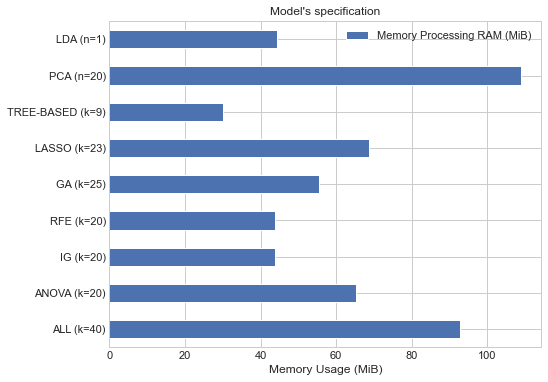

In [27]:
specification = [
    92.87109375,            # result_specs_all, 
    65.18359375,            # result_specs_anova, 
    43.70703125,            # result_specs_ig, 
    43.890625,              # result_specs_rfe,
    55.3515,                # result_specs_ga, #look at it
    68.75390625,            # result_specs_lasso
    30.16796875,            # result_specs_tb
    108.83984375,           # result_specs_pca
    44.40625,               # result_specs_lda
]
specs_index = [
    'ALL (k=40)', 'ANOVA (k=20)', 'IG (k=20)', 'RFE (k=20)', 
    'GA (k=25)', 'LASSO (k=23)', 'TREE-BASED (k=9)', 
    'PCA (n=20)', 'LDA (n=1)'
]
specification_df = Pandas.DataFrame(specification, columns=['Memory Processing RAM (MiB)'], index=specs_index)

specification_df.plot.barh(figsize=(10, 6))
PyPlot.title('Model\'s specification')
PyPlot.axvline(x=0, color=".5")
PyPlot.xlabel('Memory Usage (MiB)')
PyPlot.subplots_adjust(left=0.3)

In [62]:
dfs = {
    'ALL': metrics_all[0], 
    'ANOVA': metrics_anova[1], 
    'IG': metrics_ig[1], 
    'PCA': metrics_pca[1], 
    'LDA': metrics_lda[0], 
    'RFE': metrics_rfe[0],
    'Reccurent Features': metrics_subset[0]
}

df = Pandas.concat(dfs.values(), axis=1)
display(df)
# Rename the columns to include the feature selection algorithm name
# df.columns = [f"{col[0]}_{col[1]}" for col in df.columns]

Metric     Score    Metric     Score    Metric     Score    Metric  \
0  Accuracy  0.981259  Accuracy  0.978612  Accuracy  0.978728  Accuracy   
1  F1-score  0.670020  F1-score  0.648086  F1-score  0.652517  F1-score   
2   ROC_AUC  0.797462   ROC_AUC  0.806285   ROC_AUC  0.810607   ROC_AUC   

      Score    Metric     Score    Metric     Score  
0  0.980054  Accuracy  0.947068  Accuracy  0.980830  
1  0.642700  F1-score  0.422989  F1-score  0.677501  
2  0.780206   ROC_AUC  0.785526   ROC_AUC  0.814188

In [46]:
# Set 'Metric' column as the index
df.set_index('Metric', inplace=True)

df.head()

Score     Score  \
Metric                                                                   
(Accuracy, Accuracy, Accuracy, Accuracy, Accura...  0.981259  0.978612   
(F1-score, F1-score, F1-score, F1-score, F1-sco...  0.670020  0.648086   
(ROC_AUC, ROC_AUC, ROC_AUC, ROC_AUC, ROC_AUC, R...  0.797462  0.806285   

                                                       Score     Score  \
Metric                                                                   
(Accuracy, Accuracy, Accuracy, Accuracy, Accura...  0.978728  0.980054   
(F1-score, F1-score, F1-score, F1-score, F1-sco...  0.652517  0.642700   
(ROC_AUC, ROC_AUC, ROC_AUC, ROC_AUC, ROC_AUC, R...  0.810607  0.780206   

                                                       Score     Score  
Metric                                                                  
(Accuracy, Accuracy, Accuracy, Accuracy, Accura...  0.947068  0.980830  
(F1-score, F1-score, F1-score, F1-score, F1-sco...  0.422989  0.677501  
(ROC_AUC, ROC_AUC, ROC_AUC, ROC_AUC, ROC_AUC, R...  0.785526  0.814188

In [ ]:
# Transpose the dataframe
df = df.T

# Reset the index to make the 'Feature Selection Algorithm' column a regular column
df = df.reset_index()

# Rename the 'index' column to 'Feature Selection Algorithm'
df = df.rename(columns={'index': 'Feature Selection Algorithm'})

# Print the resulting dataframe
print(df)

In [73]:
def intersection(first, *others):
    return set(first).intersection(*others)

In [74]:
recurrent_features = intersection(selected_anova, selected_ig, selected_rfe)

display(recurrent_features)

{'col_22',
 'col_23',
 'col_24',
 'col_27',
 'col_28',
 'col_29',
 'col_32',
 'col_33',
 'col_34',
 'col_35',
 'col_36',
 'col_39'}

In [ ]:
# {'col_22',
#  'col_23',
#  'col_24',
#  'col_27',
#  'col_28',
#  'col_29',
#  'col_32',
# ...
#  'col_33',
#  'col_34',
#  'col_35',
#  'col_36',
#  'col_39'}

_Performance comparison_

In [25]:
data = Pandas.DataFrame({
    'Score_ALL': [0.981259, 0.670020, 0.797462],
    'Score_ANOVA': [0.978612, 0.648086, 0.806285],
    'Score_IG': [0.978728, 0.652517, 0.810607],
    'Score_PCA': [0.980054, 0.642700, 0.780206],
    'Score_LDA': [0.947068, 0.422989, 0.785526],
    'Score_RFE': [0.980830, 0.677501, 0.814188],
    'Score_CNN': [0.9755986332893372, 0.8010784983634949, 0.9984769225120544],
    'Score_Best_Subset': [0.978075, 0.653254, 0.820667],
    'Metric': ['Accuracy', 'F1-score', 'ROC_AUC']
})
# display(data)

df_melted = Pandas.melt(data, id_vars=['Metric'], value_vars=['Score_ALL', 'Score_ANOVA', 'Score_IG', 'Score_PCA', 'Score_LDA', 'Score_RFE', 'Score_CNN', 'Score_Best_Subset'], var_name='Feature_Selection')
# display(df_melted)

g = Seaborn.catplot(
    data=df_melted, kind="bar",
    x="value", y="Feature_Selection", col="Metric",
    palette="dark", alpha=.6, height=6
)

# Set the x-axis labels to be the score values
for ax in g.axes.flat:
    ax.set_xlabel('Score')

# Set the title for each subplot based on the metric name
for ax, metric in zip(g.axes.flat, data['Metric'].unique()):
    ax.set_title(metric)

PyPlot.show()

In [10]:
data = Pandas.DataFrame({
    'ALL (k=40)'            : [0.759, 0.855],
    'ANOVA (k=20)'          : [0.768, 0.862],
    'IG (k=20)'             : [0.776, 0.871],
    'RFE (k=20)'            : [0.777, 0.871],
    'GA (k=25)'             : [0.762, 0.860],
    'LASSO (k=23)'          : [0.765, 0.866],
    'TREE-BASED (k=9)'      : [0.764, 0.869],
    'PCA (n=20)'            : [0.743, 0.834],
    'LDA (n=1)'             : [0.624, 0.816],
    'Metric'                : ['F1-Score', 'ROC-AUC']
})
# display(data)

specs_index = [
    'ALL (k=40)', 'ANOVA (k=20)', 'IG (k=20)', 'RFE (k=20)', 
    'GA (k=25)', 'LASSO (k=23)', 'TREE-BASED (k=9)', 
    'PCA (n=20)', 'LDA (n=1)'
]
df_melted = Pandas.melt(data, id_vars=['Metric'], value_vars=specs_index, var_name='Feature_Engineering')
# display(df_melted)

g = Seaborn.catplot(
    data=df_melted, kind="bar",
    x="value", y="Feature_Engineering", col="Metric",
    palette="dark", alpha=.6, height=6
)

# Set the x-axis labels to be the score values
for ax in g.axes.flat:
    ax.set_xlabel('Score')

# Set the title for each subplot based on the metric name
for ax, metric in zip(g.axes.flat, data['Metric'].unique()):
    ax.set_title(metric)

PyPlot.show()

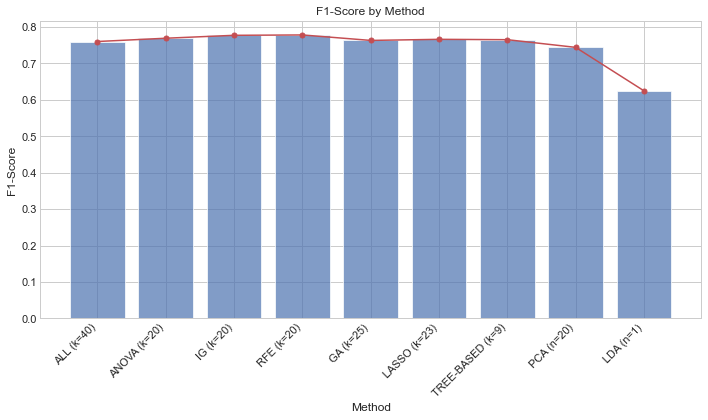

In [22]:
# Your data
data = Pandas.DataFrame({
    'Method': [
        'ALL (k=40)', 'ANOVA (k=20)', 'IG (k=20)', 'RFE (k=20)', 'GA (k=25)',
        'LASSO (k=23)', 'TREE-BASED (k=9)', 'PCA (n=20)', 'LDA (n=1)'
    ],
    'F1-Score': [0.759, 0.768, 0.776, 0.777, 0.762, 0.765, 0.764, 0.743, 0.624]
})

# Set the figure size
PyPlot.figure(figsize=(10, 6))

# Plot the F1-Score bars
bars = PyPlot.bar(data['Method'], data['F1-Score'], color='b', alpha=0.7)

# Add labels and title
PyPlot.xlabel('Method')
PyPlot.ylabel('F1-Score')
PyPlot.title('F1-Score by Method')

# Set the x-axis labels to be rotated for better readability
PyPlot.xticks(rotation=45, ha='right')

PyPlot.plot(data['Method'], data['F1-Score'], marker='o', markersize=5, color='r', linestyle='-')

# Show the plot
PyPlot.tight_layout()
PyPlot.show()

In [23]:
# Your data
data = Pandas.DataFrame({
    'Method': [
        'ALL (k=40)', 'ANOVA (k=20)', 'IG (k=20)', 'RFE (k=20)', 'GA (k=25)',
        'LASSO (k=23)', 'TREE-BASED (k=9)', 'PCA (n=20)', 'LDA (n=1)'
    ],
    'ROC-AUC': [0.855, 0.862, 0.871, 0.871, 0.860, 0.866, 0.869, 0.834, 0.816]
})

# Set the figure size
PyPlot.figure(figsize=(10, 6))

# Plot the F1-Score bars
bars = PyPlot.bar(data['Method'], data['ROC-AUC'], color='b', alpha=0.7)

# Add labels and title
PyPlot.xlabel('Method')
PyPlot.ylabel('ROC-AUC')
PyPlot.title('ROC-AUC by Method')

# Set the x-axis labels to be rotated for better readability
PyPlot.xticks(rotation=45, ha='right')

PyPlot.plot(data['Method'], data['ROC-AUC'], marker='o', markersize=5, color='r', linestyle='-')

# Show the plot
PyPlot.tight_layout()
PyPlot.show()

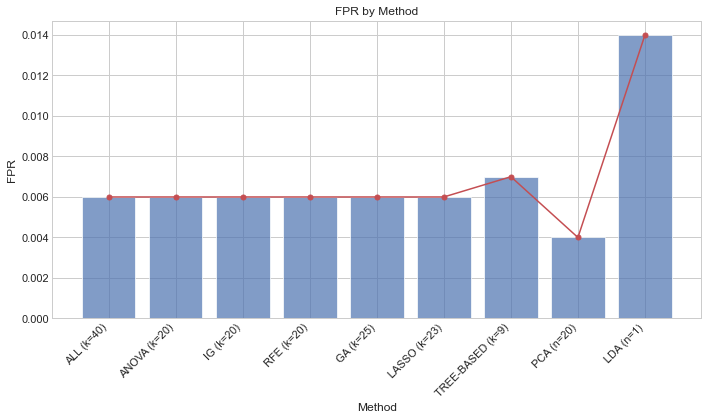

In [24]:
# Your data
data = Pandas.DataFrame({
    'Method': [
        'ALL (k=40)', 'ANOVA (k=20)', 'IG (k=20)', 'RFE (k=20)', 'GA (k=25)',
        'LASSO (k=23)', 'TREE-BASED (k=9)', 'PCA (n=20)', 'LDA (n=1)'
    ],
    'FPR': [0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.007, 0.004, 0.014]
})

# Set the figure size
PyPlot.figure(figsize=(10, 6))

# Plot the F1-Score bars
bars = PyPlot.bar(data['Method'], data['FPR'], color='b', alpha=0.7)

# Add labels and title
PyPlot.xlabel('Method')
PyPlot.ylabel('FPR')
PyPlot.title('FPR by Method')

# Set the x-axis labels to be rotated for better readability
PyPlot.xticks(rotation=45, ha='right')

PyPlot.plot(data['Method'], data['FPR'], marker='o', markersize=5, color='r', linestyle='-')

# Show the plot
PyPlot.tight_layout()
PyPlot.show()

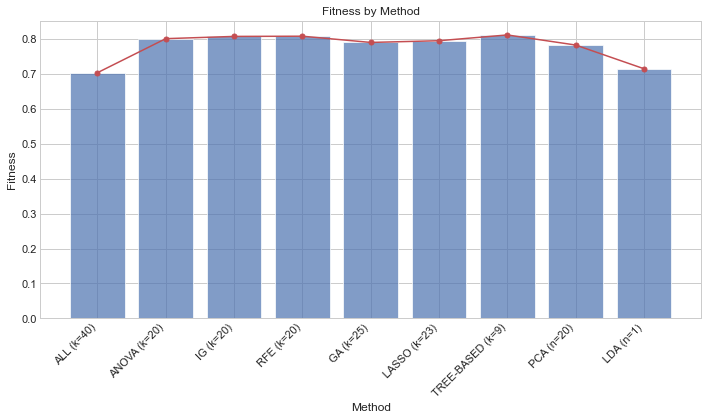

In [25]:
# Your data
data = Pandas.DataFrame({
    'Method': [
        'ALL (k=40)', 'ANOVA (k=20)', 'IG (k=20)', 'RFE (k=20)', 'GA (k=25)',
        'LASSO (k=23)', 'TREE-BASED (k=9)', 'PCA (n=20)', 'LDA (n=1)'
    ],
    'Fitness': [0.7024, 0.7997, 0.8061, 0.8067, 0.7889, 0.7938, 0.8103, 0.7815, 0.7138]
})

# Set the figure size
PyPlot.figure(figsize=(10, 6))

# Plot the F1-Score bars
bars = PyPlot.bar(data['Method'], data['Fitness'], color='b', alpha=0.7)

# Add labels and title
PyPlot.xlabel('Method')
PyPlot.ylabel('Fitness')
PyPlot.title('Fitness by Method')

# Set the x-axis labels to be rotated for better readability
PyPlot.xticks(rotation=45, ha='right')

PyPlot.plot(data['Method'], data['Fitness'], marker='o', markersize=5, color='r', linestyle='-')

# Show the plot
PyPlot.tight_layout()
PyPlot.show()

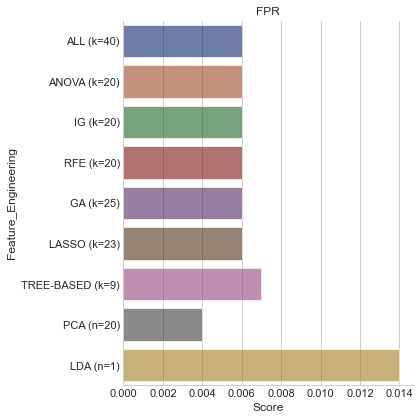

In [12]:
data = Pandas.DataFrame({
    'ALL (k=40)'           : [0.006],
    'ANOVA (k=20)'         : [0.006],
    'IG (k=20)'            : [0.006],
    'RFE (k=20)'           : [0.006],
    'GA (k=25)'            : [0.006],
    'LASSO (k=23)'         : [0.006],
    'TREE-BASED (k=9)'     : [0.007],
    'PCA (n=20)'           : [0.004],
    'LDA (n=1)'            : [0.014],
    'Metric'               : ['FPR']
})
# display(data)

specs_index = [
    'ALL (k=40)', 'ANOVA (k=20)', 'IG (k=20)', 'RFE (k=20)', 
    'GA (k=25)', 'LASSO (k=23)', 'TREE-BASED (k=9)', 
    'PCA (n=20)', 'LDA (n=1)'
]

df_melted = Pandas.melt(data, id_vars=['Metric'], value_vars=specs_index, var_name='Feature_Engineering')
# display(df_melted)

g = Seaborn.catplot(
    data=df_melted, kind="bar",
    x="value", y="Feature_Engineering", col="Metric",
    palette="dark", alpha=.6, height=6
)

# Set the x-axis labels to be the score values
for ax in g.axes.flat:
    ax.set_xlabel('Score')

# Set the title for each subplot based on the metric name
for ax, metric in zip(g.axes.flat, data['Metric'].unique()):
    ax.set_title(metric)

PyPlot.show()

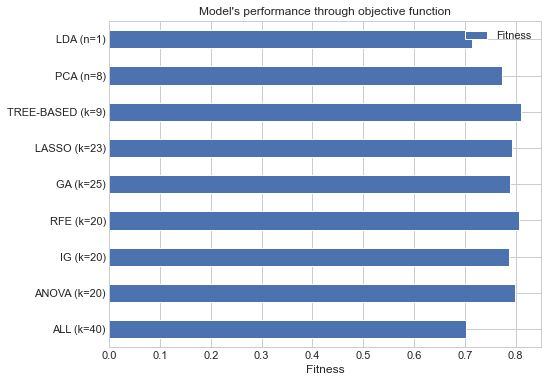

In [17]:
specification = [
    0.7024631193543428,
    0.7997004300581391,
    0.7873807564693968,
    0.8067657633435723,
    0.7889700839923293,
    0.793880937699944,
    0.8103372591041293,
    0.7730823970048479,
    0.713874713863514
]
specs_index = [
    'ALL (k=40)', 'ANOVA (k=20)', 'IG (k=20)', 'RFE (k=20)', 
    'GA (k=25)', 'LASSO (k=23)', 'TREE-BASED (k=9)', 
    'PCA (n=8)', 'LDA (n=1)'
]
specification_df = Pandas.DataFrame(specification, columns=['Fitness'], index=specs_index)

specification_df.plot.barh(figsize=(10, 6))
PyPlot.title('Model\'s performance through objective function')
PyPlot.axvline(x=0, color=".5")
PyPlot.xlabel('Fitness')
PyPlot.subplots_adjust(left=0.3)

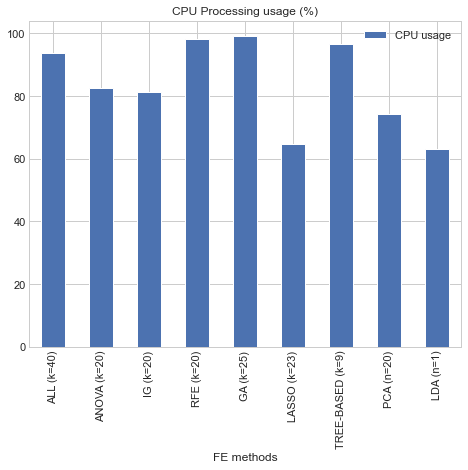

In [28]:
specification = [
    93.60,
    82.50,
    81.10,
    98.00,
    99.10,
    64.70,
    96.60,
    74.20,
    63.20
]
cpu_load = [
    2.28,       # 1.45
    1.87,       # 1.51
    1.97,       # 1.70
    2.04,       # 1.54
    2.00,       # 1.57
    1.91,       # 1.33
    1.66,       # 1.12
    1.68,       # 1.08
    1.22        # 1.05
]
specs_index = [
    'ALL (k=40)', 'ANOVA (k=20)', 'IG (k=20)', 'RFE (k=20)', 
    'GA (k=25)', 'LASSO (k=23)', 'TREE-BASED (k=9)', 
    'PCA (n=20)', 'LDA (n=1)'
]
specification_df = Pandas.DataFrame(specification, columns=['CPU usage'], index=specs_index)

specification_df.plot.bar(figsize=(10, 6))
PyPlot.title('CPU Processing usage (%)')
# PyPlot.axvline(x=0, color=".5")
PyPlot.xlabel('FE methods')
PyPlot.subplots_adjust(left=0.3)

In [16]:
cpu_load_5_min = [
    2.28,       # 1.45
    1.87,       # 1.51
    1.97,       # 1.70
    2.04,       # 1.54
    2.00,       # 1.57
    1.91,       # 1.33
    1.66,       # 1.12
    1.88,       # 1.52
    1.22        # 1.05
]
cpu_load_15_min = [
    1.45, 1.51, 1.70, 1.54, 1.57, 1.33, 1.12, 1.52, 1.05
]
specs_index = [
    'ALL (k=40)', 'ANOVA (k=20)', 'IG (k=20)', 'RFE (k=20)', 
    'GA (k=25)', 'LASSO (k=23)', 'TREE-BASED (k=9)', 
    'PCA (n=20)', 'LDA (n=1)'
]

data = {
    'Method': specs_index,
    'CPU Load (5 min)': cpu_load_5_min,
    'CPU Load (15 min)': cpu_load_15_min
}
df = Pandas.DataFrame(data)

# Plot the figure
PyPlot.figure(figsize=(12, 6))

bar_width = 0.4
index = range(len(specs_index))
index2 = [0] + list(index)
display(index2)
PyPlot.bar(index, df['CPU Load (5 min)'], width=bar_width, color='b', label='CPU Load (5 min)')
PyPlot.bar(index, df['CPU Load (15 min)'], width=bar_width, color='g', label='CPU Load (15 min)', alpha=0.5)
PyPlot.plot(index2, [1.99] * 10, color='r', linestyle='-')

PyPlot.xticks(index, specs_index, rotation=45, ha='right')
PyPlot.xlabel('Feature Selection and Feature Extraction Methods')
PyPlot.ylabel('CPU Load Average')
PyPlot.title('CPU Load Average for Different Methods (5 min and 15 min)')
PyPlot.legend()

PyPlot.tight_layout()
PyPlot.show()

[0, 0, 1, 2, 3, 4, 5, 6, 7, 8]